In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from fit_funcs import *
import costfun.costfun as cost
import utils.figures as fig_help
import utils.tools as tools
from RandomMatrixTheory import goe
from Quad_tools import *

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import erf
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import gamma as Gamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
from scipy.interpolate import UnivariateSpline as InterpolateSpline
from scipy.interpolate import make_interp_spline as make_spline
from scipy.interpolate import splrep, splev
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists

DIM = 1
modello = 'RP'


def base_dir(model, d, BC = 0):
    """
    Base directory for input model for d-dimension
    """
    dirx = f"../results/{model}/" + (f"" if model == 'PLRB' or model == 'RP' else  f"dim={d}/") + ( '' if model == 'RP' else (f"PBC/" if BC else f"OBC/") )
    return dirx

print(base_dir(modello, DIM))

/Users/rafal.swietek/Projects/CODES/QHamSolver/Quadratic/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
../results/RP/


## SPECTRAL STATS

[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4]


No handles with labels found to put in legend.


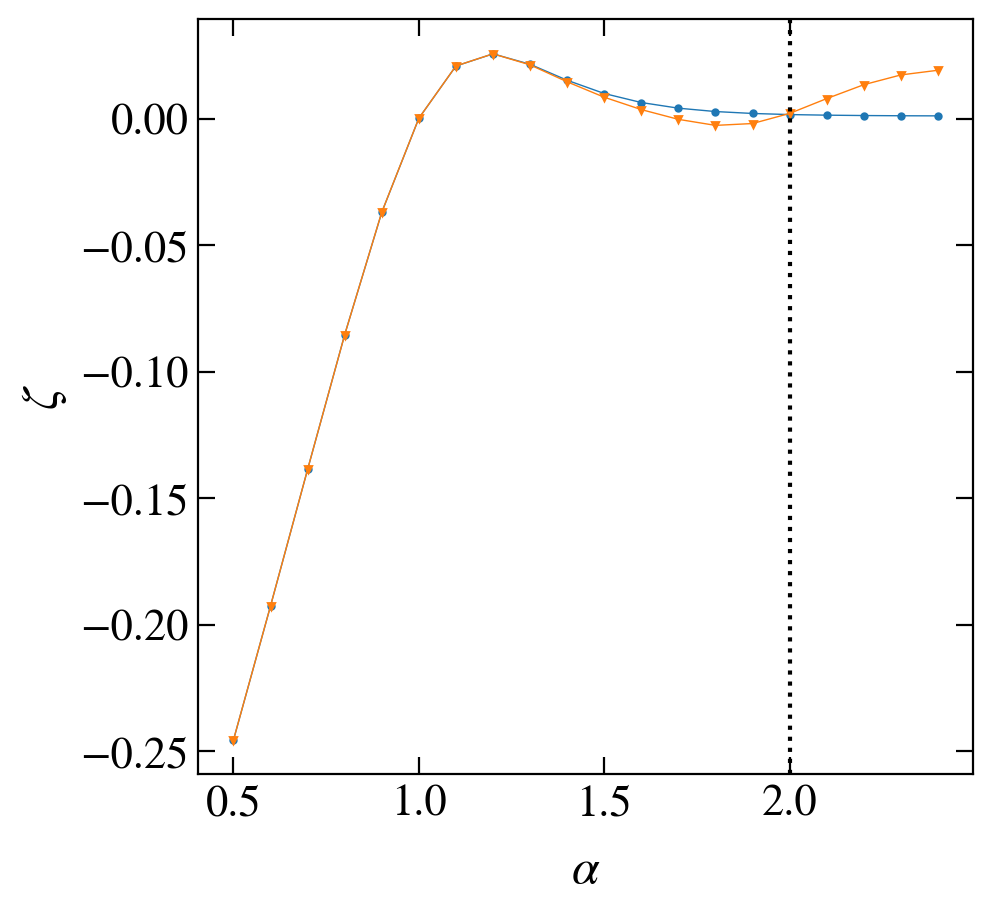

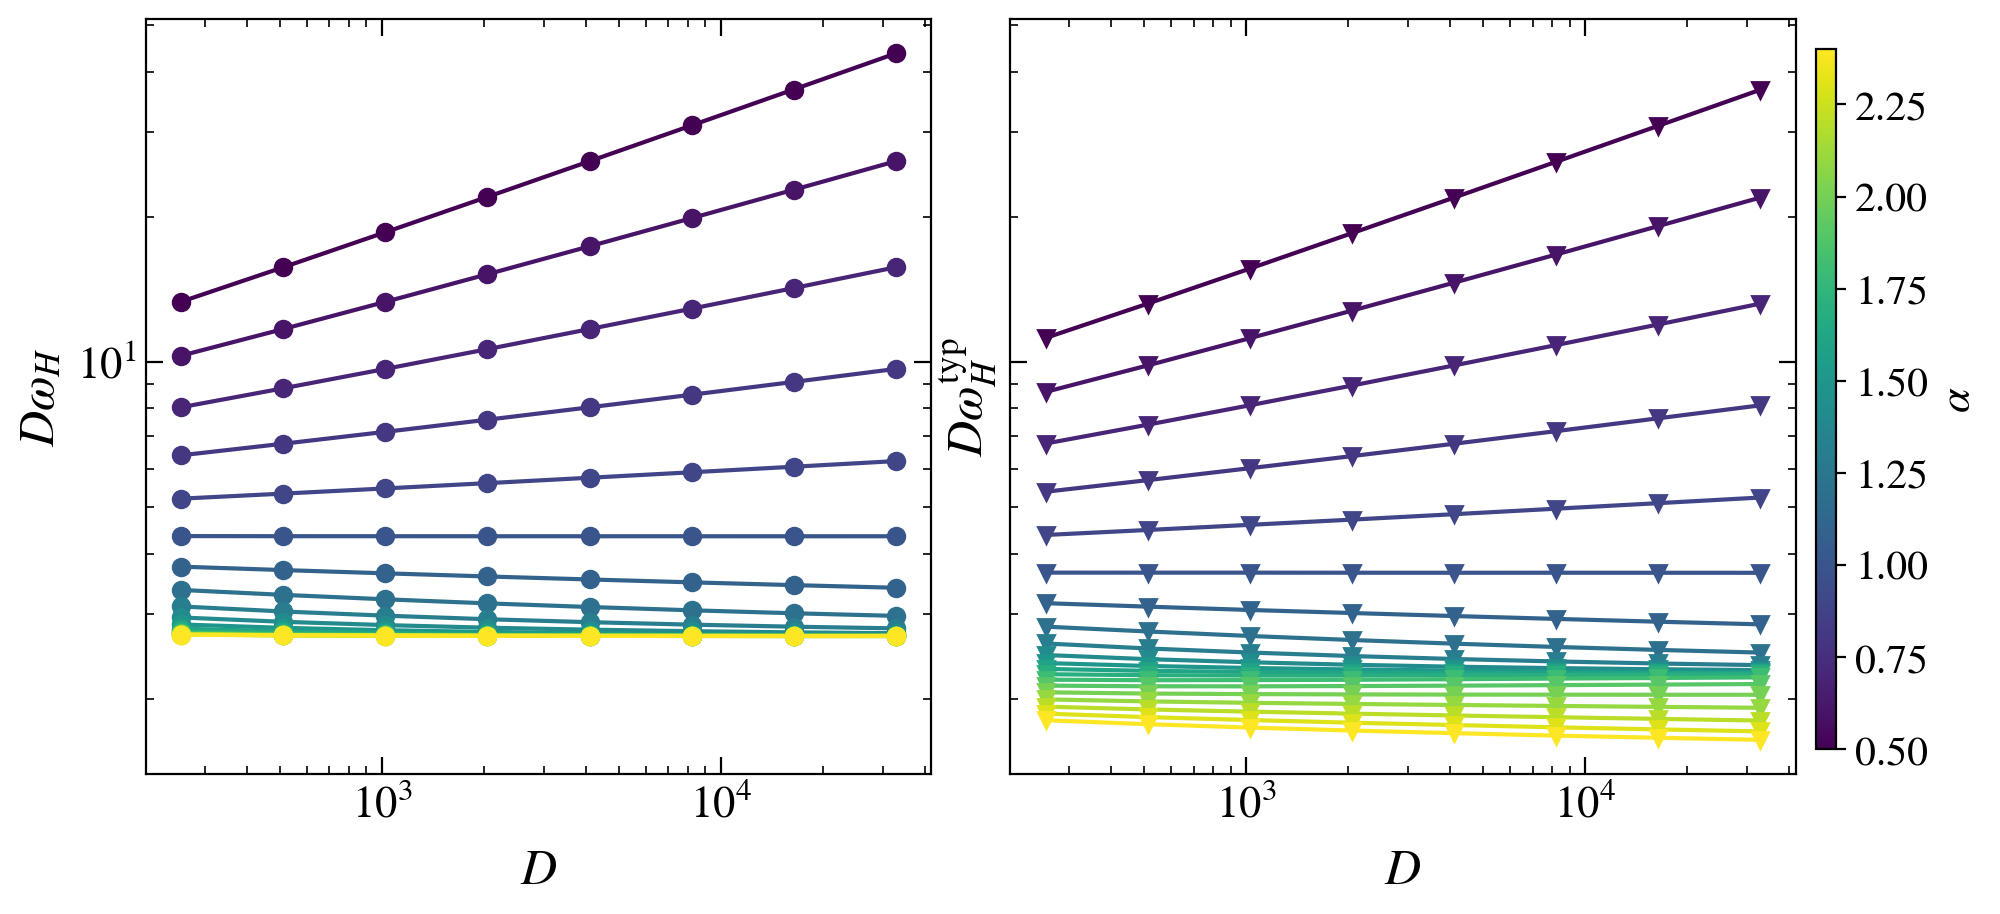

In [218]:
markers = itertools.cycle(markers_ls)
colors_ls_cyc = itertools.cycle(colors_ls)
L = 20
w = 2
J = 1
g = 1.5
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2

gamma_vals = np.arange(0.5, 2.5, 0.1)
print(gamma_vals)

sizes = np.arange(8, 16, 1)
# create a ScalarMappable and initialize a data structure
s_m_alfa = matplotlib.cm.ScalarMappable(cmap='viridis', norm=matplotlib.colors.Normalize(vmin=min(gamma_vals),vmax=max(gamma_vals) ))
s_m_alfa.set_array([])

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharex = True, sharey=True)
fig2, ax = plt.subplots( nrows=1, ncols=2, figsize=(10,5), dpi = 200, sharex = True, sharey=True)

    
omegaH = []
omegaH_typ = []
for L in sizes:
    # col = s_m.to_rgba(L)
    dim = 2**(L)
    wH    = np.zeros((gamma_vals.size)); wH.fill(np.nan)
    wHtyp = np.zeros((gamma_vals.size)); wHtyp.fill(np.nan)
    realis = np.zeros((gamma_vals.size)); realis.fill(np.nan)
    for ii, g in enumerate(gamma_vals):
        name = prefix +  info(L=L, J=J, g=g, model=modello, ext='.hdf5')
    
        if exists(name):
            with h5py.File(name, "r") as file:
                wH[ii] = np.array(file.get('wH'))[-2] * dim
                wHtyp[ii] = np.array(file.get('wH_typ'))[-2] * dim
                realis[ii] = np.array(file.get('realisations'))
        else:
            print(name)
    # print(wHtyp)
    omegaH.append(wH)
    omegaH_typ.append(wHtyp)

omegaH = np.transpose(np.array(omegaH))
omegaH_typ = np.transpose(np.array(omegaH_typ))
exponent1 = []
exponent2 = []

def funca(L, ze, c):
    return c / (L**ze)

for iia, alfa in enumerate(gamma_vals):
    yy = omegaH[iia]
    xx = 2**sizes[~np.isnan(yy)]
    zz = omegaH_typ[iia][~np.isnan(yy)]
    yy = yy[~np.isnan(yy)]

    ax[0].plot(xx, yy, marker='o', color=s_m_alfa.to_rgba(alfa))
    pars, pconv= fit(funca,
                    xdata = xx,
                    ydata = yy,
                    maxfev = 20000)
    # print(iiop, alfa, pars[0])
    exponent1.append(pars[0])
    
    ax[1].plot(xx, zz, marker='v', color=s_m_alfa.to_rgba(alfa))
    pars, pconv= fit(funca,
                    xdata = xx,
                    ydata = zz,
                    maxfev = 20000)
    # print(iiop, alfa, pars[0])
    exponent2.append(pars[0])

axis.plot(gamma_vals, exponent1, lw=0.5, marker='o', markersize=2)
axis.plot(gamma_vals, exponent2, lw=0.5, marker='v', markersize=2)
   
# for axa in ax:
#     x = np.linspace((sizes[0]), (sizes[-1]), 1000)
#     axa.plot(x, (x/x[0])**0.5, ls='--', color='k')
#     # axa.plot(x, (x/x[0]), ls=':', color='gray')
fig_help.set_plot_elements(axis, ylabel=r"$\zeta$", xlabel=r"$\alpha$", font_size=16, set_legend=False, xscale='linear', yscale='linear')
fig_help.set_legend(axis, fontsize=12, loc='lower right', ncol=2)

fig_help.set_plot_elements(ax[0], ylabel=r"$D\omega_H$", xlabel=r"$D$", font_size=16, set_legend=False, xscale='log', yscale='log')
fig_help.set_plot_elements(ax[1], ylabel=r"$D\omega_H^{\rm typ}$", xlabel=r"$D$", font_size=16, set_legend=False, xscale='log', yscale='log')

fig2.subplots_adjust(right=0.95)
cbar_ax = fig2.add_axes([0.96, 0.15, 0.01, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig2.colorbar(s_m_alfa, cax=cbar_ax, aspect=1)
cbar.set_label(r"$\alpha$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

# axis.axvline(x=1/np.sqrt(2), ls=':', c='gray')
axis.axvline(x=g_crit,    ls=':', c='k')

fig2.subplots_adjust(wspace = 0.1, hspace=0.1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


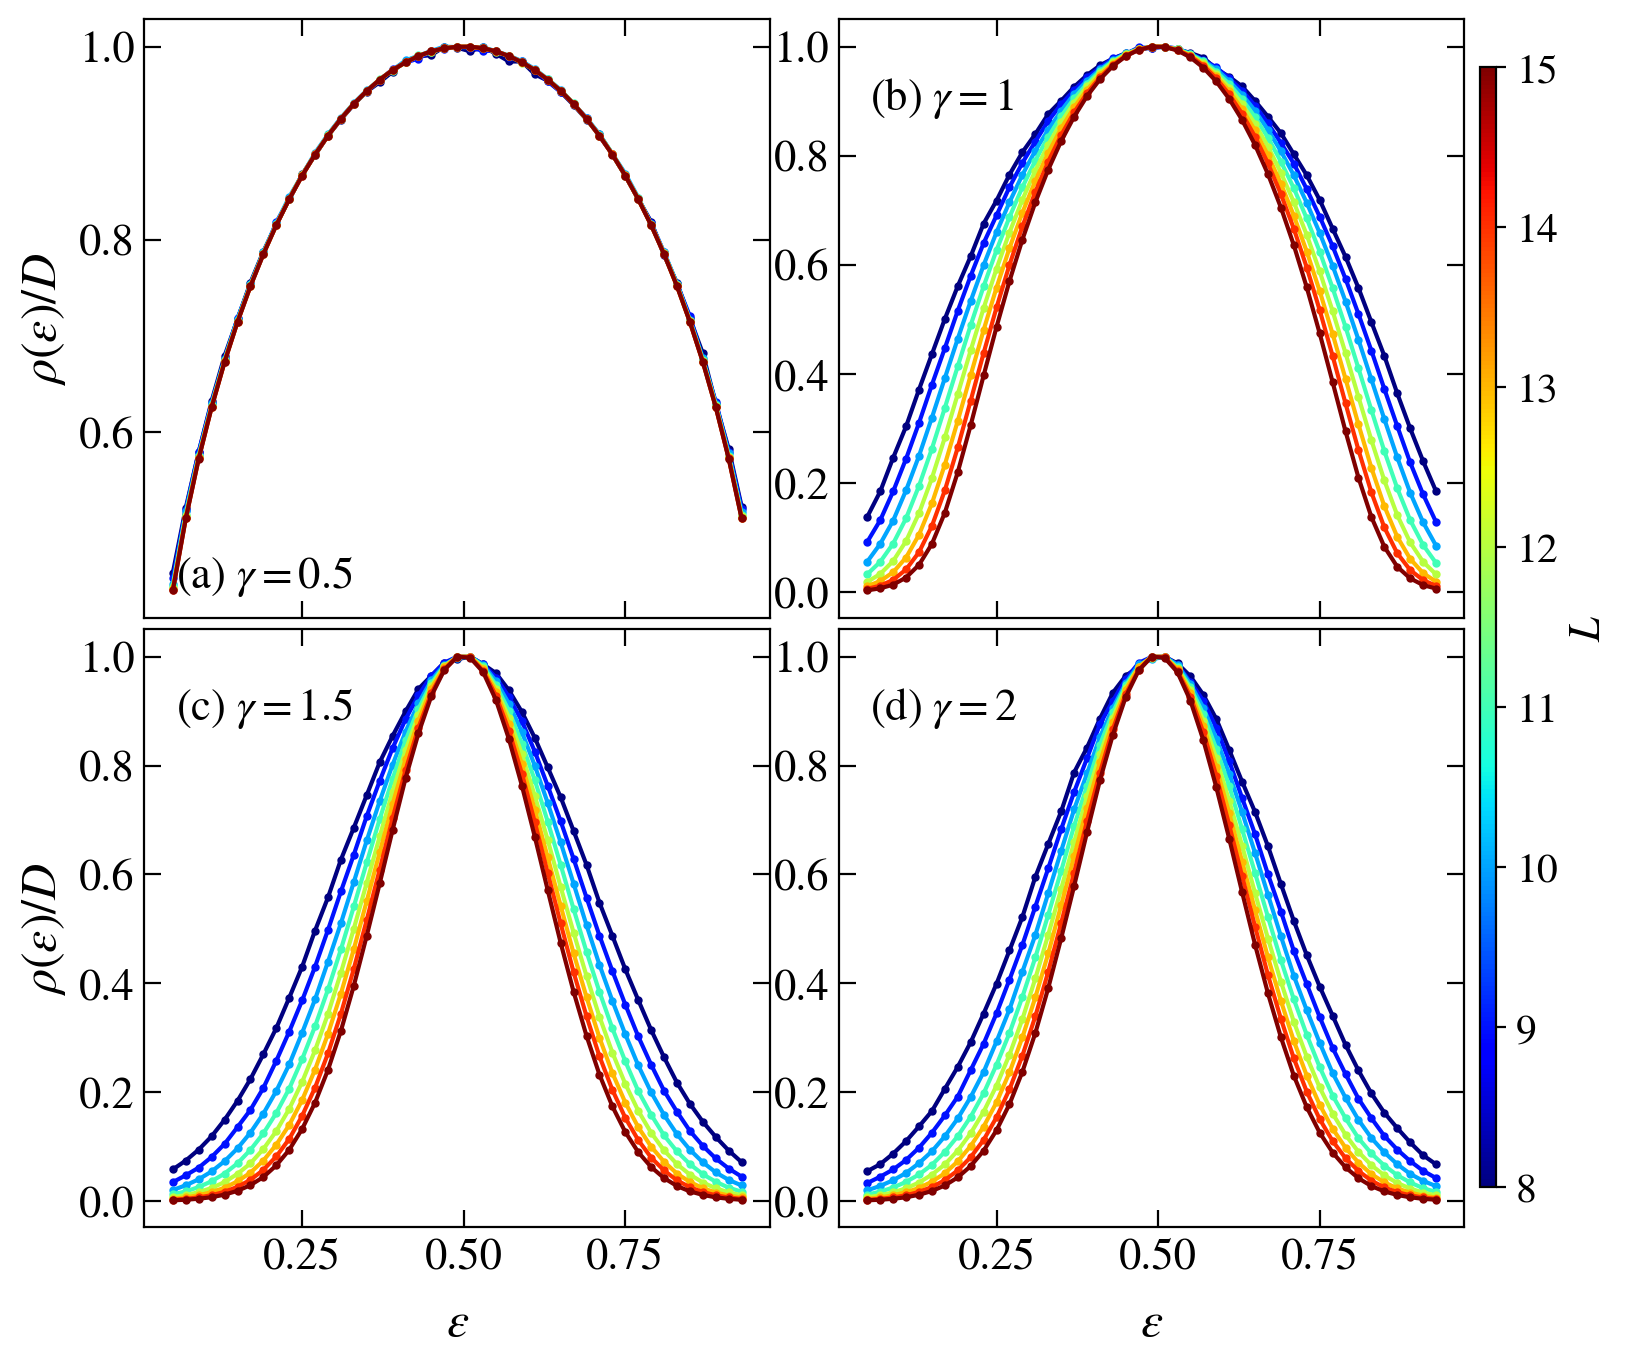

In [225]:
L = 20
w = 2
J = 1
g=0.2
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
fig, axis = plt.subplots( nrows=2, ncols=2, figsize=(8,8), dpi = 200, sharex=True, sharey=False)
axis = axis.flatten()


norm = matplotlib.colors.Normalize(
        vmin=min(sizes),
        vmax=max(sizes))
s_m = matplotlib.cm.ScalarMappable(cmap='jet', norm=norm)
s_m.set_array([])

r_idx = 5
corr = 0
gammas = [0.5, 1.0, 1.5, 2.0]
labs = ["(a)", "(b)", "(c)", "(d)"]
for iia, gx in enumerate(gammas):

    for ii, L in enumerate(sizes):
        dim = 2**L
        col = s_m.to_rgba(L)
        
        name_out = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                
                E    = np.array(file.get('energy_density'))
                # E    = np.array(file.get('mean energies/L=%d'%L))[1:-1] / L
                DOS = np.array(file.get('DOS'))
                DOS = DOS / max(DOS)
                
                axis[iia].plot(E, DOS, color=col, marker='o', markersize=2)
        else:
            print(name_out)
    fig_help.set_plot_elements(axis[iia], ylabel=r"$\rho\left(\epsilon\right)/D$" if iia%2 == 0 else "", xlabel=r"$\epsilon$", font_size=16, set_legend=1, xscale='linear', yscale='linear')
    axis[iia].annotate(labs[iia] + r" $\gamma=%g$"%gx, fontsize=16, xy=(0.05, 0.85) if iia else (0.05, 0.05), xycoords='axes fraction')


fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.15, 0.01, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
cbar.set_label(r"$L$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

fig.subplots_adjust(wspace = 0.11, hspace=0.02)

# fig.suptitle(r"LOCAL DENSITY OF STATES:   $\rho\left(\left|\psi_0\right\rangle,\epsilon\right)=\sum_n|\langle n|\psi_0\rangle|^2\delta(\epsilon-\epsilon_n)$", fontsize=20)
fig.savefig("PLOTS_FADING/Fig_LDOS.pdf", bbox_inches = 'tight', pad_inches=0.02)

## TIME DYNAMICS

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


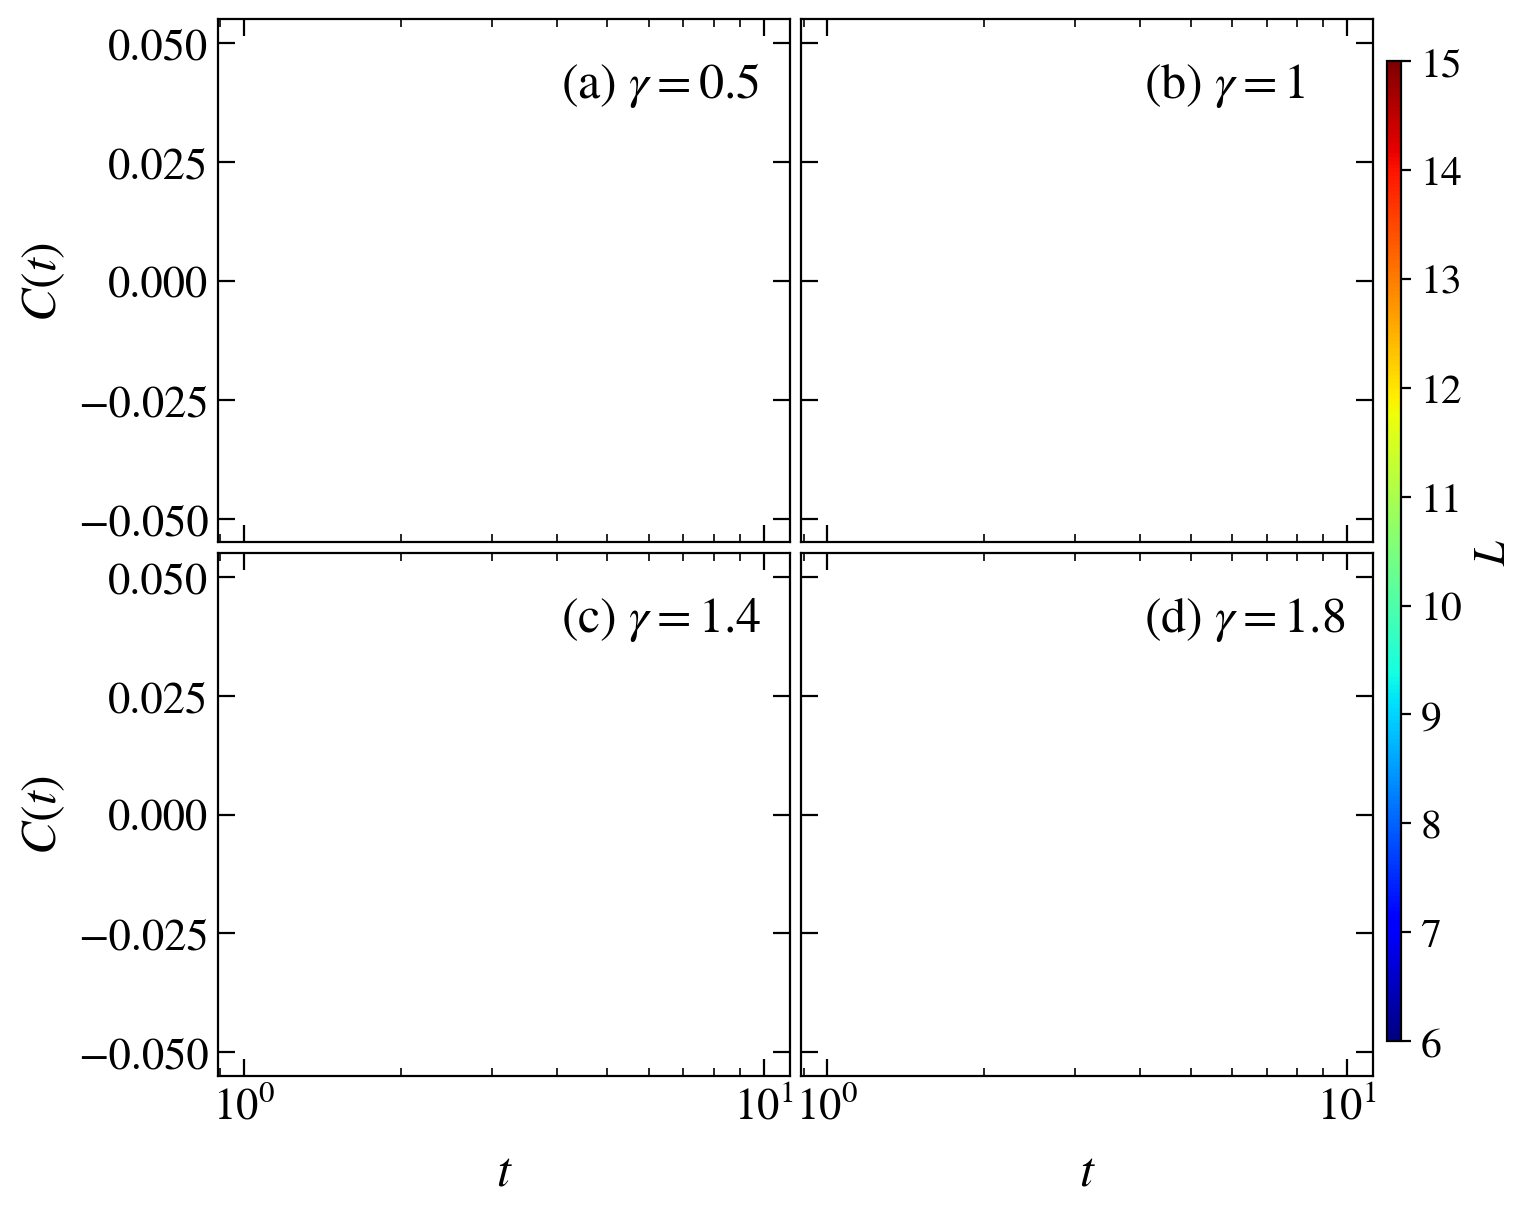

In [2]:
L = 20
w = 2
J = 1
g=0.2
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'Quench/'

sizes = np.arange(6, 16, 1)

DIM = 1
fig, axis = plt.subplots( nrows=2, ncols=2, figsize=(7,7), dpi = 200, sharex=True, sharey=True)
axis = axis.flatten()


norm = matplotlib.colors.Normalize(
        vmin=min(sizes),
        vmax=max(sizes))
s_m = matplotlib.cm.ScalarMappable(cmap='jet', norm=norm)
s_m.set_array([])

r_idx = 5
corr = 0
gammas = [0.5, 1.0, 1.4, 1.8]
labs = ["(a)", "(b)", "(c)", "(d)"]

window = 100
for iia, gx in enumerate(gammas):

    for ii, L in enumerate(sizes):
        
        col = s_m.to_rgba(L)
        
        name_out = prefix +  "Quench_m=%s_J=%g,g=%.2f.hdf5"%(modello, J, gx)
        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                
                times    = np.array(file.get('TIMES/L=%d'%L))
                quench = np.array(file.get('QUENCH/L=%d'%L))
                autocorr = np.array(file.get('AUTOCORR/L=%d'%L))
                # autocorr = tools.remove_fluctuations(autocorr, bucket_size=window)[window//2:-window//2]
                # times = times[window//2:-window//2]
                # print(autocorr)
                
                axis[iia].plot(times, autocorr, color=col)
        else:
            print(name_out)
    fig_help.set_plot_elements(axis[iia], ylabel=r"$C(t)$" if iia%2 == 0 else "", xlabel=r"$t$", font_size=16, set_legend=1, xscale='log', yscale='linear')
    axis[iia].annotate(labs[iia] + r" $\gamma=%g$"%gx, fontsize=18, xy=(0.6, 0.85), xycoords='axes fraction')
    # axis[iia].set_xlim(0, 1e2)

fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.15, 0.01, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
cbar.set_label(r"$L$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

fig.subplots_adjust(wspace = 0.02, hspace=0.02)
fig.savefig("PLOTS_FADING/Fig_AUTOCORR.pdf", bbox_inches = 'tight', pad_inches=0.02)

[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'float'

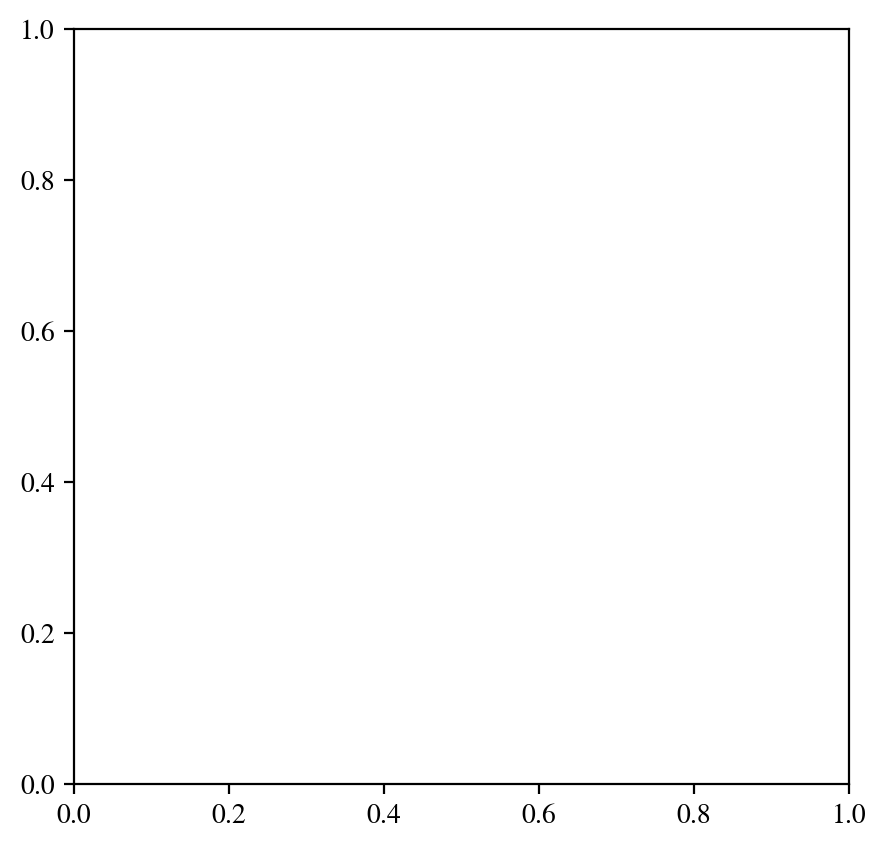

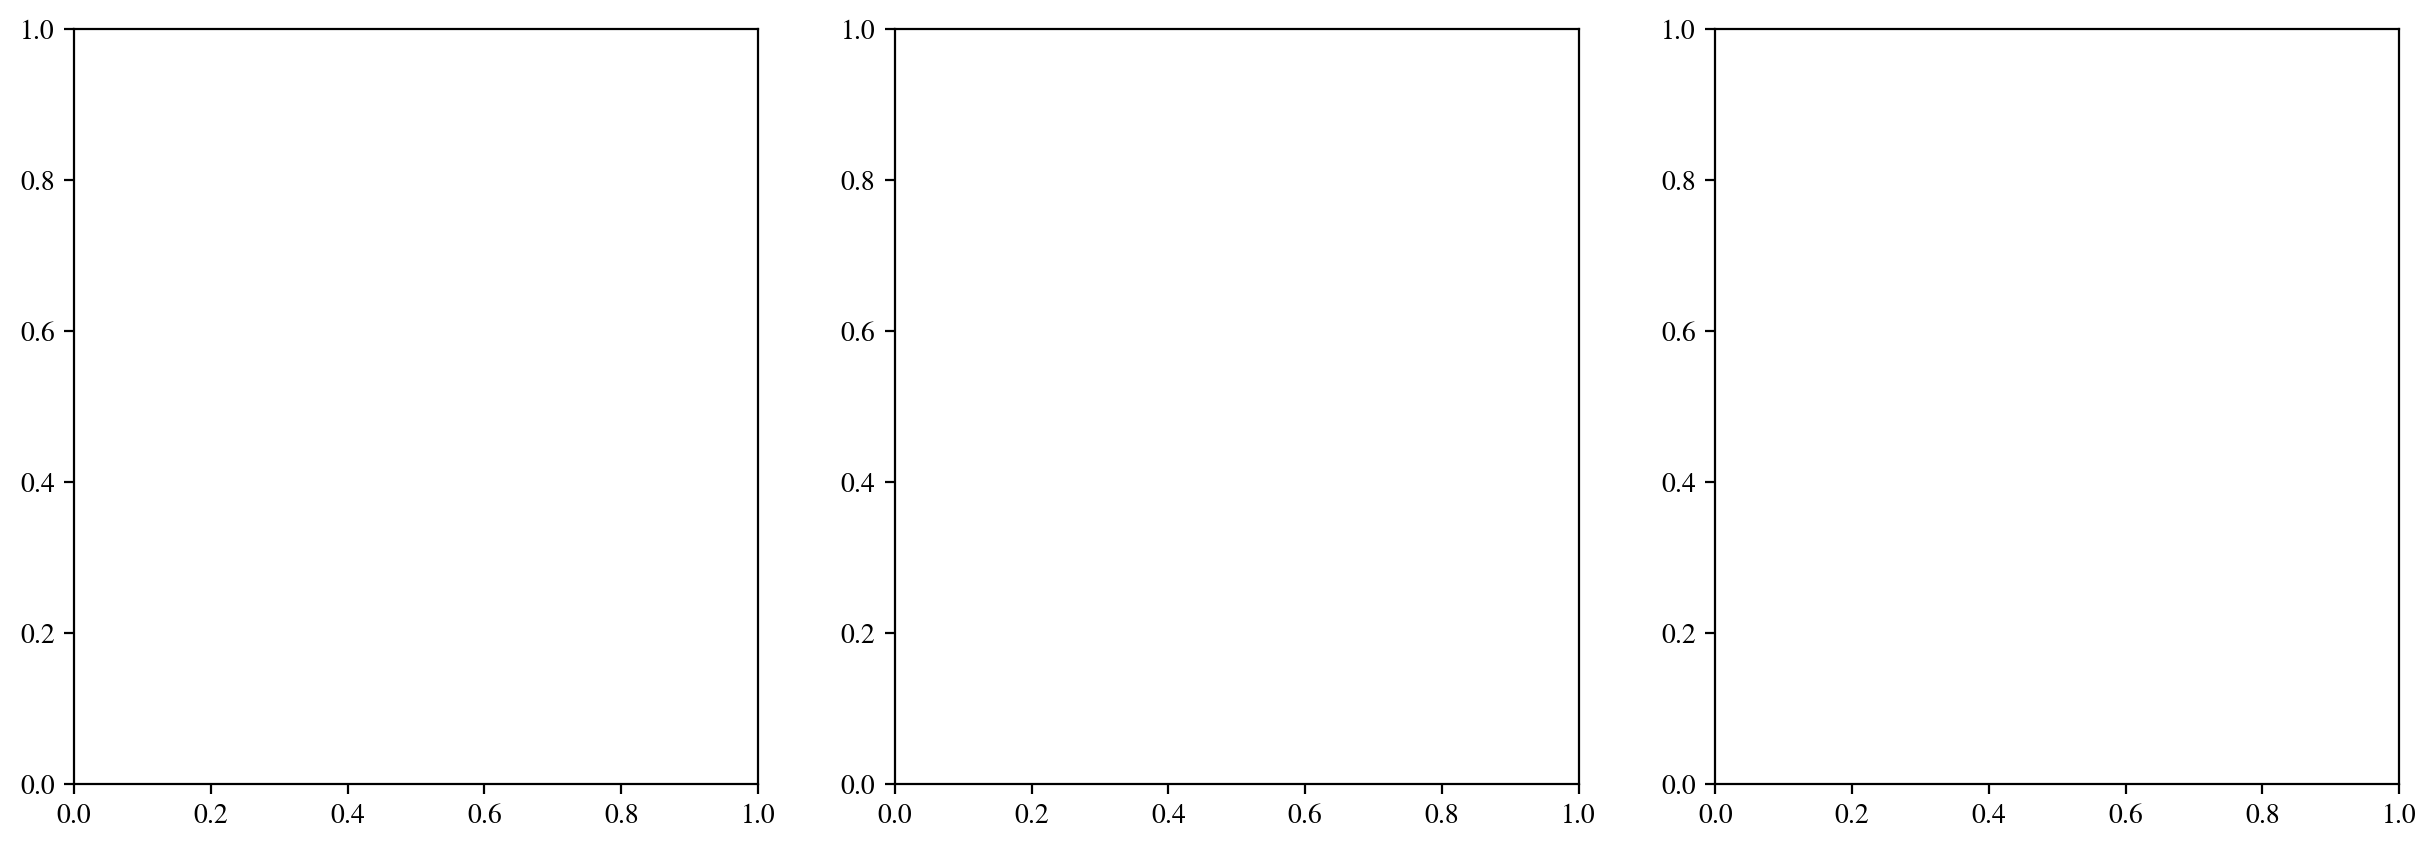

In [3]:
L = 20
w = 2
J = 1
g=0.2
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'Quench/'

sizes = np.arange(6, 16, 1)

DIM = 1
fig2, axes = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)

fig, axis = plt.subplots( nrows=1, ncols=3, figsize=(15,5), dpi = 200)
axis = axis.flatten()

# gammas = np.array( [*np.arange(0.5, 2.0, 0.1), *np.arange(2.1, 2.2, 0.1)] )
gammas = np.arange(0.5, 2.1, 0.1)
g_crit = 2
print(gammas)

norm = matplotlib.colors.Normalize(
        vmin=min(gammas),
        vmax=max(gammas))
s_m = matplotlib.cm.ScalarMappable(cmap='viridis_r', norm=norm)
s_m.set_array([])


def fading_erg(x, eta, a):
    return a * 2**(-x/eta)

def fading_loc(x, eta, a):
    return a * 2**(x/eta)

colors = []
eta_DE = []
eta_fluct = []
eta_ipr = []

for iia, gx in enumerate(gammas):
    name_out = prefix +  "Quench_m=%s_J=%g,g=%.2f.hdf5"%(modello, J, gx)
    col = s_m.to_rgba(gx)
    colors.append(col)
    
    fading_fit = fading_erg if gx <= g_crit else fading_loc
    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            sizes = np.array(file.get('sizes'))
            
            ipr = np.array(file.get('ipr'))
            DE = np.array(file.get('diagonal ensemble abs'))
            temp_fluct = ( np.array(file.get('temporal fluctuations')) ) **0.5
            # temp_fluct = np.zeros(sizes.shape)
            axis[0].scatter(sizes, DE, color=col)
            pars, pconv, fit_info, msg, _ = fit(fading_erg,
                            xdata = sizes[-5:],
                            ydata = DE[-5:],
                            full_output=True, maxfev=10000)
            # print(J, alfa, fit_info['fvec'])
            dense_sizes = np.linspace(sizes[0], sizes[-1], 10000)
            axis[0].plot(dense_sizes, fading_fit(dense_sizes, *pars), lw=1.5, color=col, ls = '-')
            print(gx, *pars)
            _etaX_ = pars[0]
            if _etaX_ > 1e6: _etaX_ = np.nan
            eta_DE.append(_etaX_)
            
            
            axis[2].scatter(sizes, temp_fluct, color=col)
            pars, pconv, fit_info, msg, _ = fit(fading_erg,
                            xdata = sizes[-5:],
                            ydata = temp_fluct[-5:],
                            full_output=True, maxfev=10000)
            # print(J, alfa, fit_info['fvec'])
            dense_sizes = np.linspace(sizes[0], sizes[-1], 10000)
            axis[2].plot(dense_sizes, fading_erg(dense_sizes, *pars), lw=1.5, color=col, ls = '-')
            print(gx, *pars)
            _etaX_ = pars[0]
            if _etaX_ > 1e6: 
                _etaX_ = np.nan
            eta_fluct.append(_etaX_)
            
            axis[1].scatter(sizes, ipr, color=col)
            pars, pconv, fit_info, msg, _ = fit(fading_erg,
                            xdata = sizes[-5:],
                            ydata = ipr[-5:],
                            full_output=True, maxfev=10000)
            # print(J, alfa, fit_info['fvec'])
            dense_sizes = np.linspace(sizes[0], sizes[-1], 10000)
            axis[1].plot(dense_sizes, fading_erg(dense_sizes, *pars), lw=1.5, color=col, ls = '-')
            print(gx, *pars)
            _etaX_ = pars[0]
            if _etaX_ > 1e6: _etaX_ = np.nan
            eta_ipr.append(_etaX_)
    else:
        print(name_out)

fig_help.set_plot_elements(axis[0], ylabel=r"$\mathcal{Q}_{\infty}$", xlabel=r"$L$", font_size=16, set_legend=1, xscale='linear', yscale='log')
fig_help.set_plot_elements(axis[1], ylabel=r"$IPR$", xlabel=r"$L$", font_size=16, set_legend=1,           xscale='linear', yscale='log')
fig_help.set_plot_elements(axis[2], ylabel=r"$\sigma_t$", xlabel=r"$L$", font_size=16, set_legend=1,           xscale='linear', yscale='log')

fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.15, 0.01, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
cbar.set_label(r"$\gamma$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

fig.subplots_adjust(wspace = 0.3, hspace=0.02)

colors = np.array(colors)
eta_DE = np.array(eta_DE)
eta_fluct = np.array(eta_fluct)
eta_ipr = np.array(eta_ipr)

print("AAAA", eta_fluct)
# axes.scatter(alfas, eta_DE,    marker='o', color=colors, label=r"$\mathcal{Q}_{\infty}$")
# axes.scatter(alfas, eta_fluct, marker='v', color=colors, facecolor='None', label=r"$\sigma_t$")

indices = np.argwhere(gammas < g_crit)
axes.scatter(gammas[indices], eta_DE[indices],    marker='o', color=colors[indices], label=r"$\mathcal{Q}_{\infty}$")
axes.scatter(gammas[indices], eta_fluct[indices], marker='v', color=colors[indices], facecolor='None', label=r"$\sigma_t$")
axes.scatter(gammas[indices], eta_ipr[indices], marker='s', color=colors[indices], facecolor='None', label=r"$IPR$")

indices = np.argwhere(gammas >= g_crit)
axes.scatter(gammas[indices], eta_DE[indices],    marker='o', color=colors[indices])
axes.scatter(gammas[indices], eta_fluct[indices], marker='v', color=colors[indices], facecolor='None')
axes.scatter(gammas[indices], eta_ipr[indices], marker='s', color=colors[indices], facecolor='None')

axes.axvline(x=g_crit, ls=':', color='r')
axes.annotate(r"${\gamma}_c$", color='r', fontsize=18, xy=(g_crit-0.03, 2.1), xycoords='data', backgroundcolor="w")

xx = np.linspace(1, g_crit-0.05, 1000)
axes.plot(xx, 2 / (2 - xx), ls='-', color='k')
axes.plot(xx, 1 / (2 - xx), ls='--', color='gray')

fig_help.set_plot_elements(axes, ylabel=r"$\eta$", xlabel=r"$\gamma$", font_size=16, set_legend=1, xscale='linear', yscale='log')


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


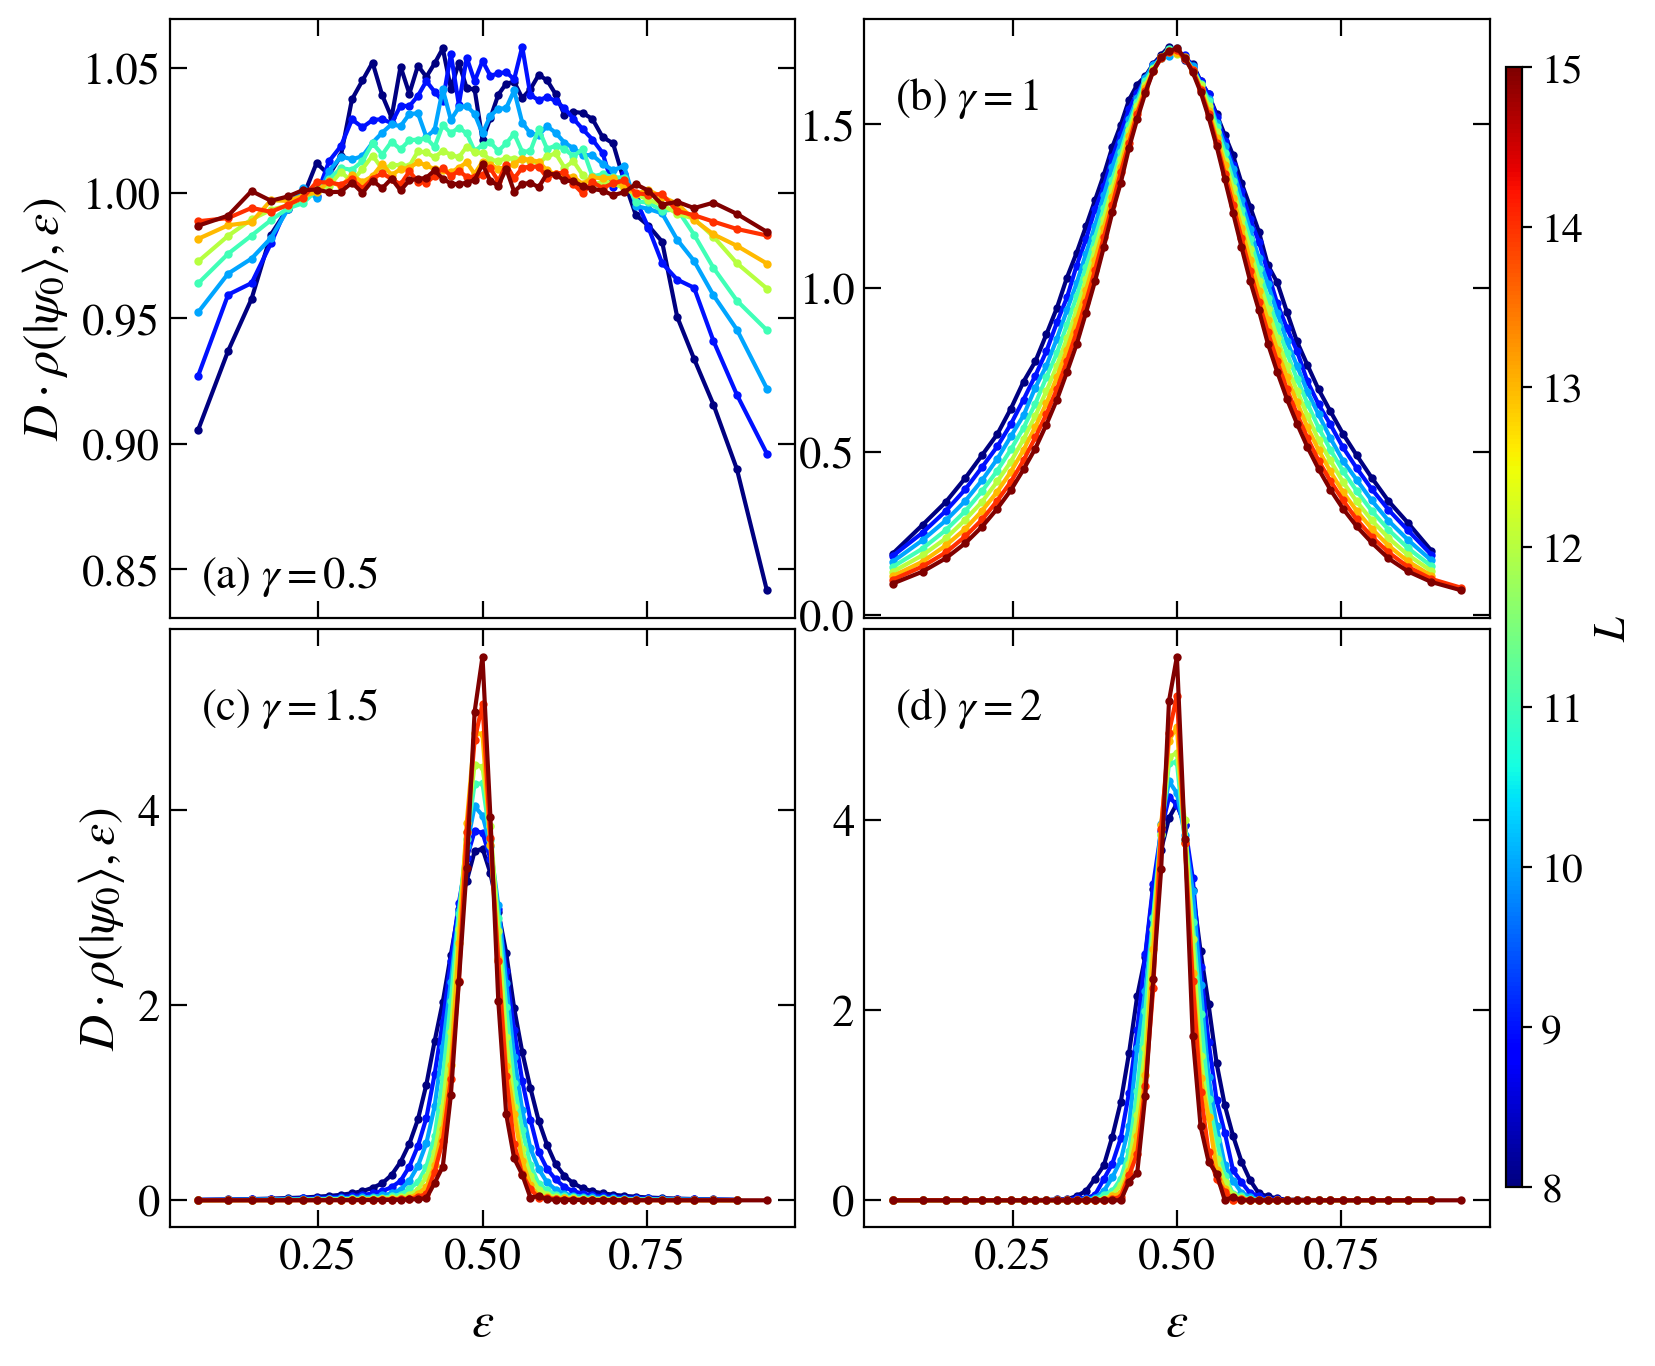

In [185]:
L = 20
w = 2
J = 1
g=0.2
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'Quench/'

sizes = np.arange(8, 16, 1)

DIM = 1
fig, axis = plt.subplots( nrows=2, ncols=2, figsize=(8,8), dpi = 200, sharex=True, sharey=False)
axis = axis.flatten()


norm = matplotlib.colors.Normalize(
        vmin=min(sizes),
        vmax=max(sizes))
s_m = matplotlib.cm.ScalarMappable(cmap='jet', norm=norm)
s_m.set_array([])

r_idx = 5
corr = 0
gammas = [0.5, 1.0, 1.5, 2.0]
labs = ["(a)", "(b)", "(c)", "(d)"]
for iia, gx in enumerate(gammas):

    for ii, L in enumerate(sizes):
        dim = 2**L
        col = s_m.to_rgba(L)
        
        name_out = prefix +  "Quench_m=%s_J=%g,g=%.2f.hdf5"%(modello, J, gx)
        if exists(name_out):
            with h5py.File(name_out, "r") as file:
                
                E    = np.array(file.get('energy_density'))[1:-1]
                # E    = np.array(file.get('mean energies/L=%d'%L))[1:-1] / L
                LDOS = np.array(file.get('LDOS/L=%d'%L))[1:-1] * dim
                
                axis[iia].plot(E, LDOS, color=col, marker='o', markersize=2)
        else:
            print(name_out)
    fig_help.set_plot_elements(axis[iia], ylabel=r"$D\cdot \rho\left(\left|\psi_0\right\rangle,\epsilon\right)$" if iia%2 == 0 else "", xlabel=r"$\epsilon$", font_size=16, set_legend=1, xscale='linear', yscale='linear')
    axis[iia].annotate(labs[iia] + r" $\gamma=%g$"%gx, fontsize=16, xy=(0.05, 0.85) if iia else (0.05, 0.05), xycoords='axes fraction')


fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.15, 0.01, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
cbar.set_label(r"$L$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

fig.subplots_adjust(wspace = 0.11, hspace=0.02)

# fig.suptitle(r"LOCAL DENSITY OF STATES:   $\rho\left(\left|\psi_0\right\rangle,\epsilon\right)=\sum_n|\langle n|\psi_0\rangle|^2\delta(\epsilon-\epsilon_n)$", fontsize=20)
fig.savefig("PLOTS_FADING/Fig_LDOS.pdf", bbox_inches = 'tight', pad_inches=0.02)

No handles with labels found to put in legend.


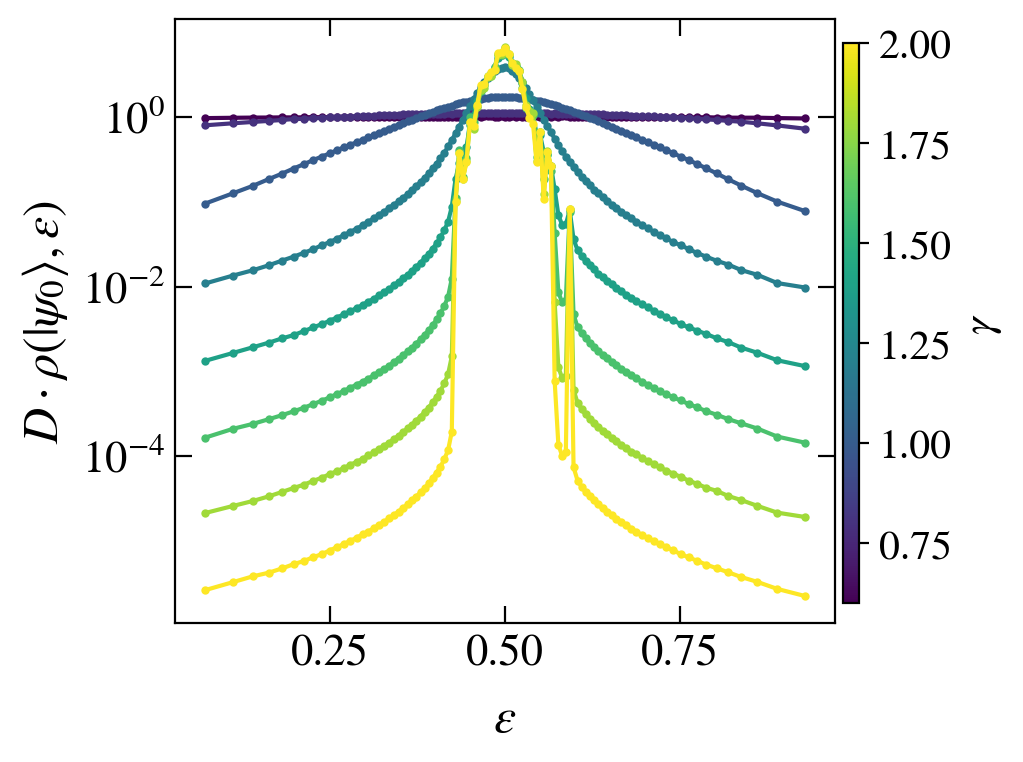

In [223]:
L = 15
w = 2
J = 1
g=0.2
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'Quench/'

sizes = np.arange(8, 16, 1)

DIM = 1
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(4,4), dpi = 200, sharex=True, sharey=False)

gammas = np.arange(0.6, 2.01, 0.2)
norm = matplotlib.colors.Normalize(
        vmin=min(gammas),
        vmax=max(gammas))
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
s_m.set_array([])

r_idx = 5
corr = 0

labs = ["(a)", "(b)", "(c)", "(d)"]
for iia, gx in enumerate(gammas):

    dim = 2**L
    col = s_m.to_rgba(gx)
    
    name_out = prefix +  "Quench_m=%s_J=%g,g=%.2f.hdf5"%(modello, J, gx)
    if exists(name_out):
        with h5py.File(name_out, "r") as file:
            
            E    = np.array(file.get('energy_density'))[1:-1]
            # E    = np.array(file.get('mean energies/L=%d'%L))[1:-1] / L
            LDOS = np.array(file.get('LDOS/L=%d'%L))[1:-1] * dim
            
            axis.plot(E, LDOS, color=col, marker='o', markersize=2)
    else:
        print(name_out)
fig_help.set_plot_elements(axis, ylabel=r"$D\cdot \rho\left(\left|\psi_0\right\rangle,\epsilon\right)$", xlabel=r"$\epsilon$", font_size=16, set_legend=1, xscale='linear', yscale='log')


fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.15, 0.02, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
cbar.set_label(r"$\gamma$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

fig.subplots_adjust(wspace = 0.11, hspace=0.02)

# fig.suptitle(r"LOCAL DENSITY OF STATES:   $\rho\left(\left|\psi_0\right\rangle,\epsilon\right)=\sum_n|\langle n|\psi_0\rangle|^2\delta(\epsilon-\epsilon_n)$", fontsize=20)
# fig.savefig("PLOTS_FADING/Fig_LDOS.pdf", bbox_inches = 'tight', pad_inches=0.02)

## SPECTRAL FUNCTIONS

### TESTS

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0.2 0.19
0.2 0.19
0.2 0.19
0.2 0.19
0.2 0.19
0.2 0.19
0.2 0.19
0.2 0.19
0.35 0.35
0.35 0.35
0.35 0.35
0.35 0.35
0.35 0.35
0.35 0.35
0.35 0.35
0.35 0.35
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49


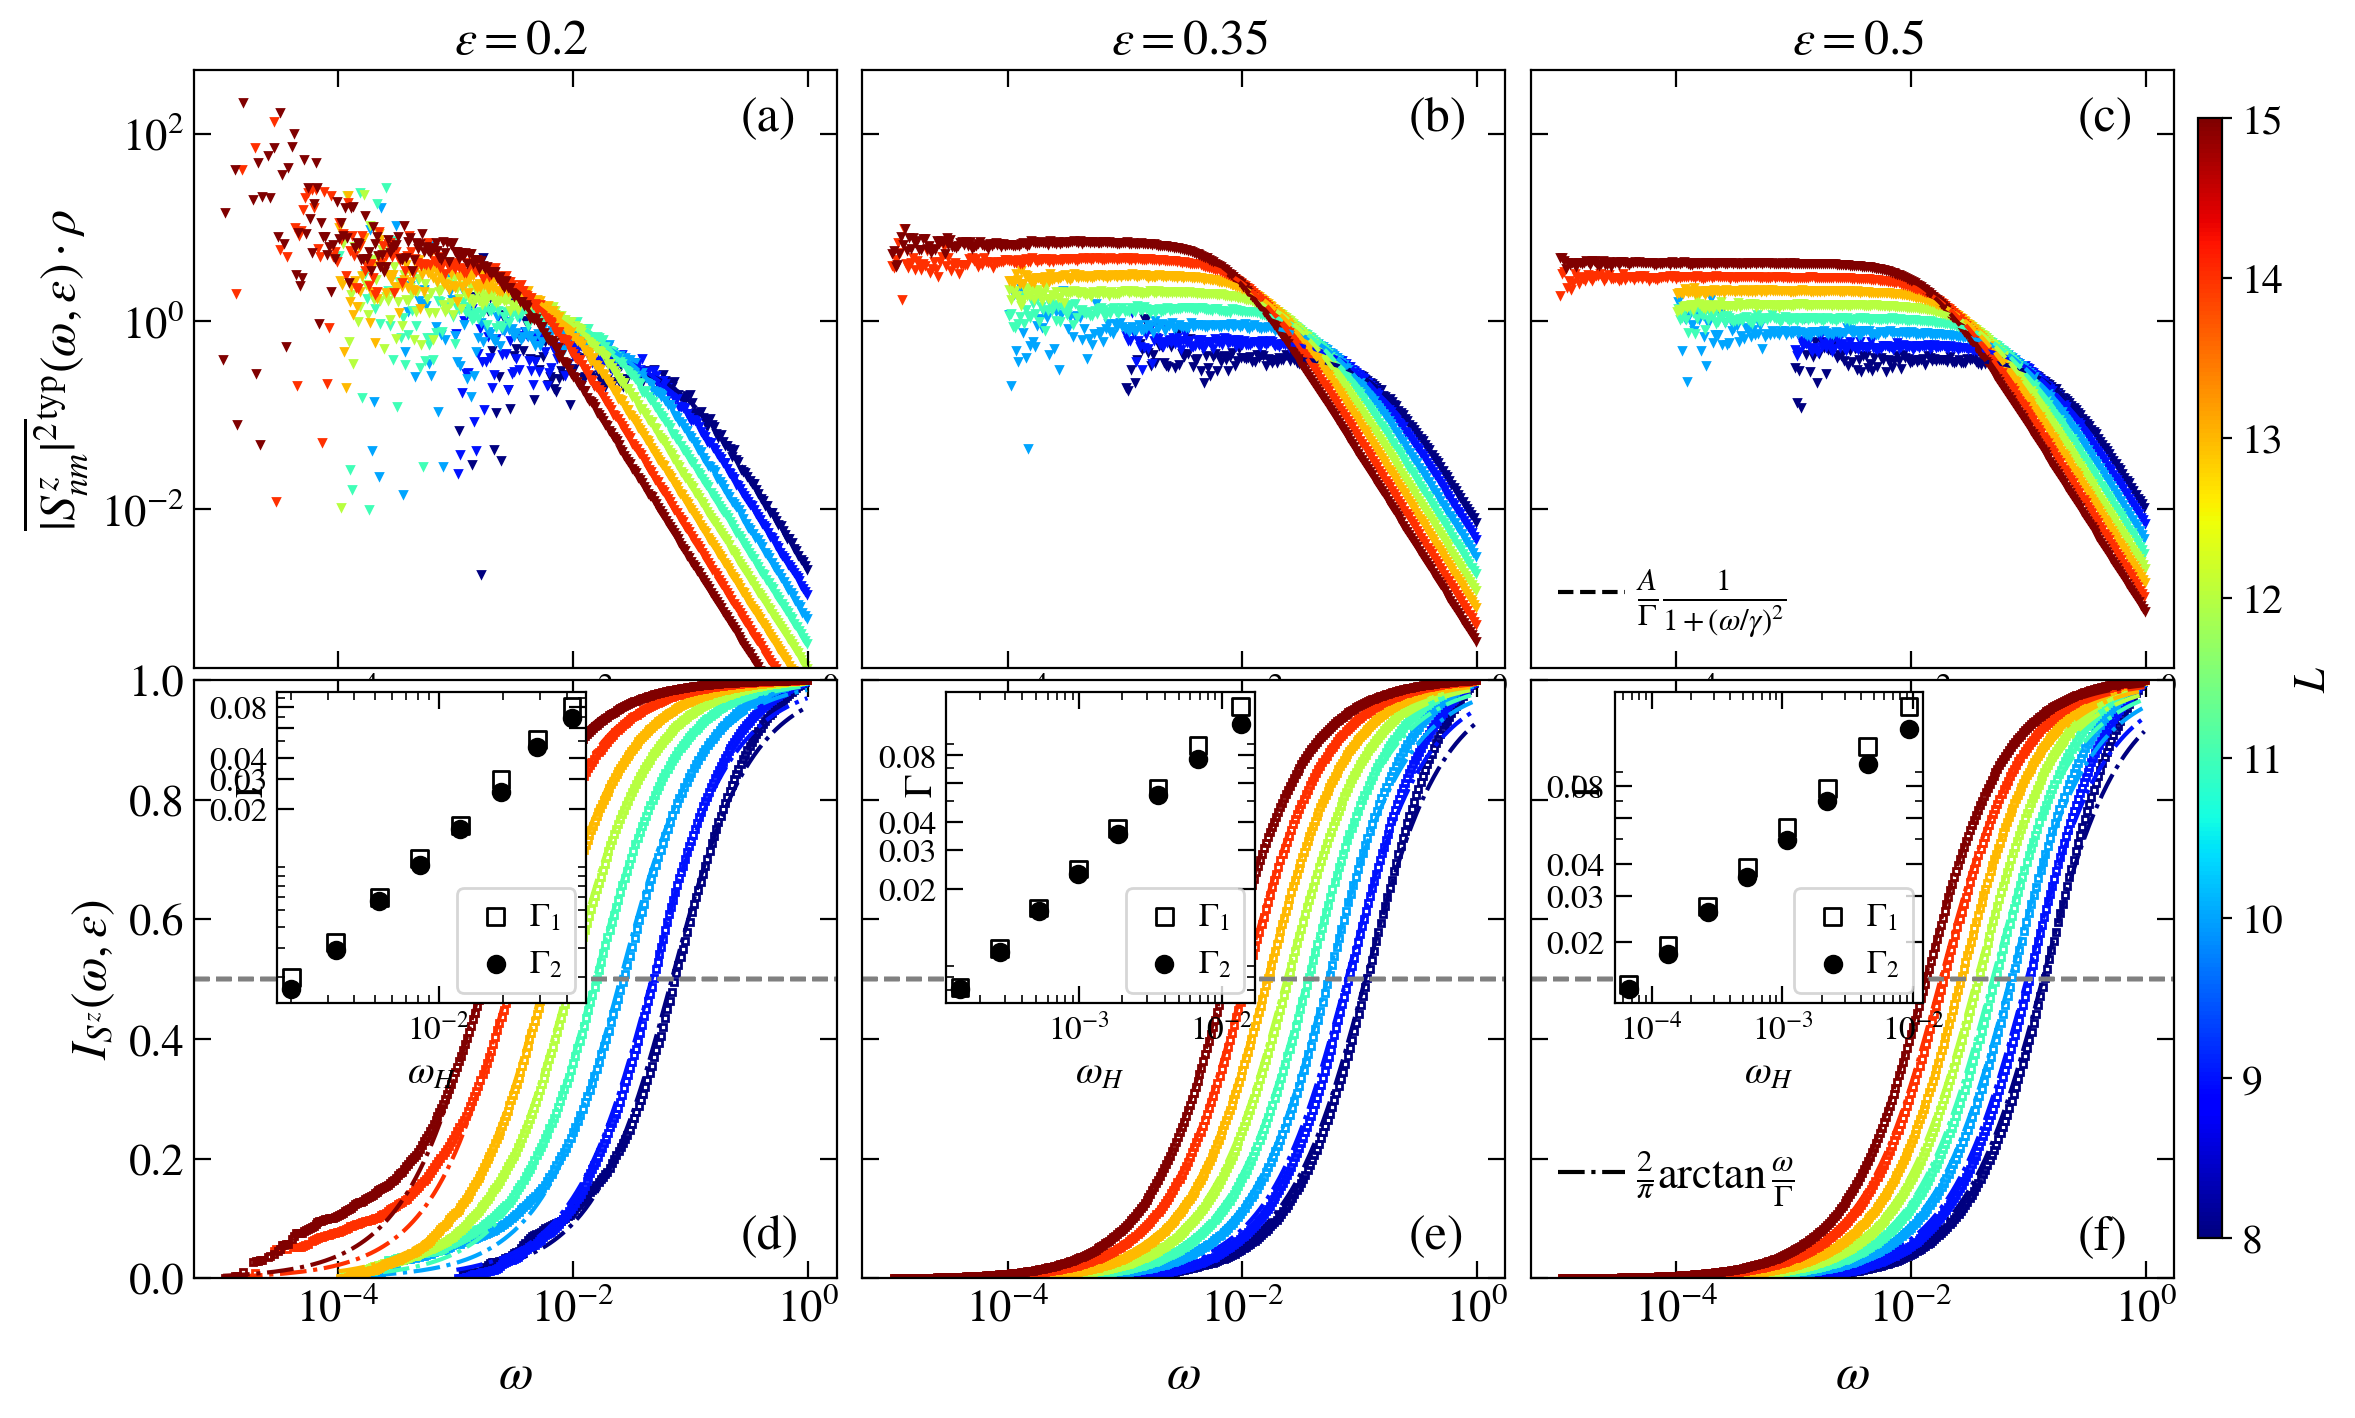

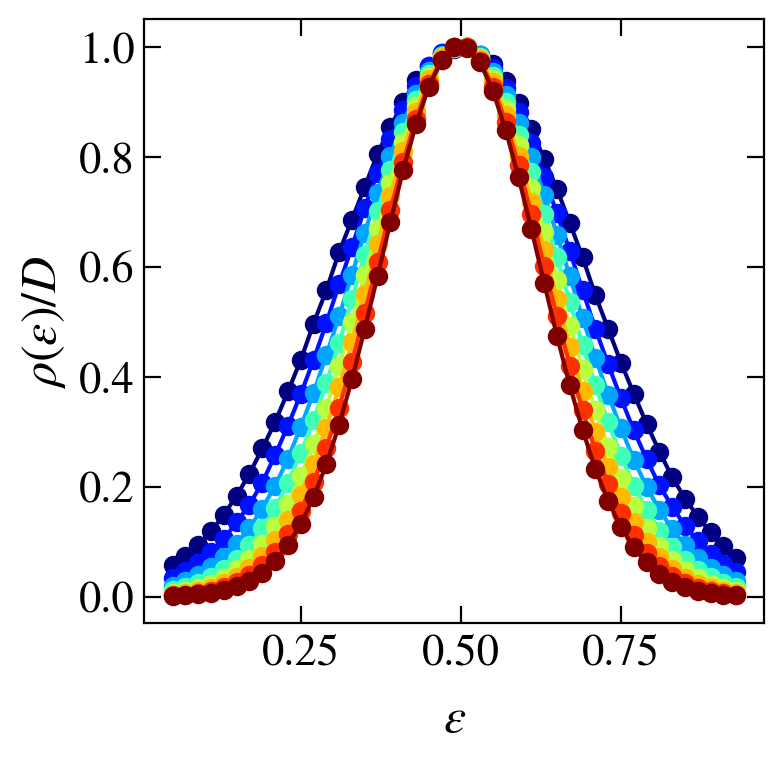

In [15]:
markers = itertools.cycle(markers_ls)
colors_ls_cyc = itertools.cycle(colors_ls)
L = 20
w = 2
J = 1
g = 1.5

op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2

def lorenz(x, A, G1):
    return A / ( (x / G1)**2 + 1)

def arctan(x, G):
    return 2 / np.pi * np.arctan(x / G)

AGP = 0

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='jet', norm=matplotlib.colors.Normalize(vmin=min(sizes),vmax=max(sizes) ))
s_m.set_array([])

fig, axis = plt.subplots( nrows=2, ncols=3, figsize=(12,8), dpi = 200, sharex = False, sharey = 'row')
# axis = np.array(axis).flatten()

fig2, axis2 = plt.subplots( nrows=1, ncols=1, figsize=(4,4), dpi = 200, sharex = False, sharey = 'row')

E = np.arange(0.05, 0.95, 0.02)
omegax = np.zeros( (20 * (L)) )

labs = ["(a)", "(b)", "(c)"]
labs2 = ["(d)", "(e)", "(f)"]
_eps_ = [0.2, 0.35, 0.5]
# _eps_ = [0.5, 0.65, 0.8]

upper_cut = 1
for iie, eps in enumerate(_eps_):
    idx = min(range(len(E)), key=lambda i: abs(E[i] - eps))
    
    all_spec = []
    all_spec_typ = []
    cut = 0
    wH = np.zeros(sizes.shape)
    spec_at_wH = np.zeros(sizes.shape)
    Gammas1 = []
    Gammas2 = []
    spec_at_G1 = []
    spec_at_G2 = []
    for iiL, L in enumerate(sizes):
        col = s_m.to_rgba(L)
        dim = 2**(L)
        name = prefix +  info(L=L, J=J, g=g, model=modello, ext='.hdf5')
        if exists(name):
            with h5py.File(name, "r") as file:
                R = np.array(file.get('realisations'))
                
                Ex = np.array(file.get('energy_density'))
                idx2 = min(range(len(Ex)), key=lambda i: abs(Ex[i] - eps))
                print(eps, Ex[idx2])
                DOS = np.array(file.get('DOS'))
                DOS = DOS / max(DOS) * dim
                if iie == 0:
                    axis2.plot(Ex, DOS / dim, marker='o', color=col)
                
                X = np.array(file.get('wH_typ_density'))[idx2]
                wH[iiL] = X
                cut = X
                omegax = np.array(file.get('omegas'))
                omegax = np.sqrt(omegax[1:] * omegax[:-1])
                
                sig = 0.5
                a=1
                # DOS = 1/np.sqrt(2*np.pi * sig**2) * np.exp(-a**2 * (Ex-0.5)**2 / (2*sig**2))
                spec_fun = np.array(file.get('spec_fun'))[idx] * DOS[idx2]
                spec_fun_typ = np.array(file.get('spec_fun_typ'))[idx] * DOS[idx2]
                # print(L, g, spec_fun.shape)
                
                wH_idx = min(range(len(omegax)), key=lambda i: abs(omegax[i] - wH[iiL]))
                spec_at_wH[iiL] = spec_fun[wH_idx]
                
                all_spec.append(spec_fun)
                all_spec_typ.append(spec_fun_typ)
                
                R = np.array(file.get('realisations'))
        else:
            print(name)

        yy0 = spec_fun if AGP else spec_fun_typ
        
        
        omegax = omegax[~np.isnan(yy0)]
        yy0 = yy0[~np.isnan(yy0)]
        
        axis[0][iie].plot(omegax, yy0, color=col, marker='v', markersize=2, lw=0,zorder=0)
        # axis[0][iie].axvline(x=upper_cut, ls=':', color='gray')
        indices = np.where(np.logical_and(omegax >= cut, omegax < upper_cut))[0]
        xx = omegax[indices]
        yy = yy0[indices]
        pars, pconv= fit(lorenz,
                    xdata = xx,
                    ydata = yy,
                    maxfev = 20000)
        z = np.linspace(min(xx), max(xx), 5000)
        # print(eps, L, G1)
        G1 = np.abs(pars[-1])
        Gammas1.append(G1)
        spec_at_G1.append(yy0[np.argmin( np.abs(omegax - G1) )])
        axis[0][iie].plot(z, lorenz(z, *pars), ls='--', color=col)
        
        # yy = integrate.cumulative_trapezoid(yy0, omegax)
        # yy = (yy - yy[0]) / (yy[-1] - yy[0])
        
        indices = np.where(np.logical_and(omegax >= X, omegax < 100 * X))[0]
        
        xx = omegax#[indices]
        yy0 = yy0#[indices]
        yy = integrate.cumulative_trapezoid(yy0, xx)
        yy = (yy - yy[0]) / (yy[-1] - yy[0])
        
        axis[1][iie].plot(xx[1:], yy, color=col, marker='s', markersize=2, lw=0, markerfacecolor='None')
        axis[1][iie].axhline(y=0.5, ls='--', color='gray')
        
        G2 = xx[np.argmin( np.abs(yy - 0.5) )]
        spec_at_G2.append(yy0[np.argmin( np.abs(omegax - G2) )])
        Gammas2.append(G2)
        axis[1][iie].plot(xx, arctan(xx, G2), ls='-.', color=col)
        if iie == 2 and L == 12:
            axis[0][iie].plot(np.nan, np.nan, ls='--', color='k', label=r"$\frac{A}{\Gamma}\frac{1}{1+(\omega/\gamma)^2}$")
            axis[1][iie].plot(np.nan, np.nan, ls='-.', color='k', label=r"$\frac{2}{\pi}\arctan{\frac{\omega}{\Gamma}}$")
    Gammas1 = np.array(Gammas1)
    Gammas2 = np.array(Gammas2)
    # axis[0][iie].scatter(Gammas1, spec_at_G1, marker='s', color='black', label=r"$\Gamma_1$", zorder=10, facecolor='None')
    # axis[0][iie].scatter(Gammas2, spec_at_G2, marker='o', color='black', label=r"$\Gamma_2$", zorder=10)
    # axis[iie].plot(wH, spec_at_wH, marker='s', color='k', ls='--')
    if AGP : #\cdot\rho(\epsilon)
        fig_help.set_plot_elements(axis[0][iie], ylabel=r"$\overline{|S^z_{nm}|^2}(\omega,\epsilon)\cdot\rho$" if iie == 0 else "", xlabel="", font_size=16, set_legend=False, xscale='log', yscale='log')
        fig_help.set_plot_elements(axis[1][iie], ylabel=r"$I_{S^z}(\omega,\epsilon)$" if iie == 0 else "", xlabel=r"$\omega$", font_size=16, set_legend=False, xscale='log', yscale='linear')
    else:    
        fig_help.set_plot_elements(axis[0][iie], ylabel=r"$\overline{|S^z_{nm}|^2}^{\rm typ}(\omega,\epsilon)\cdot\rho$" if iie == 0 else "", xlabel="", font_size=16, set_legend=False, xscale='log', yscale='log')
        fig_help.set_plot_elements(axis[1][iie], ylabel=r"$I_{S^z}(\omega,\epsilon)$" if iie == 0 else "", xlabel=r"$\omega$", font_size=16, set_legend=False, xscale='log', yscale='linear')
    fig_help.set_legend(axis[0][iie], fontsize=16, loc='lower left')
    fig_help.set_legend(axis[1][iie], fontsize=16, loc='lower left', anchor=(-0.02, 0.05))
    axis[0][iie].set_title(r" $\epsilon=%g$"%eps, fontsize=18)
    axis[0][iie].annotate(labs[iie],     fontsize=18, xy=(0.85, 0.9), xycoords='axes fraction')
    axis[1][iie].annotate(labs2[iie],     fontsize=18, xy=(0.85, 0.05), xycoords='axes fraction')
    axis[0][iie].set_ylim(2e-4, None)
    axis[1][iie].set_ylim(0, 1)
    # axis[0][iie].set_xlim(0.2*min(omegax), max(omegax))
    
    inset = axis[1][iie].inset_axes([0.13, 0.46, 0.48, 0.52])
    
        
    # inset.xaxis.set_label_coords(.45, -0.05)
    inset.yaxis.set_label_coords(-0.02, 0.7)
    inset.scatter(wH, Gammas1, marker='s', color='black', label=r"$\Gamma_1$", zorder=10, facecolor='None')
    inset.scatter(wH, Gammas2, marker='o', color='black', label=r"$\Gamma_2$", zorder=10)
    fig_help.set_plot_elements(inset, ylabel=r"$\Gamma$", xlabel=r"$\omega_H$", font_size=12, set_legend=False, xscale='log', yscale='log')
    fig_help.set_legend(inset, fontsize=12, loc='lower right', frameon=True)
    inset.set_yticks([0.02, 0.03, 0.04, 0.06, 0.08])
    inset.set_yticklabels(["0.02", "0.03", "0.04", "", "0.08"])

fig_help.set_plot_elements(axis2, ylabel=r"$\rho(\epsilon)/D$", xlabel=r"$\epsilon$", font_size=16, set_legend=False, xscale='linear', yscale='linear')
  
fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.15, 0.01, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
cbar.set_label(r"$L$", fontsize=16)
cbar.ax.tick_params(labelsize=15)

fig.subplots_adjust(wspace = 0.04, hspace=0.02)
# fig.savefig("plots_AGP/FigS4.pdf", bbox_inches = 'tight', pad_inches=0.02)

#### EXPONENT $\eta$

0.05 0 1.9748
0.05 0 2.434
0.05 0 2.8978
0.05 0 3.514666666666667
0.05 0 4.1085
0.05 0 4.732394366197183
0.07 1 3.1218
0.07 1 4.0988
0.07 1 5.1546
0.07 1 6.534
0.07 1 7.966
0.07 1 9.78361075544174
0.09000000000000001 2 4.6234
0.09000000000000001 2 6.5718
0.09000000000000001 2 8.7832
0.09000000000000001 2 11.725666666666667
0.09000000000000001 2 14.937
0.09000000000000001 2 19.06530089628681
0.11000000000000001 3 6.5808
0.11000000000000001 3 9.9836
0.11000000000000001 3 14.4272
0.11000000000000001 3 20.349
0.11000000000000001 3 27.7295
0.11000000000000001 3 37.0550576184379
0.13 4 8.801
0.13 4 14.365
0.13 4 22.2686
0.13 4 33.693666666666665
0.13 4 48.69
0.13 4 69.1651728553137
0.15000000000000002 5 11.2788
0.15000000000000002 5 19.3958
0.15000000000000002 5 32.1774
0.15000000000000002 5 52.11633333333333
0.15000000000000002 5 80.738
0.15000000000000002 5 122.19334186939821
0.17000000000000004 6 13.8268
0.17000000000000004 6 24.908
0.17000000000000004 6 43.643
0.17000000000000004 6 74.88

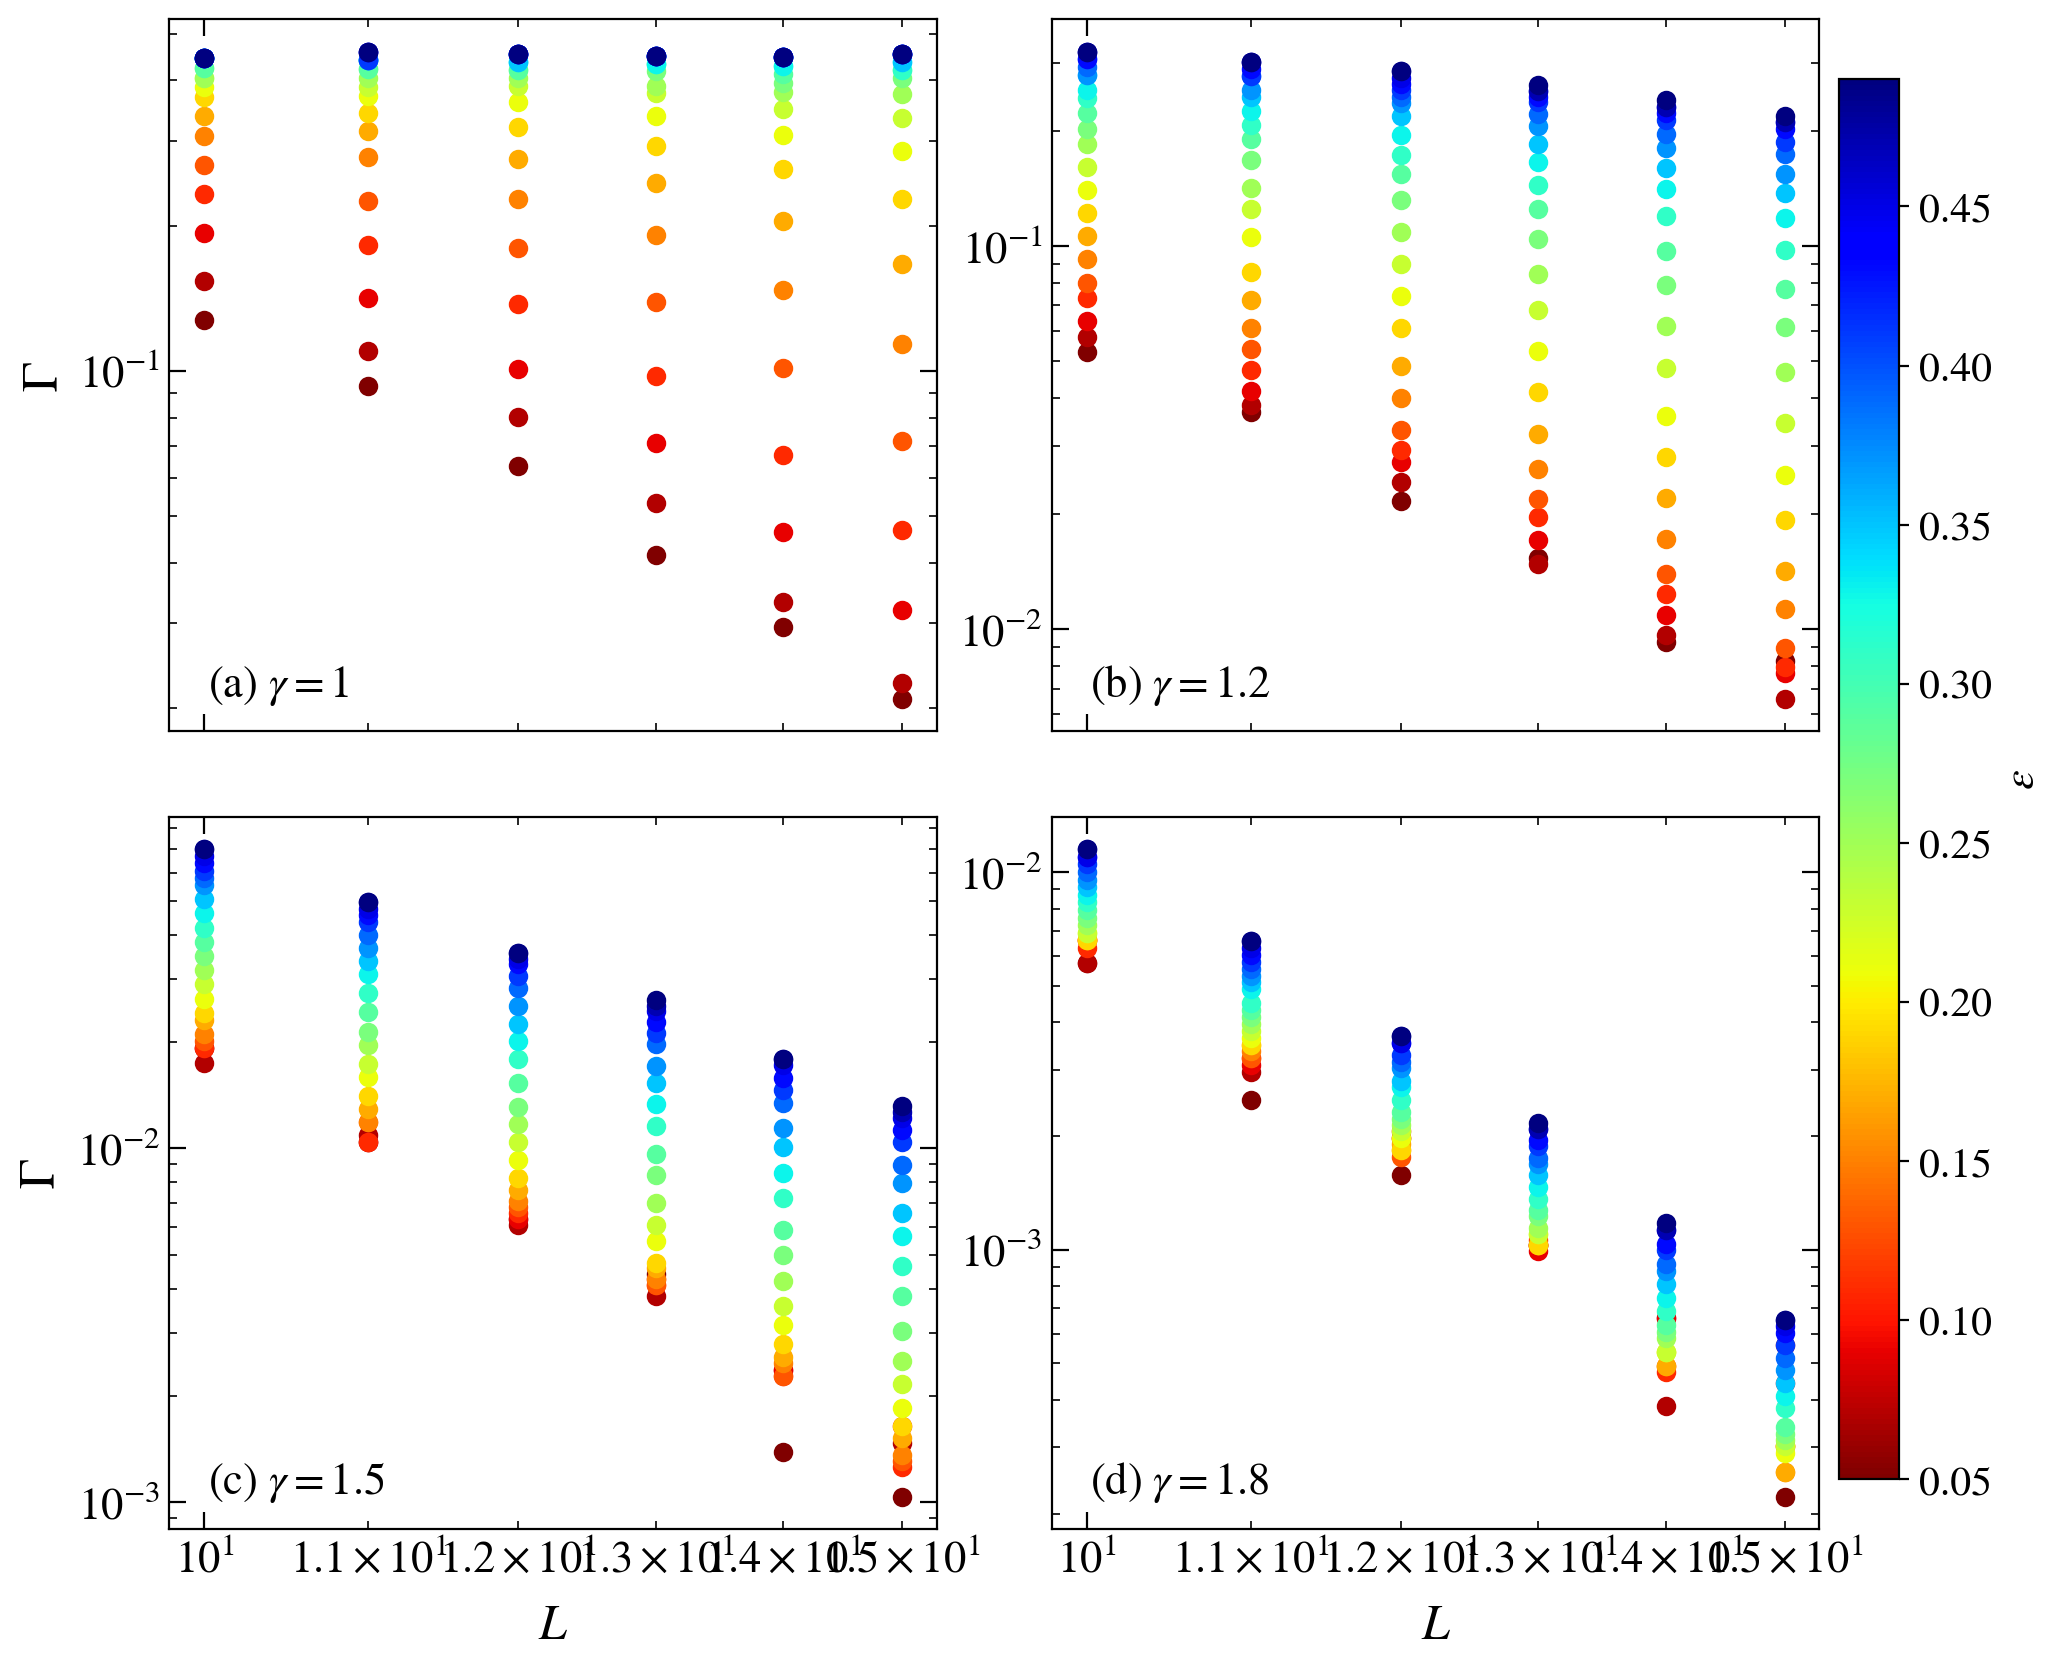

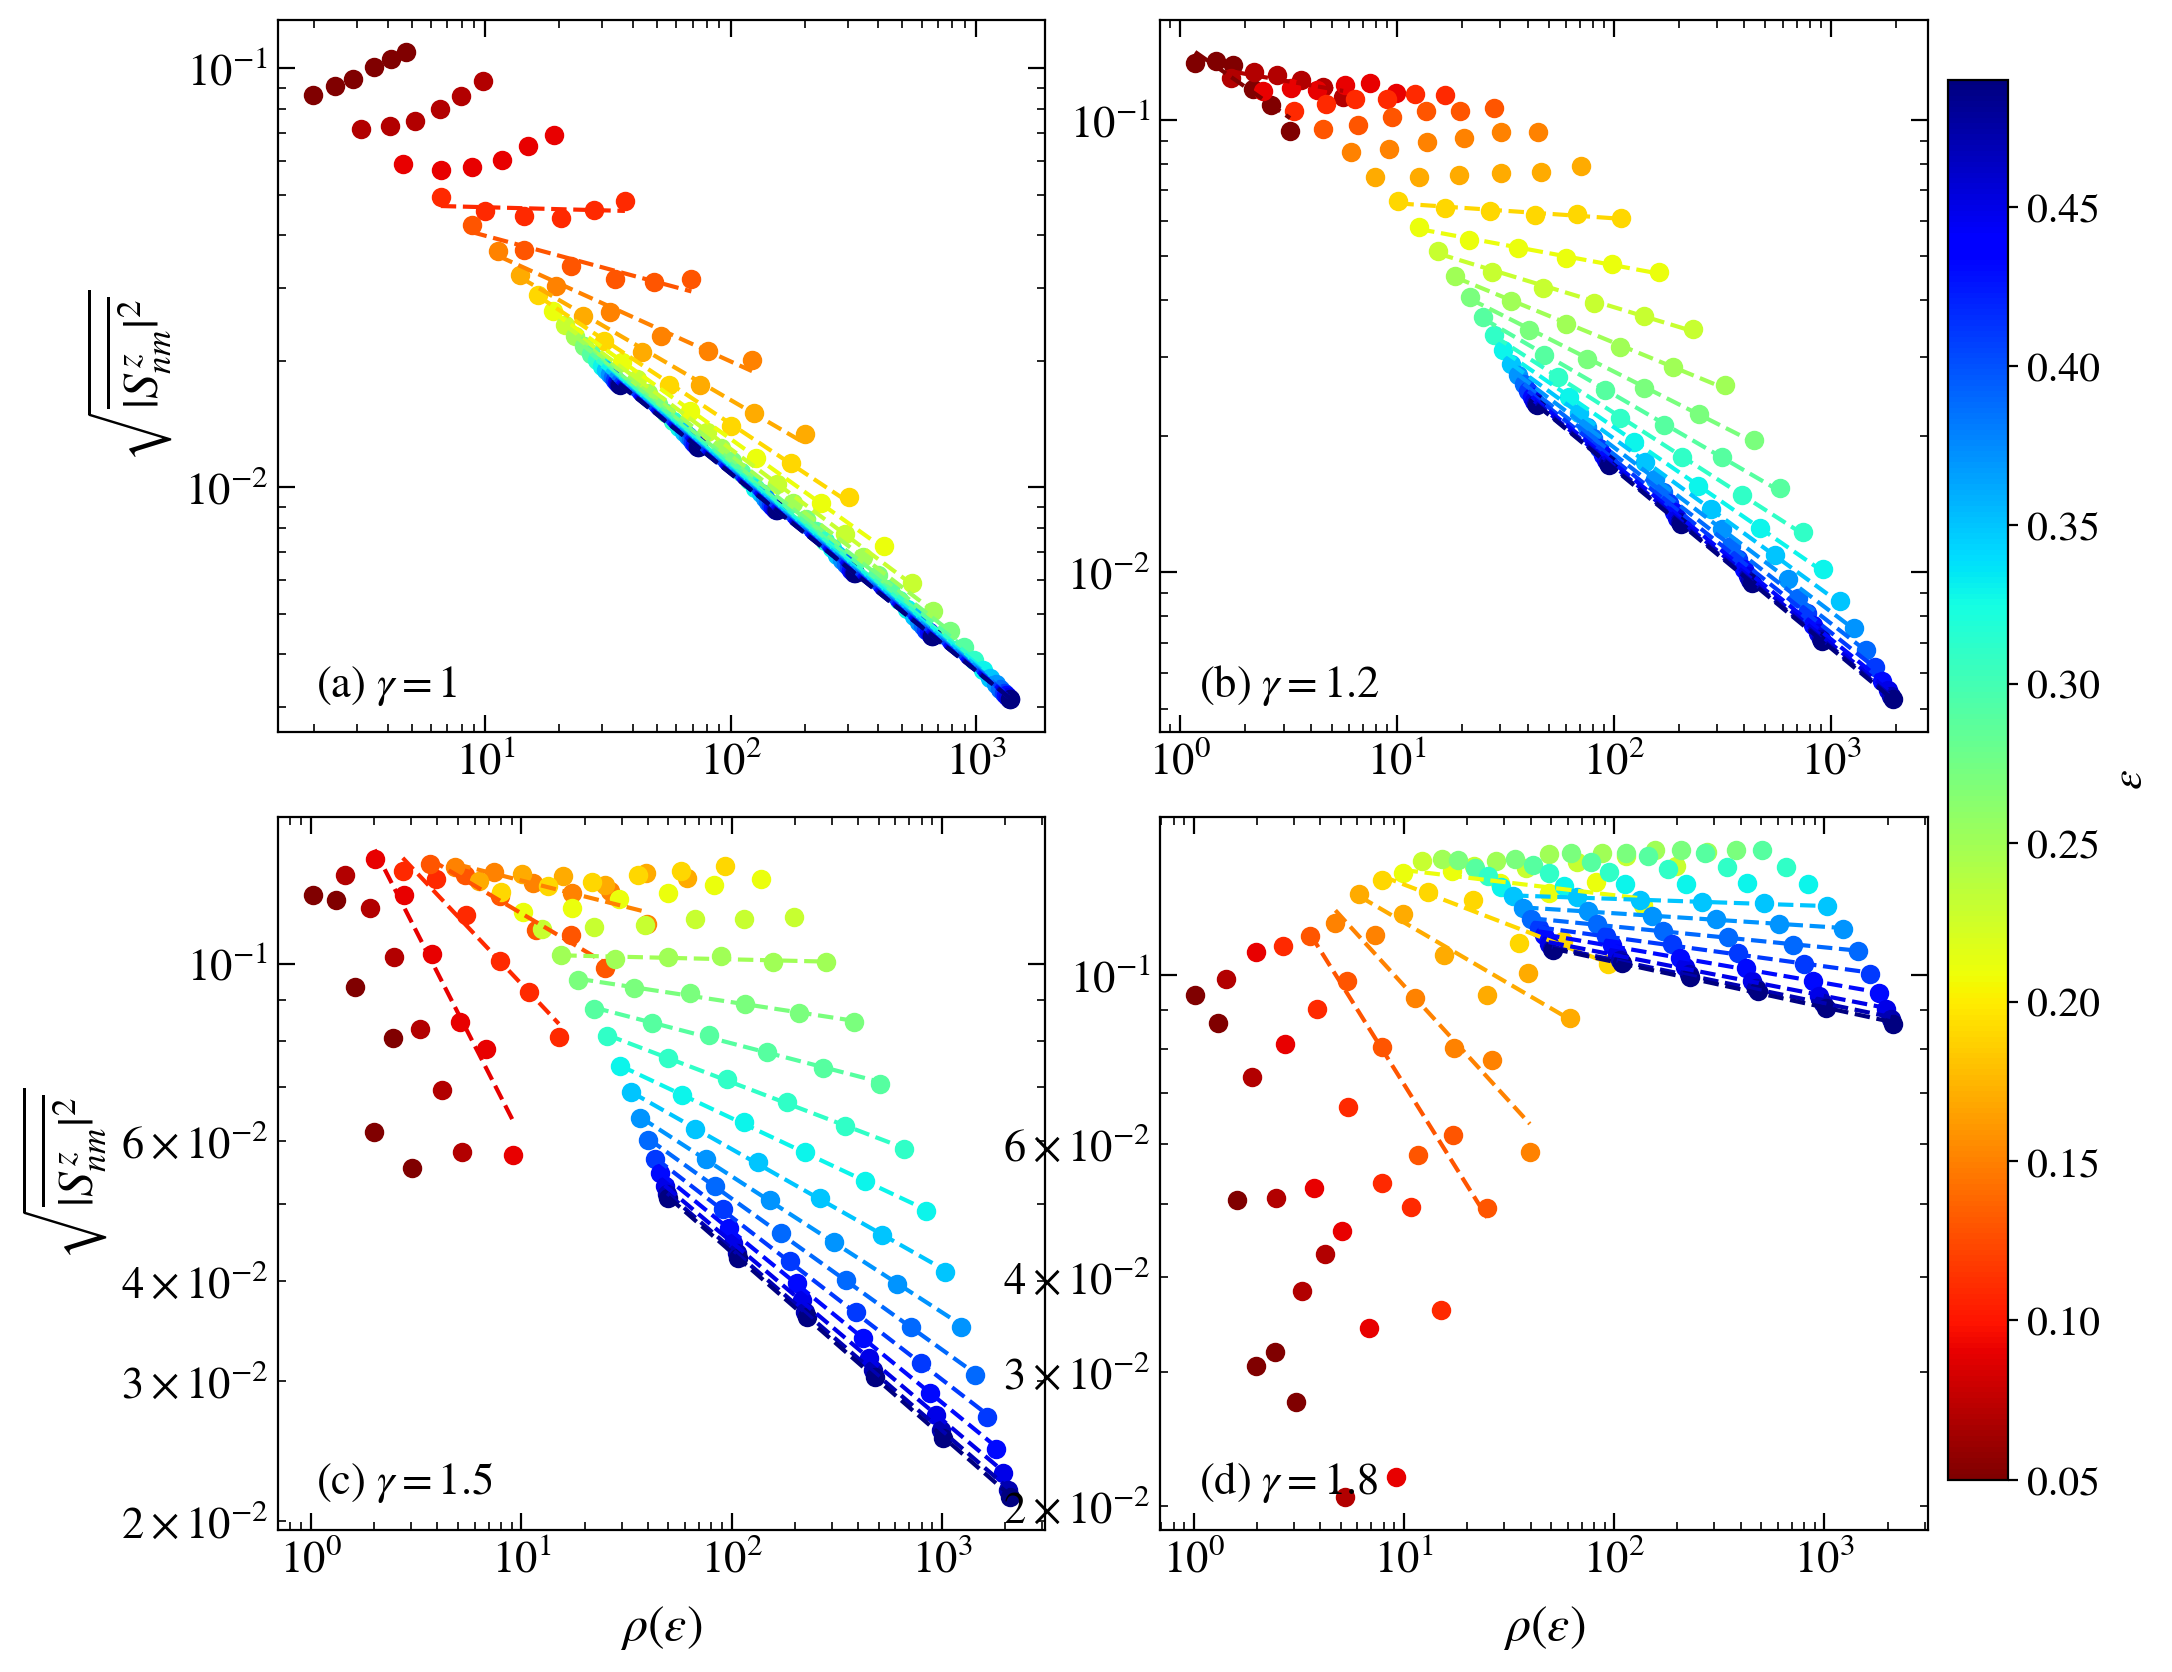

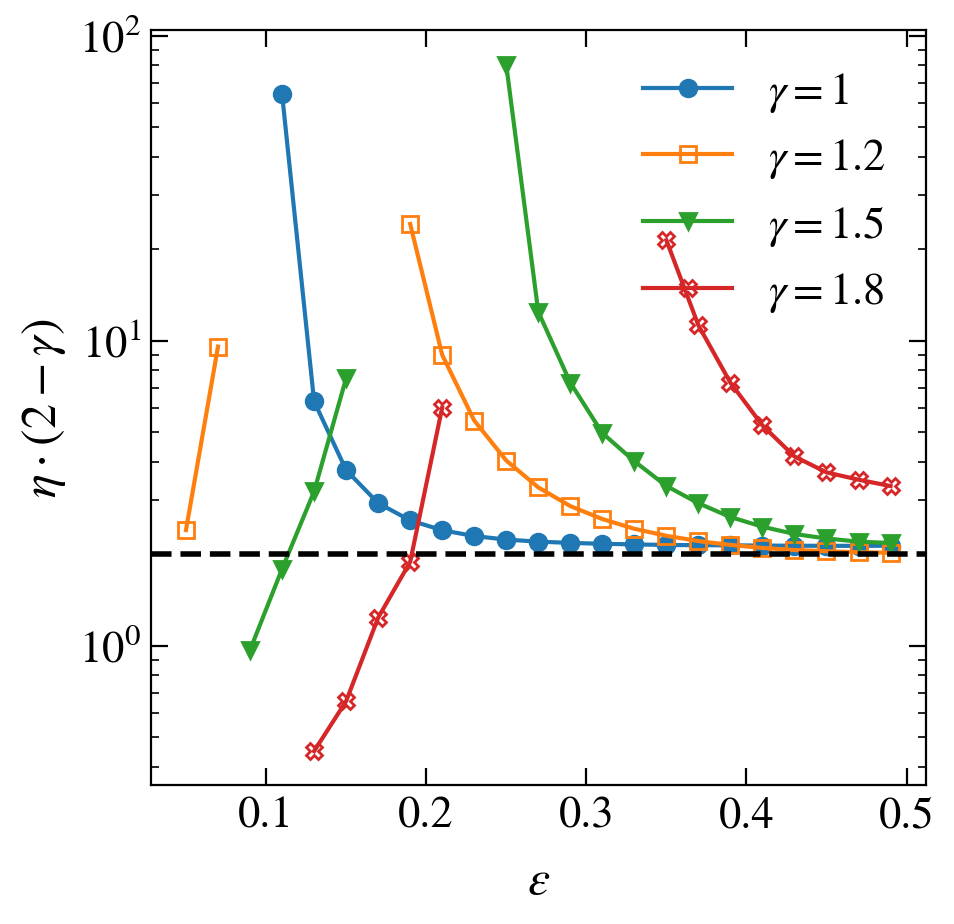

In [109]:
markers_ls2 = ['o','s','v', 'X', '+', 'X', '^', '*', '+']
markers2 = itertools.cycle(markers_ls2)
colors_ls_cyc = itertools.cycle(colors_ls)
L = 20
w = 2
J = 1
g = 1.5
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2

def lorenz(x, A, G):
    return A / ( (x / G)**2 + 1)

def eta_fit(x, alfac, A):
    return 2 * A / ( 1 - np.log(x) / np.log(alfac))

def matelem_fit(DOS, a0, eta):
    return a0 * DOS**(-1 / eta)

AGP = 1


sizes = np.arange(10, 16, 1)

Eall = np.arange(0.05, 0.95, 0.02)
E = np.arange(0.05, 0.51, 0.02)

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='jet_r', norm=matplotlib.colors.Normalize(vmin=min(E),vmax=max(E) ))
s_m.set_array([])

fig1, axis = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 200, sharex = True)
axis = np.array(axis).flatten()

fig2, axis2 = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 200)
axis2 = np.array(axis2).flatten()

fig3, axis3 = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)

omegax = np.zeros( (20 * (L)) )

a = 1.05
b = 0.45

labs = ["(a)", "(b)", "(c)", "(d)"]
_gamma_ = [1.0, 1.2, 1.5, 1.8]
for iie, gx in enumerate(_gamma_):
    # print("e* = ", 0.5 + 2 * b / a * np.sqrt( np.log(alfa / alfa_crit) ))
    colors = []
    eta_eps = []
    for eps in E:
        # if np.abs(eps - 0.5) > 1.2 * (2 * b / a * np.sqrt( np.log(alfa / alfa_crit) )):
        #     colors.append('None')
        #     eta_eps.append(np.nan)
        #     continue
        col = s_m.to_rgba(eps)
        colors.append(col)
        
        idx = min(range(len(Eall)), key=lambda i: abs(Eall[i] - eps))
        
        all_spec = []
        all_spec_typ = []
        cut = 0
        
        wH = np.zeros(sizes.shape)
        
        spec_at_wH_G = np.zeros(sizes.shape)
        
        Gamma = []
        DOS = np.zeros(sizes.shape)
        for iiL, L in enumerate(sizes):
            name = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
            if exists(name):
                with h5py.File(name, "r") as file:
                    R = np.array(file.get('realisations'))
                    
                    Ex = np.array(file.get('energy_density'))
                    idx2 = min(range(len(Ex)), key=lambda i: abs(Ex[i] - eps))
                    
                    X = np.array(file.get('wH_typ_density'))[idx2]
                    _DOS = np.array(file.get('DOS'))[idx2] / R
                    
                    print(eps, idx2, _DOS)
                    DOS[iiL] = _DOS#1/X
                    
                    wH[iiL] = X
                    cut = X / 5
                
                    R = np.array(file.get('realisations'))
                    # print(L, alfa, R)
                    omegax = np.array(file.get('omegas'))
                    omegax = np.sqrt(omegax[1:] * omegax[:-1])
                    spec_fun = np.array(file.get('spec_fun'))[idx]
                    spec_fun_typ = np.array(file.get('spec_fun_typ'))[idx]
            else:
                print(name)
            
            yy0 = spec_fun if AGP else spec_fun_typ
            
            omegax = omegax[~np.isnan(yy0)]
            yy0 = yy0[~np.isnan(yy0)]
            indices = np.where(np.logical_and(omegax >= cut, omegax < 1))[0]
            
            xx = omegax#[indices]
            yy = yy0#[indices]
            yy = integrate.cumulative_trapezoid(yy, xx)
            yy = (yy - yy[0]) / (yy[-1] - yy[0])
            G = xx[np.argmin( np.abs(yy - 0.5) )]
            # pars, pconv= fit(lorenz,
            #             xdata = xx,
            #             ydata = yy,
            #             maxfev = 20000)
            # G = np.abs(pars[-1])
            Gamma.append(G)
            
            idx_spec = min(range(len(omegax)), key=lambda i: abs(omegax[i] - np.sqrt(wH[iiL] * G)))
            idx_spec1 = min(range(len(omegax)), key=lambda i: abs(omegax[i] - wH[iiL]))
            idx_spec2 = min(range(len(omegax)), key=lambda i: abs(omegax[i] - G))
            # if idx_spec2 < idx_spec1: idx_spec2 = idx_spec1 + 10
            spec_at_wH_G[iiL] = np.sqrt( np.mean(yy0[idx_spec - 20 : idx_spec + 20]) )
            # spec_at_wH_G[iiL] = np.sqrt( np.mean(yy0[idx_spec1 : idx_spec2]) )
            # spec_at_wH_G[iiL] = np.sqrt( yy0[idx_spec] )
            # print(eps, alfa, L, G, spec_at_wH_G[iiL])
            
        axis[iie].scatter(sizes, Gamma, color = col)
        axis2[iie].scatter(DOS, spec_at_wH_G, color = col)
        
        DOS = DOS[~np.isnan(spec_at_wH_G)]
        spec_at_wH_G = spec_at_wH_G[~np.isnan(spec_at_wH_G)]
        pars, pconv= fit(matelem_fit,
                    xdata = DOS,
                    ydata = spec_at_wH_G,
                    maxfev = 20000)
        _etaX = np.abs(pars[-1])
        if _etaX > 1e5 or _etaX < 1.9: 
            _etaX = np.nan
        else:
            zz = np.linspace(min(DOS), max(DOS), 5000)
            axis2[iie].plot(zz, matelem_fit(zz, *pars), ls='--', color=col)
        eta_eps.append(_etaX)
    
    eta_eps = np.array(eta_eps)
    mar = next(markers2)
    col = next(colors_ls_cyc) # 
    axis3.plot(E, eta_eps * (2 - gx), color=col, marker=mar, markerfacecolor='None' if iie %2 else col, label=r"$\gamma=%g$"%gx)
    # axis3.scatter(np.nan, np.nan, color='k', marker=mar, facecolor='None' if iie %2 else 'k')
    
    # print(len(Gamma))
    # axis[iie].scatter(alfa_vals, Gamma, color=colors)
    lab = r"$\Gamma$" if AGP else r"$\Gamma_{\rm typ}$"
    fig_help.set_plot_elements(axis[iie], ylabel=lab if iie%2 == 0 else "", xlabel=r"$L$" if iie>1 else "", font_size=16, set_legend=False, xscale='log', yscale='log')
    axis[iie].annotate(labs[iie] + r" $\gamma=%g$"%gx,     fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    
    lab = r"$\sqrt{\overline{|S^z_{nm}|^2}}$" if AGP else r"$\sqrt{\overline{|S^z_{nm}|^2}^{\rm typ}}$"
    fig_help.set_plot_elements(axis2[iie], ylabel=lab if iie%2 == 0 else "", xlabel=r"$\rho(\epsilon)$" if iie>1 else "", font_size=16, set_legend=False, xscale='log', yscale='log')
    axis2[iie].annotate(labs[iie] + r" $\gamma=%g$"%gx,     fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')

axis3.axhline(y=2, ls='--', lw=2, color='k')
fig_help.set_plot_elements(axis3, ylabel=r"$\eta\cdot(2-\gamma)$", xlabel=r"$\epsilon$", font_size=16, set_legend=True, xscale='linear', yscale='log')

for fig in [fig1, fig2]:
    fig.subplots_adjust(right=0.95)
    cbar_ax = fig.add_axes([0.96, 0.15, 0.03, 0.7])
    # fig.colorbar(im, cax=cbar_ax)
    cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
    cbar.set_label(r"$\epsilon$", fontsize=16)
    cbar.ax.tick_params(labelsize=15)

    fig.subplots_adjust(wspace = 0.15, hspace=0.12)


[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3]
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 5000
12 1.0 5000
13 1.0 3000
14 1.0 2000
15 1.0 781
10 1.0 5000
11 1.0 

Text(0.5, 1.0, '$\\eta(\\epsilon)$')

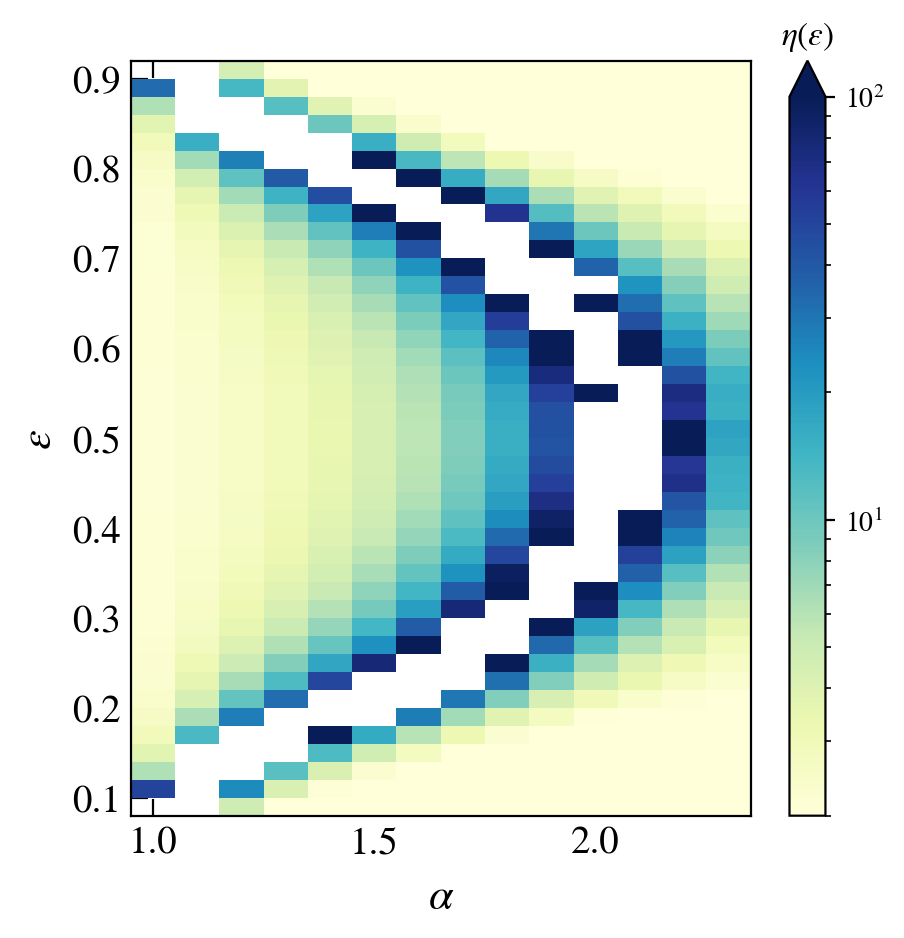

In [110]:
markers_ls2 = ['o','s','v', 'X', '+', 'X', '^', '*', '+']
markers2 = itertools.cycle(markers_ls2)
colors_ls_cyc = itertools.cycle(colors_ls)
L = 20
w = 2
J = 1
g = 1.5
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2

def lorenz(x, A, G):
    return A / ( (x / G)**2 + 1)

def eta_fit(x, alfac, A):
    return 2 * A / ( 1 - np.log(x) / np.log(alfac))

def matelem_fit(DOS, a0, eta):
    return a0 * DOS**(-1 / eta)

AGP = 1

gamma_vals = np.arange(1.0, 2.4, 0.1)
print(gamma_vals)

sizes = np.arange(10, 16, 1)

Eall = np.arange(0.05, 0.95, 0.02)
E = np.arange(0.09, 0.92, 0.02)

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='jet_r', norm=matplotlib.colors.Normalize(vmin=min(E),vmax=max(E) ))
s_m.set_array([])

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)

omegax = np.zeros( (20 * (L)) )

a = 1.05
b = 0.45

eta_eps_alfa = []
for iie, gx in enumerate(gamma_vals):
    # print("e* = ", 0.5 - 2 * b / a * np.sqrt( np.log(alfa / alfa_crit) ))
    colors = []
    eta_eps = []
    for eps in E:
        # if np.abs(eps - 0.5) > 1.2 * (2 * b / a * np.sqrt( np.log(alfa / alfa_crit) )):
        #     colors.append('None')
        #     eta_eps.append(np.nan)
        #     continue
        col = s_m.to_rgba(eps)
        colors.append(col)
        
        idx = min(range(len(Eall)), key=lambda i: abs(Eall[i] - eps))
        
        all_spec = []
        all_spec_typ = []
        cut = 0
        
        wH = np.zeros(sizes.shape)
        
        spec_at_wH_G = np.zeros(sizes.shape)
        
        Gamma = []
        DOS = np.zeros(sizes.shape)
        for iiL, L in enumerate(sizes):
            name = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
            if exists(name):
                with h5py.File(name, "r") as file:
                    R = np.array(file.get('realisations'))
                    
                    Ex = np.array(file.get('energy_density'))
                    idx2 = min(range(len(Ex)), key=lambda i: abs(Ex[i] - eps))
                    X = np.array(file.get('wH_typ_density'))[idx2]
                    _DOS = np.array(file.get('DOS'))[idx2] / R
                    
                    DOS[iiL] = _DOS#1 / X
                    
                    wH[iiL] = X
                    cut = X / 5
                    R = np.array(file.get('realisations'))
                    print(L, gx, R)
                    omegax = np.array(file.get('omegas'))
                    omegax = np.sqrt(omegax[1:] * omegax[:-1])
                    spec_fun = np.array(file.get('spec_fun'))[idx]
                    spec_fun_typ = np.array(file.get('spec_fun_typ'))[idx]
            else:
                print(name)
            
            yy0 = spec_fun if AGP else spec_fun_typ
            
            omegax = omegax[~np.isnan(yy0)]
            yy0 = yy0[~np.isnan(yy0)]
            indices = np.where(np.logical_and(omegax >= cut, omegax < 0.5))[0]
            
            xx = omegax[indices]
            yy = yy0[indices]
            yy = integrate.cumulative_trapezoid(yy, xx)
            yy = (yy - yy[0]) / (yy[-1] - yy[0])
            G = xx[np.argmin( np.abs(yy - 0.5) )]
            
            # pars, pconv= fit(lorenz,
            #             xdata = xx,
            #             ydata = yy,
            #             maxfev = 20000)
            # G = np.abs(pars[-1])
            Gamma.append(G)
            
            idx_spec = min(range(len(omegax)), key=lambda i: abs(omegax[i] - np.sqrt(wH[iiL] * G)))
            
            spec_at_wH_G[iiL] = np.sqrt( np.mean(yy0[idx_spec - 5 : idx_spec + 5]) )
        
        DOS = DOS[~np.isnan(spec_at_wH_G)]
        spec_at_wH_G = spec_at_wH_G[~np.isnan(spec_at_wH_G)]
        pars, pconv= fit(matelem_fit,
                    xdata = DOS,
                    ydata = spec_at_wH_G,
                    maxfev = 20000)
        _etaX = np.abs(pars[-1])
        if _etaX > 1e7: _etaX = np.nan
        eta_eps.append(_etaX)
    
    mar = next(markers2)
    col = next(colors_ls_cyc)
    eta_eps_alfa.append(np.array(eta_eps))

eta_eps_alfa = np.transpose(np.array(eta_eps_alfa))

#white = plt.get_cmap('seismic', 100)(0.5*np.ones(1))
upper = plt.get_cmap('YlGnBu', 100)(np.linspace(0.0, 1.0, 100))
colors = np.vstack((upper))  

mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

X, Y = np.meshgrid(gamma_vals, E)

p = axis.pcolormesh(X, Y, eta_eps_alfa, shading='nearest', cmap=mymap, norm=matplotlib.colors.LogNorm(vmin=2, vmax=1e2))
fig_help.set_plot_elements(axis, ylabel=r"$\epsilon$", xlabel=r"$\alpha$", font_size=14, set_legend=False)
clb = fig.colorbar(p, extend='max')
clb.ax.set_title(r"$\eta(\epsilon)$")
# axis.axhline(y=2, ls='--', lw=2, color='k')
# alfac = ag_crit#1 / np.sqrt(2)
# x = np.linspace(0.09, 0.91, 1000)
# axis.plot(alfac * np.exp(a**2 * (x - 0.5)**2 / 4 / b*2), x, color='red', ls='--', lw=2)

# for fig in [fig1, fig2]:
#     fig.subplots_adjust(right=0.95)
#     cbar_ax = fig.add_axes([0.96, 0.15, 0.03, 0.7])
#     # fig.colorbar(im, cax=cbar_ax)
#     cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
#     cbar.set_label(r"$\epsilon$", fontsize=16)
#     cbar.ax.tick_params(labelsize=15)

#     fig.subplots_adjust(wspace = 0.15, hspace=0.12)
# fig.savefig("plots_AGP/FigS5.pdf", bbox_inches = 'tight', pad_inches=0.02)

### Varying alfa

0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49
0.5 0.49


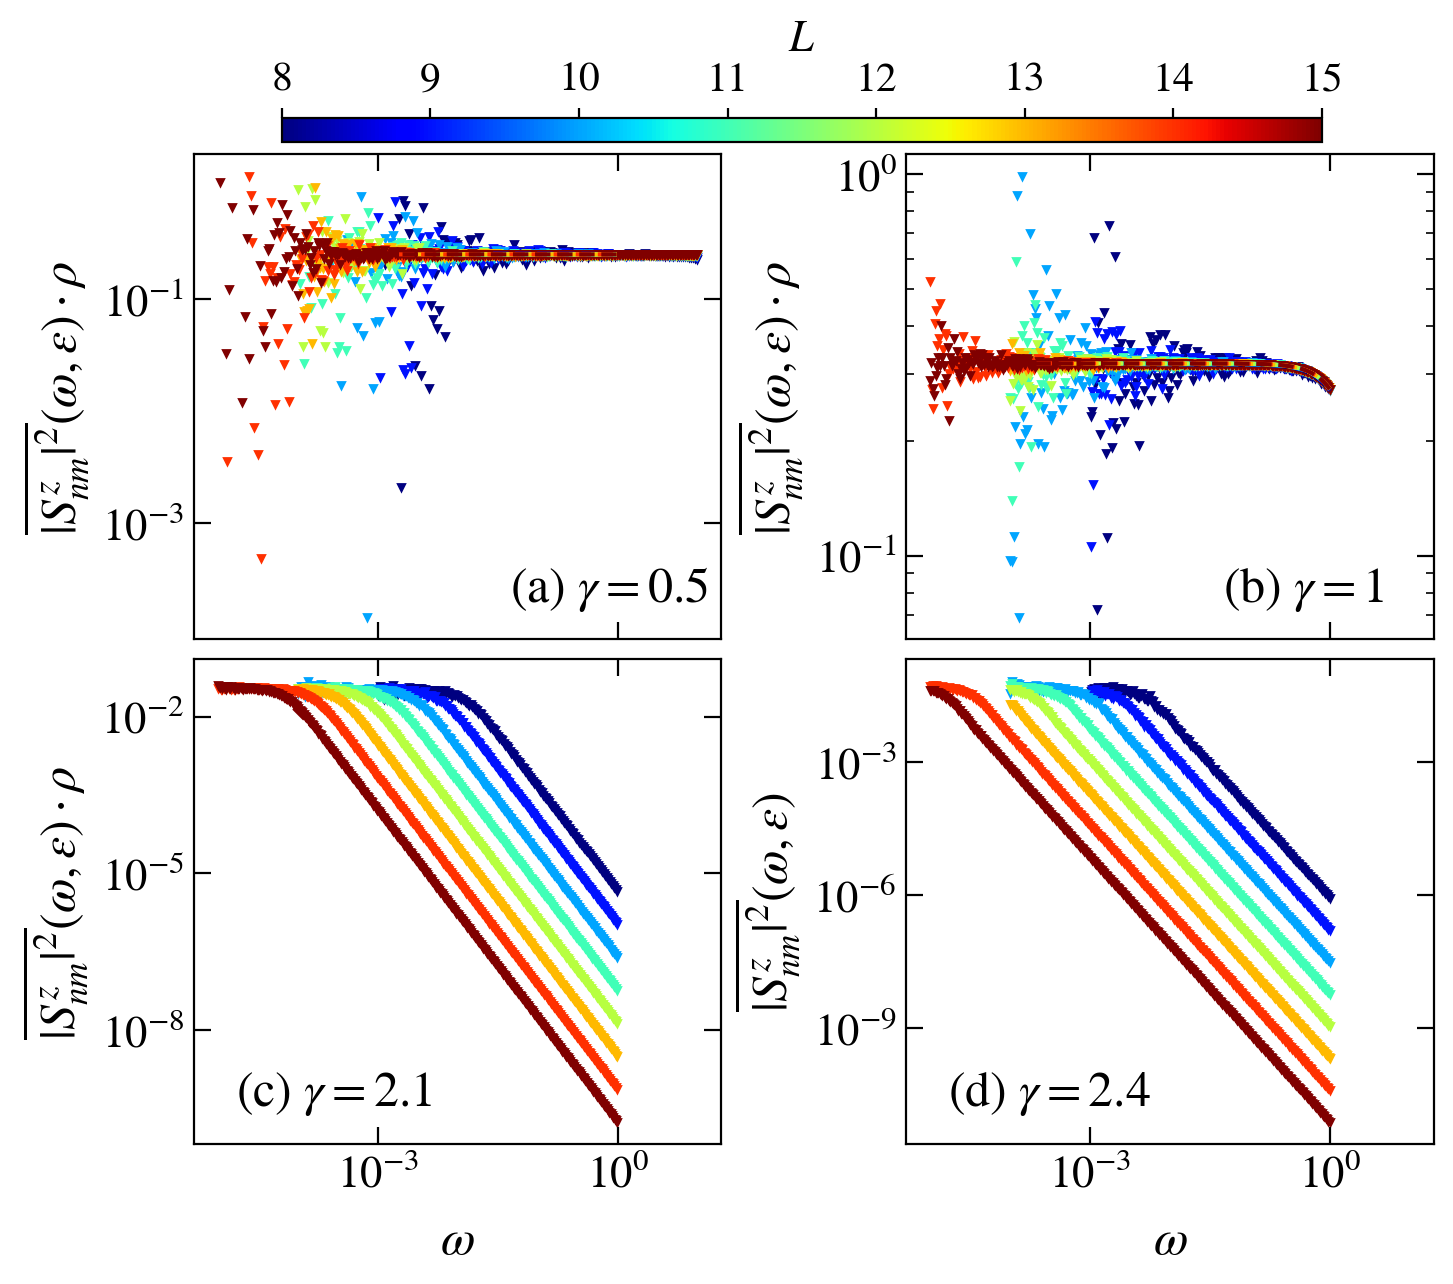

In [58]:
markers = itertools.cycle(markers_ls)
colors_ls_cyc = itertools.cycle(colors_ls)
L = 20
w = 2
J = 1
g = 1

op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2

def lorenz(x, A, G1):
    return A / ( (x / G1)**2 + 1)

def arctan(x, G):
    return 2 / np.pi * np.arctan(x / G)

AGP = 1

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='jet', norm=matplotlib.colors.Normalize(vmin=min(sizes),vmax=max(sizes) ))
s_m.set_array([])

fig, axis = plt.subplots( nrows=2, ncols=2, figsize=(8,6), dpi = 200, sharex = True)
axis = np.array(axis).flatten()

E = np.arange(0.05, 0.95, 0.02)
omegax = np.zeros( (20 * (L)) )

labs = ["(a)", "(b)", "(c)", "(d)"]
gx_list = [0.5, 1.0, 2.1, 2.4]
upper_cut = 1

eps = 0.5

for iie, gx in enumerate(gx_list):
    cut = 0
    wH = np.zeros(sizes.shape)
    spec_at_wH = np.zeros(sizes.shape)
    eta_inv = (2 - gx) if gx > 1 else 1
    for iiL, L in enumerate(sizes):
        col = s_m.to_rgba(L)
        dim = 2**(L)
        name = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
        if exists(name):
            with h5py.File(name, "r") as file:
                R = np.array(file.get('realisations'))
                
                Ex = np.array(file.get('energy_density'))
                idx2 = min(range(len(Ex)), key=lambda i: abs(Ex[i] - eps))
                print(eps, Ex[idx2])
                DOS = np.array(file.get('DOS'))
                DOS = DOS / max(DOS) * dim
                
                X = np.array(file.get('wH_typ_density'))[idx2]
                wH[iiL] = X
                cut = X
                omegax = np.array(file.get('omegas'))
                omegax = np.sqrt(omegax[1:] * omegax[:-1])
                
                spec_fun = np.array(file.get('spec_fun'))[idx] * (DOS[idx2] if gx < 2 else 1.0)
                spec_fun_typ = np.array(file.get('spec_fun_typ'))[idx] * (DOS[idx2] if gx < 2 else 1.0)
                # print(L, g, spec_fun.shape)
                
                wH_idx = min(range(len(omegax)), key=lambda i: abs(omegax[i] - wH[iiL]))
                spec_at_wH[iiL] = spec_fun[wH_idx]
        else:
            print(name)

        yy0 = spec_fun if AGP else spec_fun_typ
        
        
        omegax = omegax[~np.isnan(yy0)]
        yy0 = yy0[~np.isnan(yy0)]
        
        axis[iie].plot(omegax, yy0, color=col, marker='v', markersize=2, lw=0,zorder=0)
        # axis[0][iie].axvline(x=upper_cut, ls=':', color='gray')
        indices = np.where(np.logical_and(omegax >= cut, omegax < upper_cut))[0]
        xx = omegax[indices]
        yy = yy0[indices]
        pars, pconv= fit(lorenz,
                    xdata = xx,
                    ydata = yy,
                    maxfev = 20000)
        z = np.linspace(min(xx), max(xx), 5000)
        axis[iie].plot(z, lorenz(z, *pars), ls='--', color=col)
    
    ylab = r"$\overline{|S^z_{nm}|^2}(\omega,\epsilon)\cdot\rho$" if AGP else r"$\overline{|S^z_{nm}|^2}^{\rm typ}(\omega,\epsilon)\cdot\rho$"
    ylab2 = r"$\overline{|S^z_{nm}|^2}(\omega,\epsilon)$" if AGP else r"$\overline{|S^z_{nm}|^2}^{\rm typ}(\omega,\epsilon)$"
    if iie == 3: ylab = ylab2
    fig_help.set_plot_elements(axis[iie], ylabel=ylab, xlabel=r"$\omega$" if iie > 1 else "", font_size=16, set_legend=False, xscale='log', yscale='log')
    
    axis[iie].annotate(labs[iie] + r" $\gamma=%g$"%gx, fontsize=18, xy=(0.6, 0.08) if iie < 2 else (0.08, 0.08), xycoords='axes fraction')
    # axis[0][iie].set_ylim(2e-4, None)
    # axis[0][iie].set_xlim(0.2*min(omegax), max(omegax))
    

fig.subplots_adjust(top=0.95)
cbar_ax = fig.add_axes([0.18, 0.96, 0.65, 0.02])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation='horizontal')
cbar.set_label(r"$L$", fontsize=16)
cbar.ax.tick_params(labelsize=15)
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position('top')

fig.subplots_adjust(wspace = 0.35, hspace=0.04)
fig.savefig("PLOTS_FADING/Fig_spectral.pdf", bbox_inches = 'tight', pad_inches=0.02)

### Exponent $\eta$

0.25 10 887.5536104357222
0.25 10 1775.5503393164402
0.25 10 3549.8341249262385
0.25 10 7098.090156758877
0.25 10 14195.106532574084
0.25 10 28384.945414804333
0.25 10 884.7064612356613
0.25 10 1770.8116910550373
0.25 10 3547.4785073543394
0.25 10 7095.477955408532
0.25 10 14188.927762819398
0.25 10 28380.21459482306
0.25 10 879.1641881731048
0.25 10 1761.1615103532279
0.25 10 3531.8195403790232
0.25 10 7073.771394527154
0.25 10 14160.226408954522
0.25 10 28342.62221807749
0.25 10 853.9359777012342
0.25 10 1713.3059551218669
0.25 10 3437.9243674984264
0.25 10 6902.901790769137
0.25 10 13851.501121282221
0.25 10 27803.26641609488
0.25 10 791.0889968057755
0.25 10 1567.5270253492968
0.25 10 3108.7045753105876
0.25 10 6175.625067279839
0.25 10 12271.522114646117
0.25 10 24435.778483953905
0.25 10 675.8912805255418
0.25 10 1284.3876900195144
0.25 10 2429.927166600584
0.25 10 4575.480205583241
0.25 10 8553.268323375918
0.25 10 15939.42918988359
0.25 10 537.188133068024
0.25 10 952.412965186

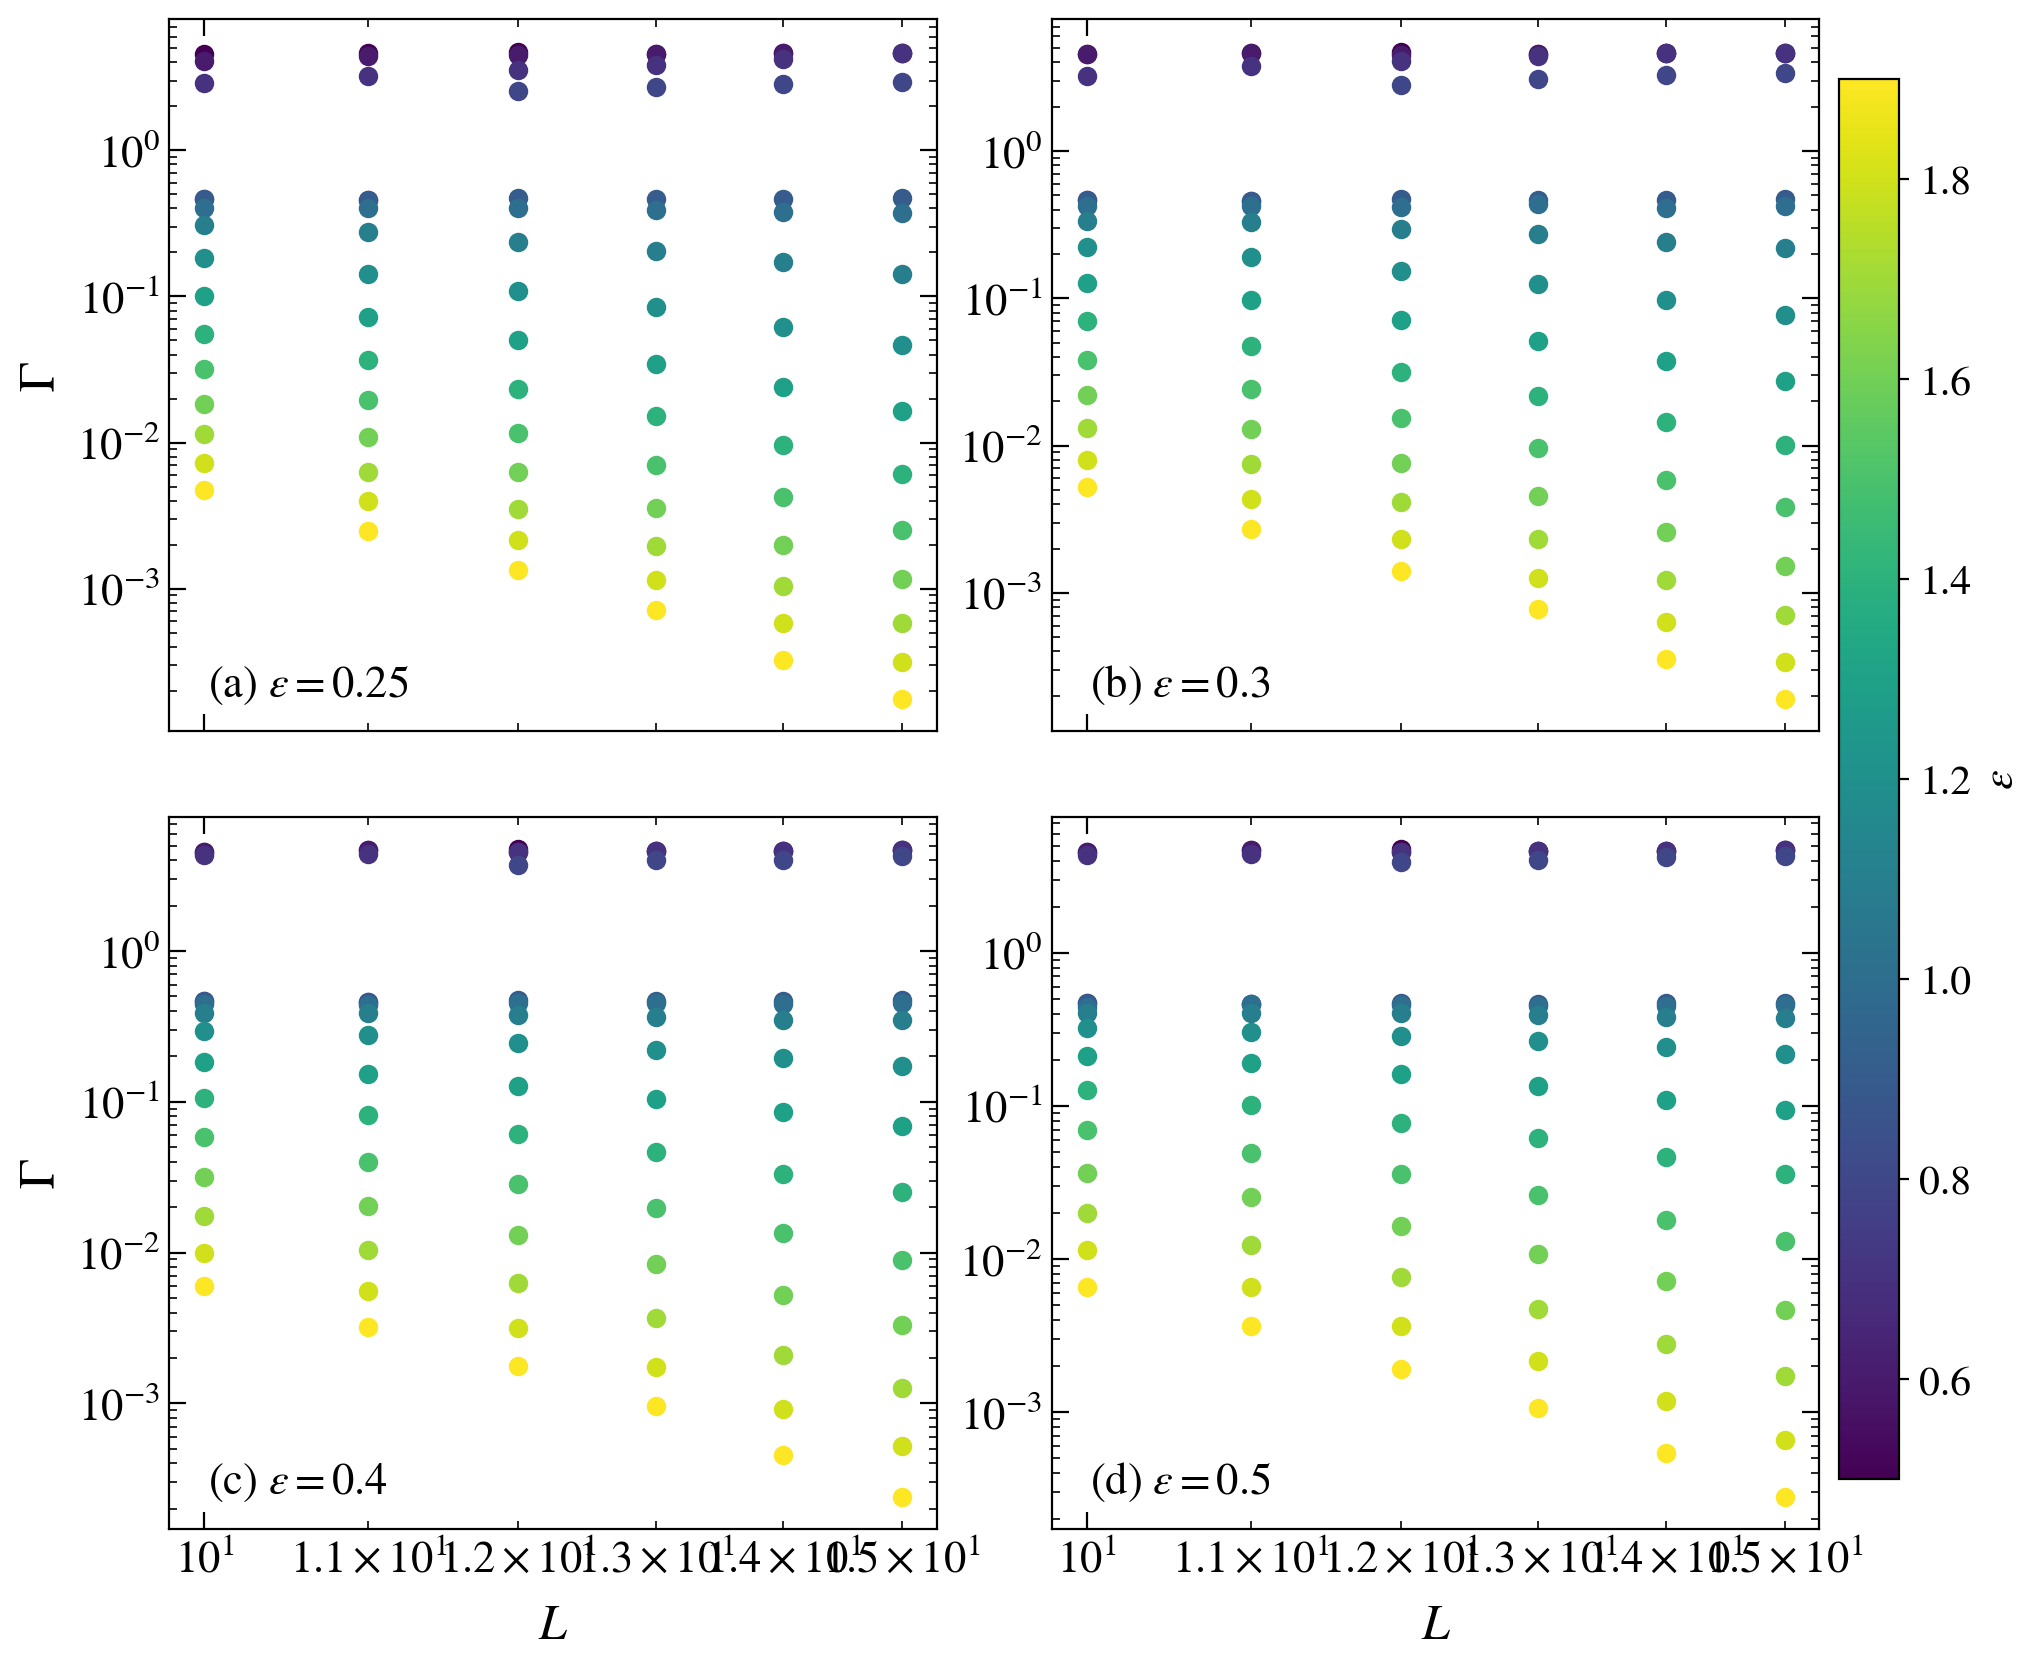

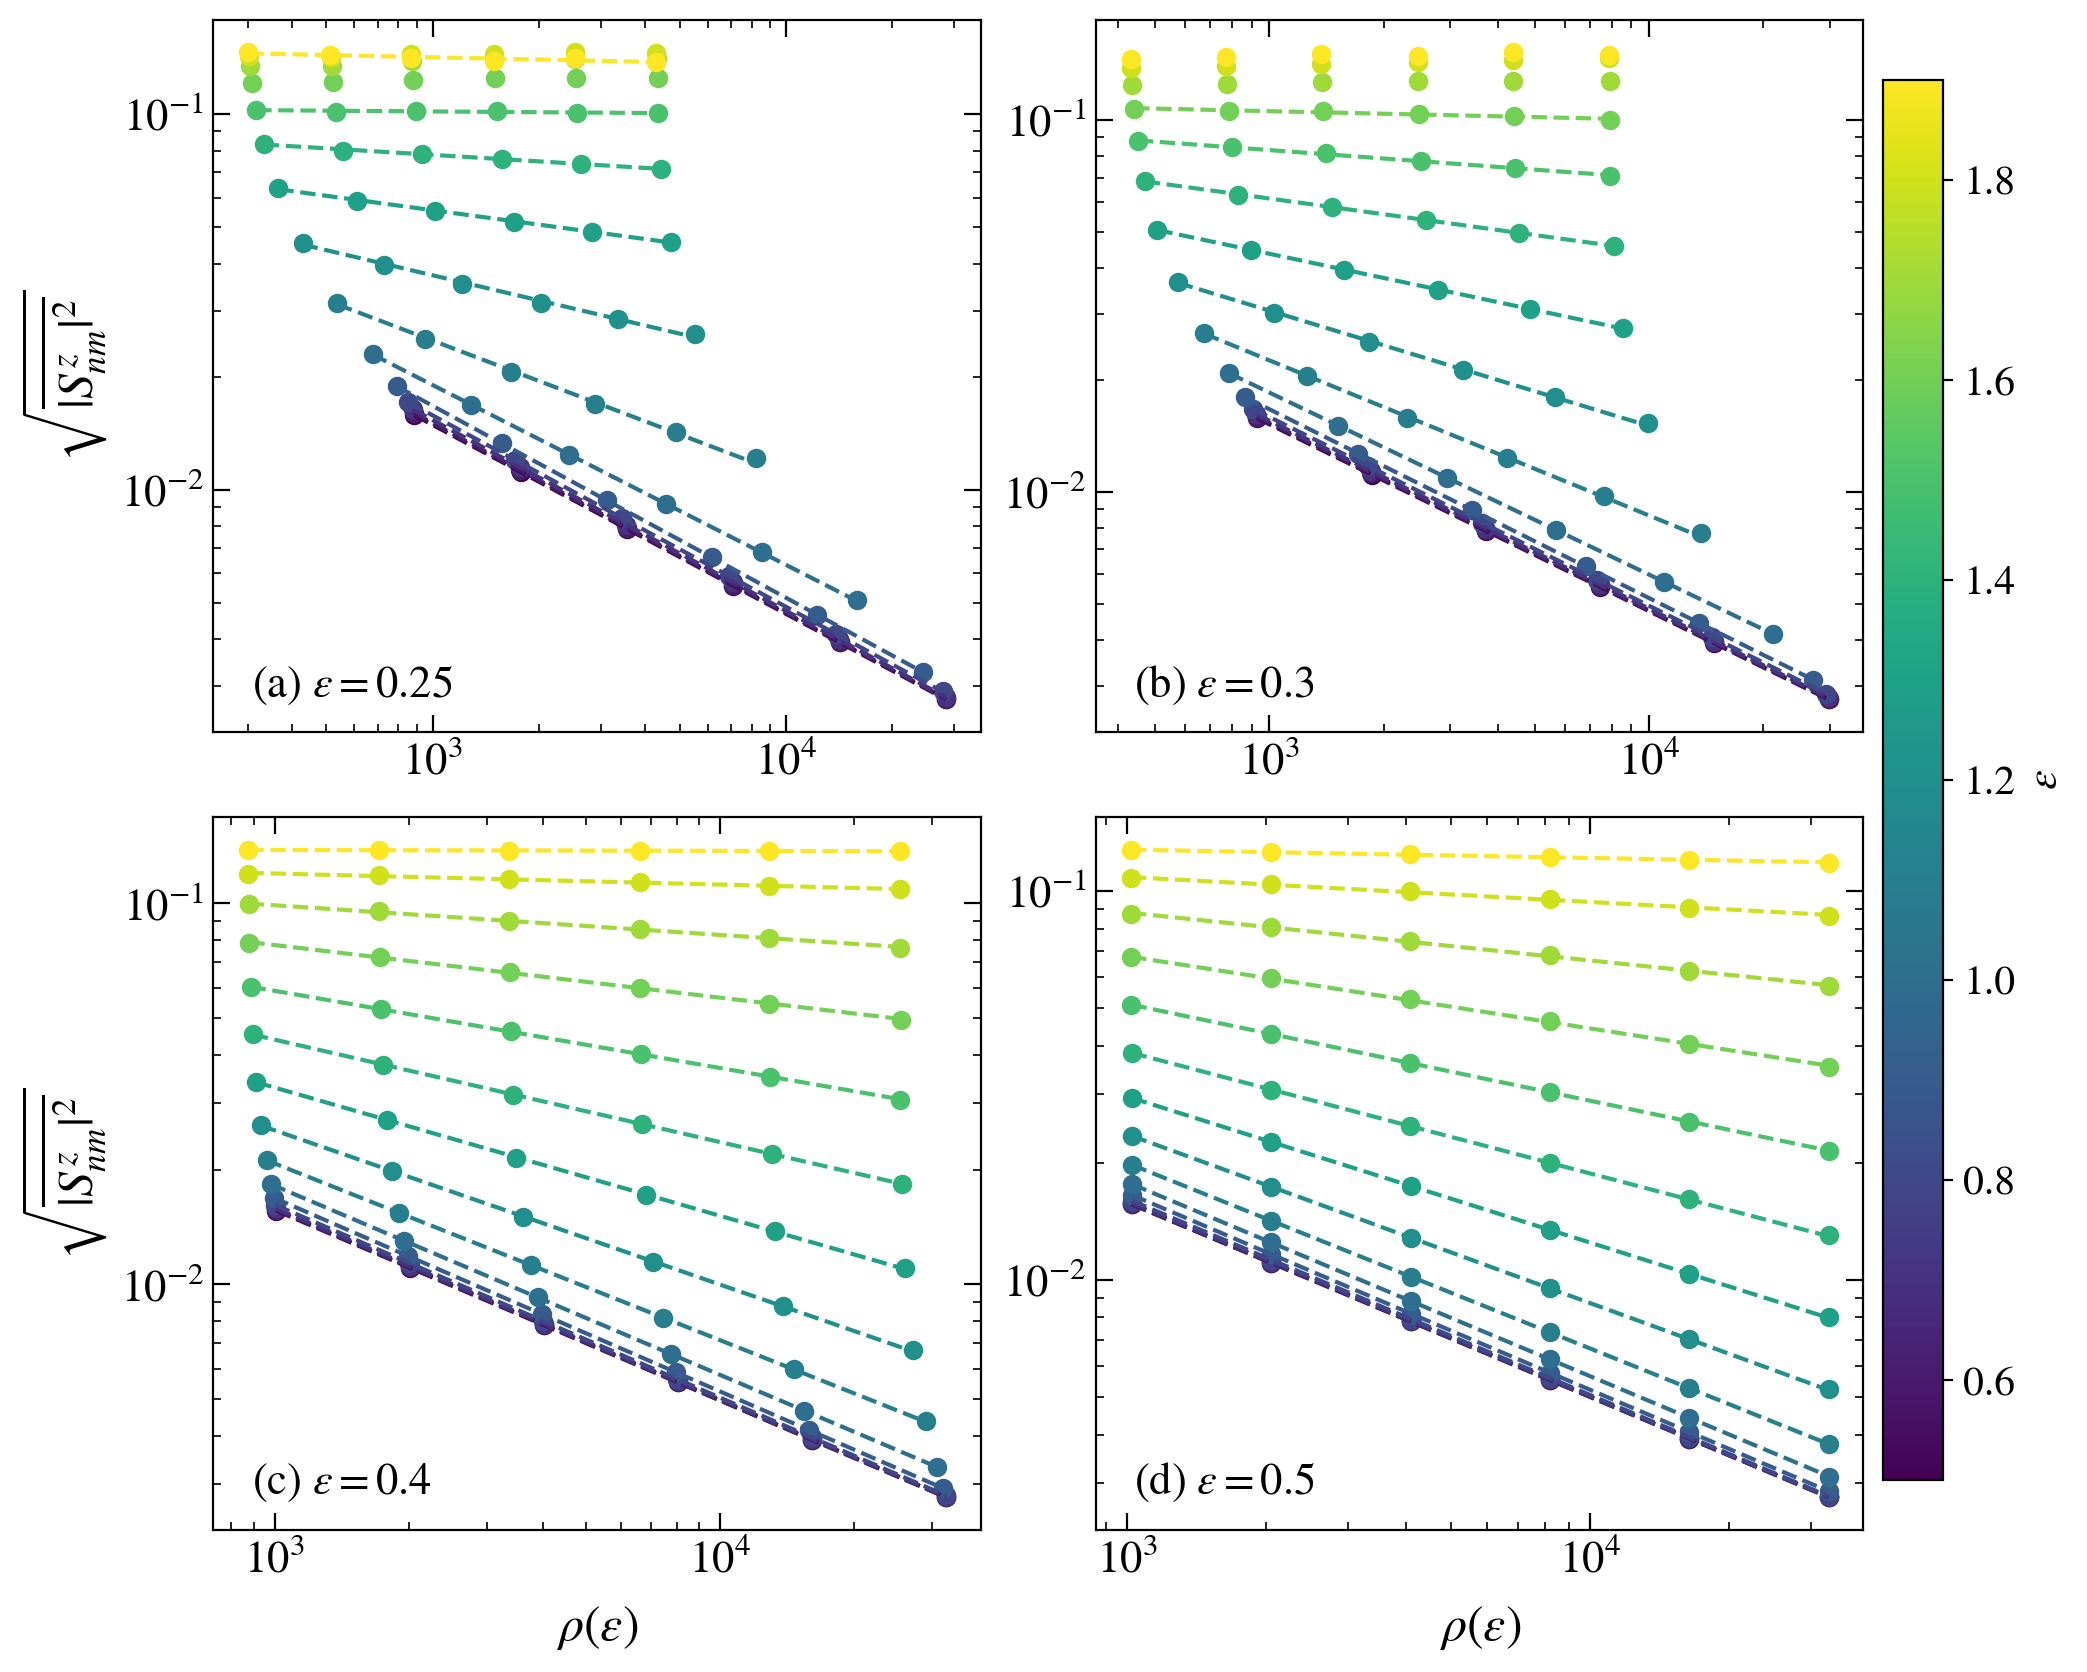

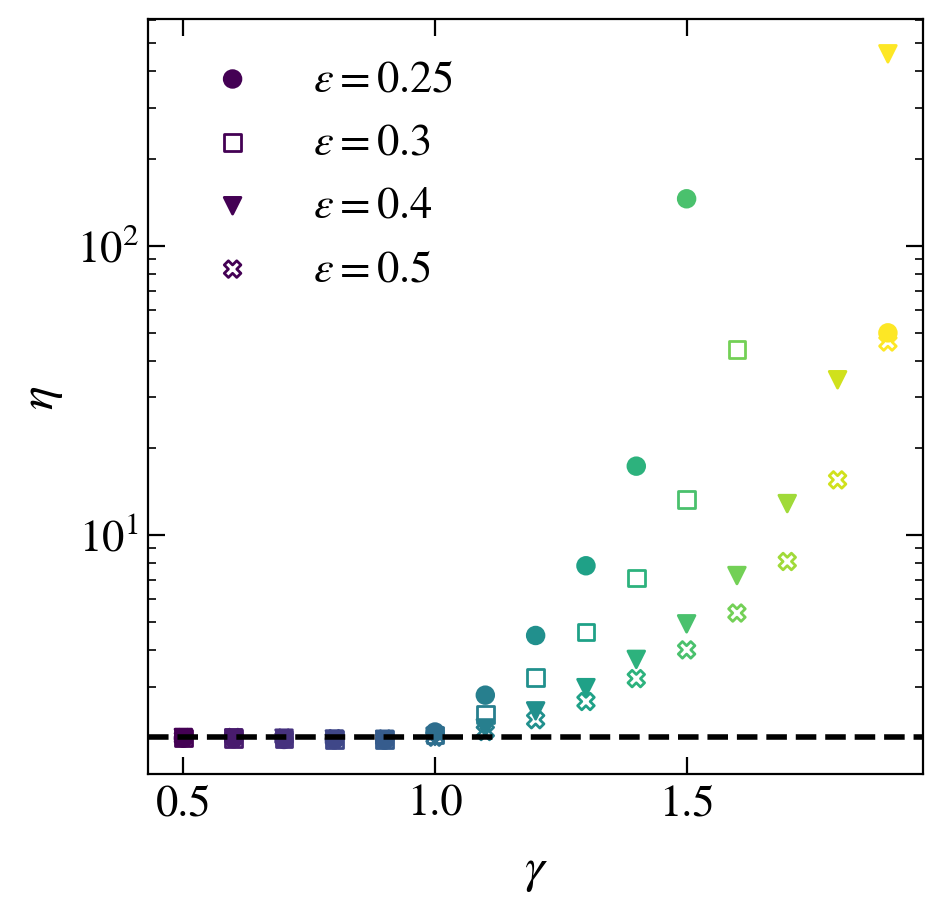

In [26]:
markers_ls2 = ['o','s','v', 'X', '+', 'X', '^', '*', '+']
markers2 = itertools.cycle(markers_ls2)
colors_ls_cyc = itertools.cycle(colors_ls)
L = 20
w = 2
J = 1
g = 1.5
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2

def lorenz(x, A, G):
    return A / ( (x / G)**2 + 1)

def eta_fit(x, alfac, A):
    return 2 * A / ( 1 - np.log(x) / np.log(alfac))

def matelem_fit(DOS, a0, eta):
    return a0 * DOS**(-1 / eta)

AGP = 1


sizes = np.arange(10, 16, 1)

Eall = np.arange(0.05, 0.95, 0.02)
E = np.arange(0.05, 0.51, 0.02)



fig1, axis = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 200, sharex = True)
axis = np.array(axis).flatten()

fig2, axis2 = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 200)
axis2 = np.array(axis2).flatten()

fig3, axis3 = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)

omegax = np.zeros( (20 * (L)) )

a = 1.05
b = 0.45

labs = ["(a)", "(b)", "(c)", "(d)"]
_gamma_ = np.arange(0.5, 1.99, 0.1)
_etas_ = [0.25, 0.3, 0.4, 0.5]

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=matplotlib.colors.Normalize(vmin=min(_gamma_),vmax=max(_gamma_) ))
s_m.set_array([])


for iie, eps in enumerate(_etas_):
    # print("e* = ", 0.5 + 2 * b / a * np.sqrt( np.log(alfa / alfa_crit) ))
    colors = []
    eta_eps = []
    for gx in _gamma_:
        # if 
        col = s_m.to_rgba(gx)
        colors.append(col)
        
        idx = min(range(len(Eall)), key=lambda i: abs(Eall[i] - eps))
        
        all_spec = []
        all_spec_typ = []
        cut = 0
        
        wH = np.zeros(sizes.shape)
        
        spec_at_wH_G = np.zeros(sizes.shape)
        
        Gamma = []
        DOS = np.zeros(sizes.shape)
        for iiL, L in enumerate(sizes):
            dim = 2**L
            name = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
            if exists(name):
                with h5py.File(name, "r") as file:
                    R = np.array(file.get('realisations'))
                    
                    Ex = np.array(file.get('energy_density'))
                    idx2 = min(range(len(Ex)), key=lambda i: abs(Ex[i] - eps))
                    
                    X = np.array(file.get('wH_typ_density'))[idx2]
                    _DOS = np.array(file.get('DOS'))
                    _DOS = _DOS[idx2] / max(_DOS) * dim
                    
                    print(eps, idx2, _DOS)
                    DOS[iiL] = _DOS#dim#_DOS#1/X
                    
                    wH[iiL] = X
                    cut = X / 5
                
                    R = np.array(file.get('realisations'))
                    # print(L, alfa, R)
                    omegax = np.array(file.get('omegas'))
                    omegax = np.sqrt(omegax[1:] * omegax[:-1])
                    spec_fun = np.array(file.get('spec_fun'))[idx]
                    spec_fun_typ = np.array(file.get('spec_fun_typ'))[idx]
            else:
                print(name)
            
            yy0 = spec_fun if AGP else spec_fun_typ
            
            omegax = omegax[~np.isnan(yy0)]
            yy0 = yy0[~np.isnan(yy0)]
            indices = np.where(np.logical_and(omegax >= cut, omegax < 1))[0]
            
            xx = omegax#[indices]
            yy = yy0#[indices]
            yy = integrate.cumulative_trapezoid(yy, xx)
            yy = (yy - yy[0]) / (yy[-1] - yy[0])
            G = xx[np.argmin( np.abs(yy - 0.5) )]
            # pars, pconv= fit(lorenz,
            #             xdata = xx,
            #             ydata = yy,
            #             maxfev = 20000)
            # G = np.abs(pars[-1])
            Gamma.append(G)
            
            idx_spec = min(range(len(omegax)), key=lambda i: abs(omegax[i] - np.sqrt(wH[iiL] * G)))
            idx_spec1 = min(range(len(omegax)), key=lambda i: abs(omegax[i] - wH[iiL]))
            idx_spec2 = min(range(len(omegax)), key=lambda i: abs(omegax[i] - G))
            # if idx_spec2 < idx_spec1: idx_spec2 = idx_spec1 + 10
            spec_at_wH_G[iiL] = np.sqrt( np.mean(yy0[idx_spec - 20 : idx_spec + 20]) )
            # spec_at_wH_G[iiL] = np.sqrt( np.mean(yy0[idx_spec1 : idx_spec2]) )
            # spec_at_wH_G[iiL] = np.sqrt( yy0[idx_spec] )
            # print(eps, alfa, L, G, spec_at_wH_G[iiL])
            
        axis[iie].scatter(sizes, Gamma, color = col)
        axis2[iie].scatter(DOS, spec_at_wH_G, color = col)
        
        DOS = DOS[~np.isnan(spec_at_wH_G)]
        spec_at_wH_G = spec_at_wH_G[~np.isnan(spec_at_wH_G)]
        pars, pconv= fit(matelem_fit,
                    xdata = DOS,
                    ydata = spec_at_wH_G,
                    maxfev = 20000)
        _etaX = np.abs(pars[-1])
        if _etaX > 1e5 or _etaX < 1.9: 
            _etaX = np.nan
        else:
            zz = np.linspace(min(DOS), max(DOS), 5000)
            axis2[iie].plot(zz, matelem_fit(zz, *pars), ls='--', color=col)
        eta_eps.append(_etaX)
    
    eta_eps = np.array(eta_eps)
    mar = next(markers2)
    col = next(colors_ls_cyc) # 
    axis3.scatter(_gamma_, eta_eps, color=colors, marker=mar, facecolor='None' if iie %2 else colors, label=r"$\epsilon=%g$"%eps)
    # axis3.scatter(np.nan, np.nan, color='k', marker=mar, facecolor='None' if iie %2 else 'k')
    
    # print(len(Gamma))
    # axis[iie].scatter(alfa_vals, Gamma, color=colors)
    lab = r"$\Gamma$" if AGP else r"$\Gamma_{\rm typ}$"
    fig_help.set_plot_elements(axis[iie], ylabel=lab if iie%2 == 0 else "", xlabel=r"$L$" if iie>1 else "", font_size=16, set_legend=False, xscale='log', yscale='log')
    axis[iie].annotate(labs[iie] + r" $\epsilon=%g$"%eps,     fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    
    lab = r"$\sqrt{\overline{|S^z_{nm}|^2}}$" if AGP else r"$\sqrt{\overline{|S^z_{nm}|^2}^{\rm typ}}$"
    fig_help.set_plot_elements(axis2[iie], ylabel=lab if iie%2 == 0 else "", xlabel=r"$\rho(\epsilon)$" if iie>1 else "", font_size=16, set_legend=False, xscale='log', yscale='log')
    axis2[iie].annotate(labs[iie] + r" $\epsilon=%g$"%eps,     fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')

axis3.axhline(y=2, ls='--', lw=2, color='k')
gg = np.linspace(1, 1.95, 1000)
# axis3.plot(gg, 4/( (2-gg) + (2-gg)**0.5 ), ls='--', color='gray')
fig_help.set_plot_elements(axis3, ylabel=r"$\eta$", xlabel=r"$\gamma$", font_size=16, set_legend=True, xscale='linear', yscale='log')

for fig in [fig1, fig2]:
    fig.subplots_adjust(right=0.95)
    cbar_ax = fig.add_axes([0.96, 0.15, 0.03, 0.7])
    # fig.colorbar(im, cax=cbar_ax)
    cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
    cbar.set_label(r"$\epsilon$", fontsize=16)
    cbar.ax.tick_params(labelsize=15)

    fig.subplots_adjust(wspace = 0.15, hspace=0.12)

fig3.savefig("PLOTS_FADING/Fig_eta.pdf", bbox_inches = 'tight', pad_inches=0.02)

## FIDELITY SUSCEPTIBILITY

[0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27 0.29 0.31 0.33 0.35 0.37
 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55 0.57 0.59 0.61 0.63 0.65
 0.67 0.69 0.71 0.73 0.75 0.77 0.79 0.81 0.83 0.85 0.87 0.89]
[1.0617617617617616, 1.1820820820820819, 1.265965965965966, 1.3505505505505502, 1.4171171171171169, 1.4883883883883882, 1.556156156156156, 1.6073073073073072, 1.6589589589589586, 1.7038038038038035, 1.7486486486486483, 1.7911911911911909, 1.8227227227227223, 1.8568568568568566, 1.884184184184184, 1.902402402402402, 1.9171171171171169, 1.9297297297297296, 1.937437437437437, 1.9430430430430428, 1.942342342342342, 1.9388388388388385, 1.9290290290290288, 1.9171171171171169, 1.9017017017017013, 1.879279279279279, 1.847247247247247, 1.8157157157157153, 1.788388388388388, 1.7458458458458455, 1.705205205205205, 1.653353353353353, 1.5974974974974974, 1.5346346346346345, 1.4848848848848846, 1.4136136136136135, 1.336036036036036, 1.2596596596596594, 1.17437437437

Text(0.03, 0.92, '(b)')

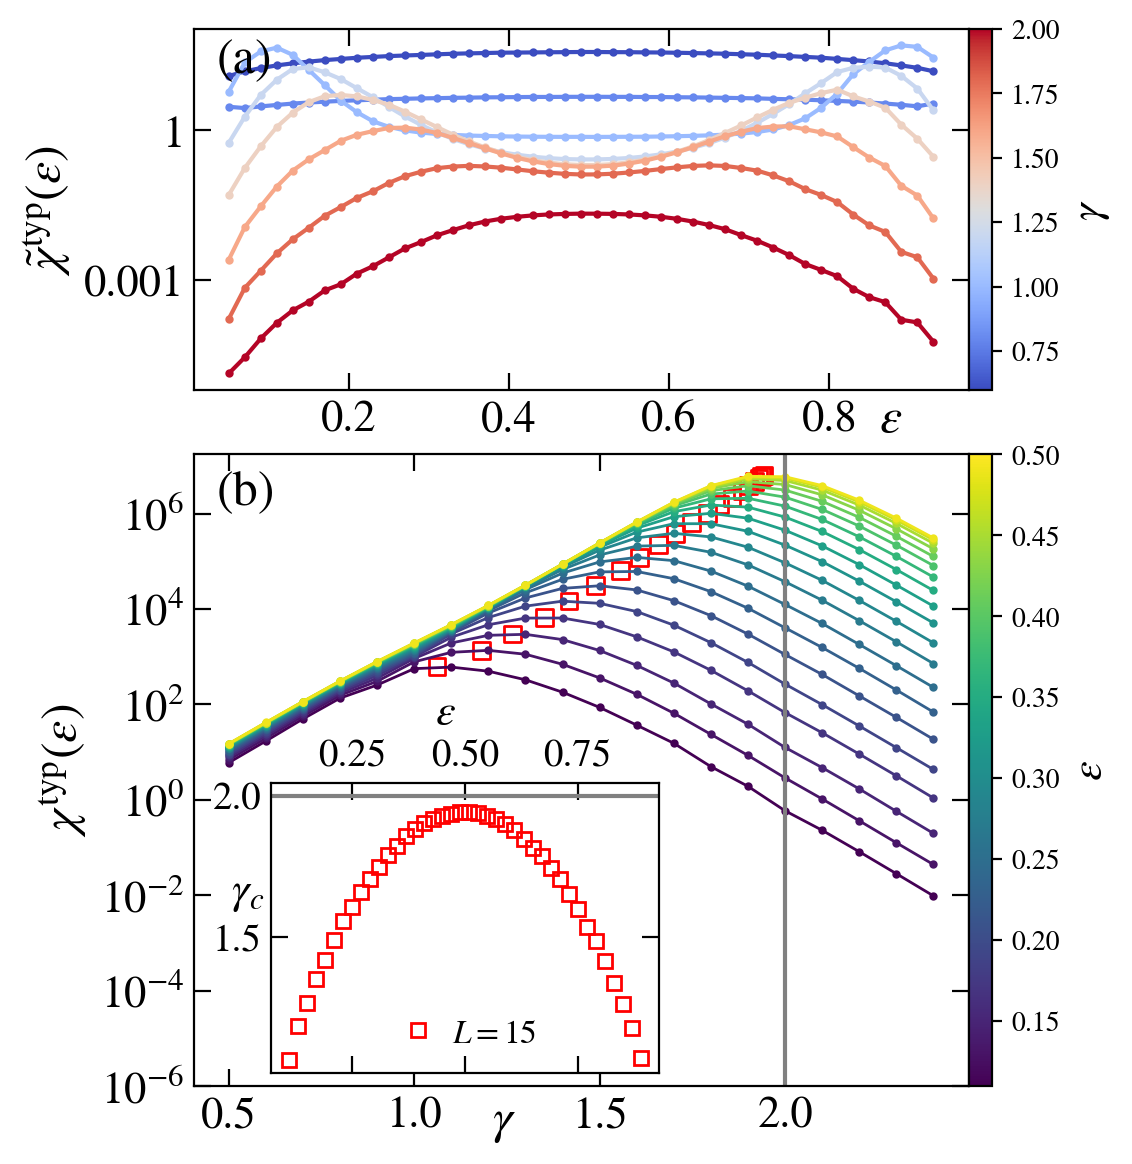

In [206]:
L = 15
w = 2
J = 1
g = 1.5
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2

window = 3

gamma_vals = np.arange(0.5, 2.5, 0.1)
gamma_plot = np.round(np.arange(0.6, 2.01, 0.2), 2)
print(gamma_plot)


dim = 2**L
# fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200)
fig = plt.figure(figsize=(5,7), dpi = 200)
fig.subplots_adjust(hspace=0.13, wspace=0.2)
gs = GridSpec(2, 1, height_ratios = [4, 7]) 
# gs1 = GridSpec(1,1)
# gs.update(top=0.98, bottom=0.48, hspace=0.02)
# gs1.update(top=0.4, bottom=0.02)
axis = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1])]

inset = axis[1].inset_axes([0.1, 0.02, 0.5, 0.46])

depsilon = 0.05
_eps_ = np.arange(depsilon, 1.0-depsilon, 0.02)
_eps_ = _eps_[_eps_ <= 0.91]
_eps_ = _eps_[_eps_ >= 0.10]

s_m_a = matplotlib.cm.ScalarMappable(cmap='coolwarm', norm= matplotlib.colors.Normalize(vmin=min(gamma_plot), vmax=max(gamma_plot) ))
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm= matplotlib.colors.Normalize(vmin=min(_eps_), vmax=0.5 ))
# s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm= matplotlib.colors.Normalize(vmin=0.5, vmax=max(_eps_) ))
s_m.set_array([])

alfa_c = []
alfa_c2 = []
agp_c = []
for jj in range(_eps_.size):
    eps = _eps_[jj]
    col2 = s_m.to_rgba(eps)
    # print(eps)
    agp      = np.zeros((gamma_vals.size)); agp.fill(np.nan)
    for ii, gx in enumerate(gamma_vals):
        alfa = np.round(gx, 2)
        col = s_m_a.to_rgba(alfa)
        eta = 2 / (2 - gx)
        name = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
        if exists(name):
            with h5py.File(name, "r") as file:
                
                E = np.array(file.get('energy_density')) #[window//2:-window//2]
                wH = np.array(file.get('wH_typ_density'))
                
                R = np.array(file.get('realisations'))
                DOS = np.array(file.get('DOS'))
                DOS = DOS / max(DOS) * dim
                idx_05 = min(range(len(E)), key=lambda i: abs(E[i] - 0.5))
                idx2 = min(range(len(E)), key=lambda i: abs(E[i] - eps))
                
                norm = DOS
                
                count = np.array(file.get('count')) / R
                _agp = np.array(file.get('susc_E_typ')) / R
                
                if jj == 0 and (alfa in gamma_plot):
                    yy = _agp * DOS**(2 / eta) * wH**2
                    # yy = _agp / count
                    # yy = yy / yy[idx_05]
                    axis[0].plot(E, yy, color=col, marker='o', markersize=2)
                # _agp = _agp / norm
                agp[ii] = _agp[idx2]# / count[idx2]
        else:
            print(name)
    
    matelem = dim ** (-1/eta)
    norm = dim#max(agp2)#matelem**2 / wH**2
    if eps <= 0.5:
        axis[1].plot(gamma_vals, agp, color=col2, marker='o', markersize=2, lw=1)
    
    idx = np.argmax(agp)
    
    x = gamma_vals
    indices = np.arange(max(np.argmax(agp) - 5,0), min(np.argmax(agp) + 3, agp.size-1), 1)
    x = np.linspace(gamma_vals[indices][0], gamma_vals[indices][-1], 1000)
    f = splrep(gamma_vals[indices], agp[indices], k=3, s=5)
    agp = splev(x, f)
    idx = np.argmax(agp)
    alfa_c.append(x[idx])
    if eps <= 0.5:
        alfa_c2.append(x[idx])
        agp_c.append(agp[idx])
    
    # if eps <= 0.5:
    #     axis.plot(x, agp, color=col2, alpha=0.5)
    
    # if eps <= 0.5:
    #     axis.plot(x, agp, color=col2, lw=4, alpha=0.35)
print(_eps_)
print(alfa_c)
inset.plot(_eps_, alfa_c,  marker='s', color='red', ls='--', markersize=5, lw=0, markerfacecolor='None', label=r"$L=%d$"%(L))

# a = 1.05
# b = 0.45
# alfac = g_crit#1 / np.sqrt(2)
# x = np.linspace(0.13, 0.87, 1000)
# inset.plot(x, alfac * np.exp(a**2 * (x - 0.5)**2 / 4 / b*2), color='k', ls='--', lw=2, label=r"$L=\infty$")
axis[1].scatter(alfa_c2, agp_c, marker='s', color='red', facecolor='None')

axis[0].xaxis.set_label_coords(.9, -0.02)
axis[1].xaxis.set_label_coords(.4, -0.02)

axis[1].axvline(x=g_crit, ls='-', c='gray')
# axis.axvline(x=alfa_crit,    ls=':', c='k')

ylab = r"$\tilde{\chi}^{\rm typ}(\epsilon)$"# if projected else r"$||\mathcal{A}_\lambda(\epsilon)||^2$"
fig_help.set_plot_elements(axis[0], ylabel=ylab, xlabel=r"$\epsilon$", font_size=16, set_legend=False, xscale='linear', yscale='log')
ylab = r"$\chi^{\rm typ}(\epsilon)$"
fig_help.set_plot_elements(axis[1], ylabel=ylab, xlabel=r"$\gamma$", font_size=16, set_legend=False, xscale='linear', yscale='log')
axis[1].set_ylim(1e-6, None)

axis[0].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%(np.round(x, order_of_magnitude(x))) ))
axis[0].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%(np.round(x, order_of_magnitude(x))) ))

cbar_ax = axis[0].inset_axes([1., 0.0, 0.03, 1])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m_a, cax=cbar_ax, aspect=1, orientation = 'vertical')
cbar.set_label(r"$\gamma$", fontsize=16)
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')
# divider = make_axes_locatable(axis[1])
# cax = divider.new_vertical(size = '3%', pad = 0.05)
# fig.add_axes(cax)
# cbar = fig.colorbar(s_m, cax = cax, orientation = 'horizontal')
# cax.xaxis.set_ticks_position('top')
# cax.xaxis.set_label_position('top')
# cbar.set_label(r"$\epsilon$", fontsize=16)

cbar_ax = axis[1].inset_axes([1., 0.0, 0.03, 1])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'vertical')
cbar.set_label(r"$\epsilon$", fontsize=16)
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')

inset.xaxis.set_label_position("top")
inset.xaxis.set_label_coords(.45, 1.2)
inset.xaxis.tick_top()

inset.yaxis.set_label_position("left")
inset.yaxis.set_label_coords(-0.06, 0.55)
inset.yaxis.tick_left()
fig_help.set_plot_elements(inset, ylabel=r"$\gamma_c^*$", xlabel=r"$\epsilon$", font_size=14, set_legend=False, xscale='linear', yscale='linear')
fig_help.set_legend(inset, fontsize=12, loc='lower center')

# inset.set_yticks([0.71, 0.73, 0.74])
# inset.set_xticks([0.2, 0.3, 0.4, 0.5])
inset.set_ylabel(r"$\gamma_c$", rotation=0, fontsize=16)

inset.axhline(y=g_crit,    ls='-', color='gray')
# inset.axhline(y=1/np.sqrt(2), ls='-', color='gray')
# inset.set_ylim(0.71, 0.95)
# inset.annotate(r"$\tilde{\alpha}_c$", color='gray', fontsize=12, xy=(0.3, 0.7075), xycoords='data', backgroundcolor="w")
inset.annotate(r"${\gamma}_c$", color='gray', fontsize=12, xy=(0.2, 0.74), xycoords='data', backgroundcolor="w")

axis[0].annotate(r"(a)", fontsize=18, xy=(0.03, 0.88), xycoords='axes fraction')
axis[1].annotate(r"(b)", fontsize=18, xy=(0.03, 0.92), xycoords='axes fraction')

# fig.savefig("plots_AGP/Fig3.pdf", bbox_inches = 'tight', pad_inches=0.02)

8 2.0999999999999996 5000.0 5000.0
9 2.0999999999999996 5000.0 5000.0
10 2.0999999999999996 5000.0 5000.0
11 2.0999999999999996 5000.0 5000.0
12 2.0999999999999996 5000.0 5000.0
13 2.0999999999999996 3000.0 3000.0


No handles with labels found to put in legend.


14 2.0999999999999996 2000.0 2000.0
15 2.0999999999999996 705.0 873.0
0.7670325764517819 2.0000508705201447
-1.1507356683781294 1.993933709882818


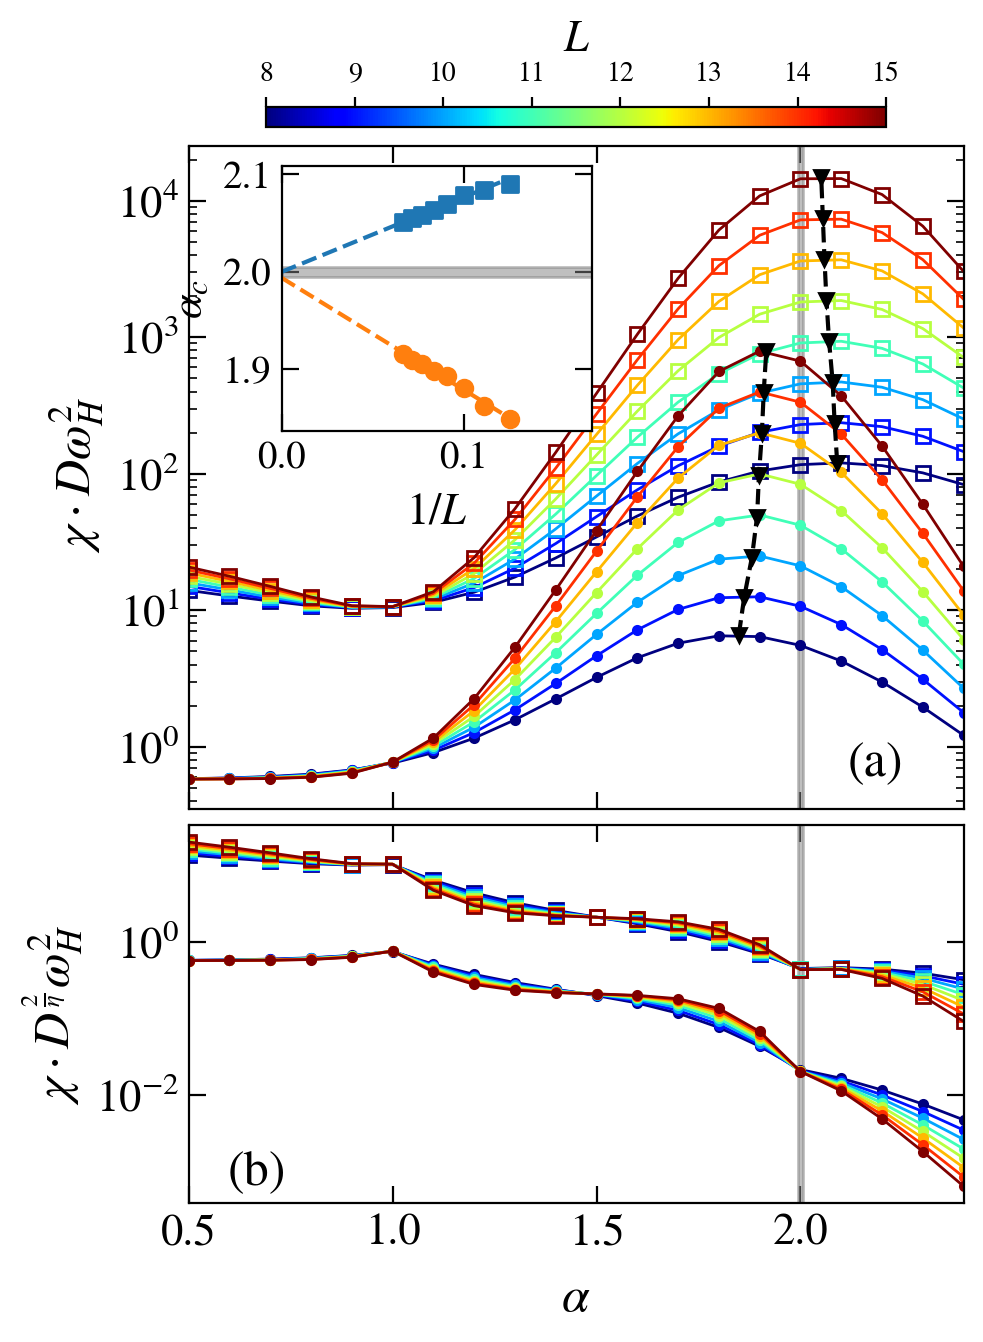

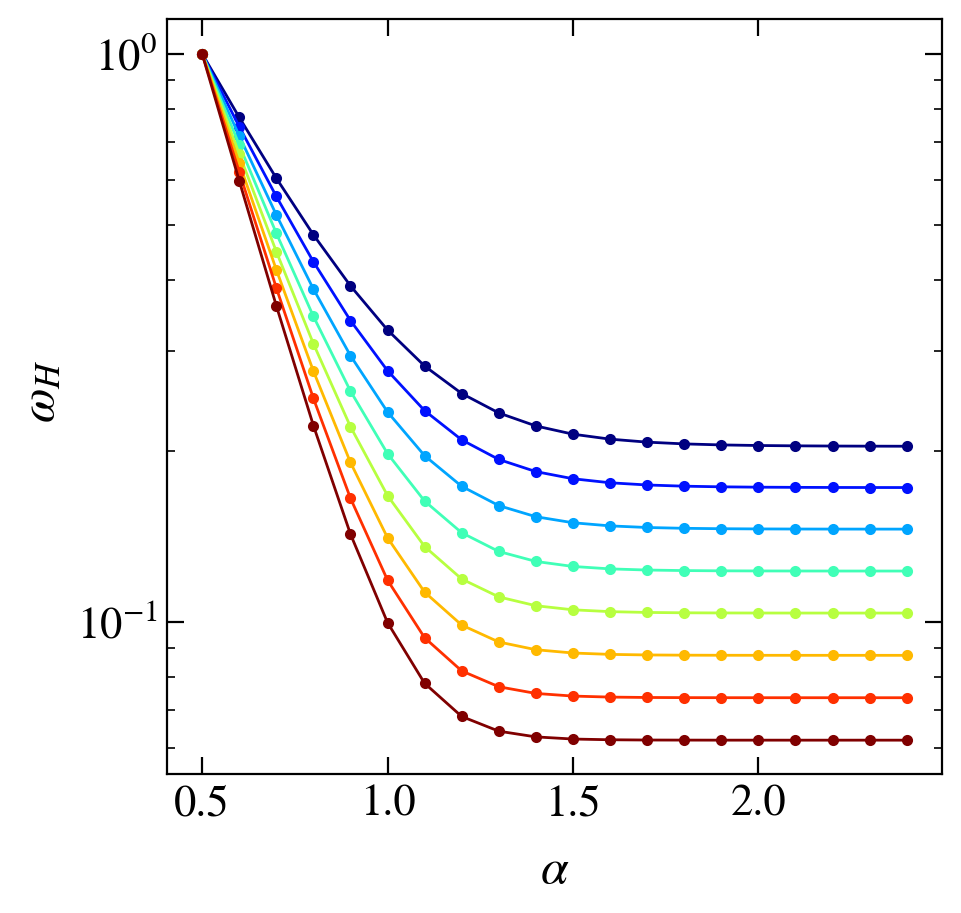

In [12]:
markers_ls2 = ['s','o', 'D', '<', 'X', '^', '*', '+']
markers2 = itertools.cycle(markers_ls2)
colors_ls_cyc = itertools.cycle(colors_ls)
L = 15
w = 2
J = 1
g = 1.5
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2

window = 3

gamma_vals = np.arange(0.5, 2.5, 0.1)



dim = 2**L
sizes = np.arange(8, 16, 1)
norm = matplotlib.colors.Normalize(
        vmin=min(sizes),
        vmax=max(sizes) )


# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='jet', norm=norm)
s_m.set_array([])
fig = plt.figure(figsize=(5,7), dpi = 200)
fig.subplots_adjust(hspace=0.0)
gs = GridSpec(2, 1, height_ratios = [7, 4]) 
# gs1 = GridSpec(1,1)
# gs.update(top=0.98, bottom=0.48, hspace=0.02)
# gs1.update(top=0.4, bottom=0.02)
ax1 = fig.add_subplot(gs[0])
axis = [ax1, fig.add_subplot(gs[1])]
# fig, axis = plt.subplots( nrows=2, ncols=1, figsize=(5,9.5), dpi = 200, sharex=True)
figaa, ax = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharex=False)

agp_max = []
alfa_max1 = []
susc_max = []
alfa_max2 = []
for L in sizes:
    col = s_m.to_rgba(L)
    dim = 2**(L)
    
    reals    = np.zeros((gamma_vals.size)); reals.fill(np.nan)
    agp      = np.zeros((gamma_vals.size)); agp.fill(np.nan)
    susc     = np.zeros((gamma_vals.size)); susc.fill(np.nan)
    typ_susc = np.zeros((gamma_vals.size)); typ_susc.fill(np.nan)
    norm1 = np.zeros((gamma_vals.size)); norm1.fill(np.nan)
    norm2 = np.zeros((gamma_vals.size)); norm2.fill(np.nan)
    wH = np.zeros((gamma_vals.size)); wH.fill(np.nan)
    wH_anal = np.zeros((gamma_vals.size)); wH_anal.fill(np.nan)
    for ii, gx in enumerate(gamma_vals):
        eta = 2 / (2 - gx) if gx >= 1 else 2
        name = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
        
        if exists(name):
            with h5py.File(name, "r") as file:
                R = np.array(file.get('realisations'))
                # DOS = dim
                
                wHx = np.array(file.get('wH'))[-2]
                wHx_typ = np.array(file.get('wH_typ'))[-2]
                wH[ii] = wHx
                # wHx = 1/dim
                DOS = max(np.array(file.get('count')) / R)
                # DOS = np.sum(DOS[DOS.size//4 : 3 * DOS.size//4])
                
                norm1[ii] = (dim)**(-2 / eta) / wHx_typ**2 if gx <= g_crit else 1/wHx_typ**2
                norm2[ii] = 1/dim / wHx_typ**2
                
                # DOS = max(np.array(file.get('DOS'))) / R
                # norm2[ii] = DOS**(-2 / eta) / wHx**2 if alfa >= alfa_crit else 1 / wHx**2
                
                reals[ii] = np.array(file.get('realisations'))
                agp[ii] = np.array(file.get('SUSC_R'))[-2] * 10
                susc[ii] = np.array(file.get('SUSC_R'))[-2]
                typ_susc[ii] = np.array(file.get('TYP_SUSC'))[-2]
        else:
            print(name)

    axis[1].plot(gamma_vals, typ_susc / norm1, color=col, marker='o', markersize=3, lw=1)
    axis[1].plot(gamma_vals, agp      / norm1, color=col, marker='s', markersize=5, lw=1, markerfacecolor='None')
    
    typ_susc = typ_susc / norm2
    agp = agp / norm2
    axis[0].plot(gamma_vals, typ_susc, color=col, marker='o', markersize=3, lw=1)
    axis[0].plot(gamma_vals, agp     , color=col, marker='s', markersize=5, lw=1, markerfacecolor='None')
    
    
    ax.plot(gamma_vals, wH/wH[0], color=col, marker='o', markersize=3, lw=1)
    ax.plot(gamma_vals, wH_anal/wH_anal[0], color=col, marker='s', markersize=5, lw=1, markerfacecolor='None')
    print(L, gamma_vals[np.argmax(agp)], min(reals), max(reals))
    x = gamma_vals[~np.isnan(agp)]
    agp = agp[~np.isnan(typ_susc)]
    typ_susc = typ_susc[~np.isnan(typ_susc)]
    # indices = np.where(np.logical_and(alfa_vals >= 0.6, alfa_vals < 1.85))[0]
    indices = np.arange(max(np.argmax(agp) - 5,0), min(np.argmax(agp) + 5, agp.size), 1)
    x = np.linspace(gamma_vals[indices][0], gamma_vals[indices][-1], 1000)
    f = splrep(gamma_vals[indices], agp[indices], k=5, s=10)
    agp = splev(x, f)
    idx = np.argmax(agp)
    agp_max.append(agp[idx])
    alfa_max1.append(x[idx])
    
    indices = np.arange(max(np.argmax(typ_susc) - 5, 0), min(np.argmax(typ_susc) + 5, typ_susc.size), 1)
    x = np.linspace(gamma_vals[indices][0], gamma_vals[indices][-1], 1000)
    f = splrep(gamma_vals[indices], typ_susc[indices], k=5, s=10)
    typ_susc = splev(x, f)
    idx = np.argmax(typ_susc)
    susc_max.append(typ_susc[idx])
    alfa_max2.append(x[idx])
    
axis[0].plot(alfa_max1, agp_max,  marker='v', color='black', ls='--', markersize=5)
axis[0].plot(alfa_max2, susc_max, marker='v', color='black', ls='--', markersize=5)

axis[1].plot(np.nan, np.nan, color='k', marker='o', markersize=3, lw=1, label=r"$\chi^{\rm typ}$" if L == 13 else "")
axis[1].plot(np.nan, np.nan, color='k', marker='s', markersize=4, lw=1, markerfacecolor='None', label=r"$\chi^{\rm av}_r\cdot10$" if L == 13 else "") 
    
# fig.subplots_adjust(top=0.97)
cbar_ax = axis[0].inset_axes([0.1, 1.03, 0.8, 0.03])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'horizontal')
cbar.set_label(r"$L$", fontsize=16)
cbar_ax.xaxis.set_ticks_position('top')
cbar_ax.xaxis.set_label_position('top')

   
axis[0].annotate(r"(a)", fontsize=18, xy=(0.85, 0.05), xycoords='axes fraction')
axis[1].annotate(r"(b)", fontsize=18, xy=(0.05, 0.05), xycoords='axes fraction')
# axis[1].set_ylim(2e-4, 6e1)
axis[0].set_xlim(0.5, 2.4)
axis[1].set_xlim(0.5, 2.4)

# axis[1].set_ylim(2e-4, 0.3)

for axa in axis:
    # ax.axvline(x=1/np.sqrt(2), ls=':', c='gray')
    # axa.axvline(x=alfa_crit,    ls=':', c='gray')
    axa.axvspan(xmin = g_crit - 0.005, xmax = g_crit + 0.005, color='gray', alpha=0.5 )
    
fig_help.set_plot_elements(axis[0], ylabel=r" $\chi\cdot D\omega_H^2$", xlabel=r"$\alpha$", font_size=16, set_legend=False, xscale='linear', yscale='log')
fig_help.set_plot_elements(axis[1], ylabel=r"$\chi\cdot D^{\frac{2}{\eta}}\omega_H^2$", xlabel=r"$\alpha$", font_size=16, set_legend=False, xscale='linear', yscale='log')
fig_help.set_legend(axis[1], fontsize=15, loc='lower right')


inset = axis[0].inset_axes([0.12, 0.57, 0.4, 0.4])

fig_help.set_plot_elements(ax, ylabel=r" $\omega_H$", xlabel=r"$\alpha$", font_size=16, set_legend=False, xscale='linear', yscale='log')

# sizes = sizes+N
for alfac in [alfa_max1, alfa_max2]:
    col = color=next(colors_ls_cyc)
    inset.scatter(1/sizes, alfac, marker=next(markers2), color=col)
    pars, pconv, fit_info, msg, _ = fit(lin_fit2,
                        xdata = 1/sizes[-7:],
                        ydata =   alfac[-7:],
                        full_output=True, maxfev=10000)
    print(*pars)
    xx = np.linspace(0, max(1/sizes), 10000)
    inset.plot( xx, lin_fit2(xx, *pars), ls='--',  color = col)

fig_help.set_plot_elements(inset, ylabel=r"$\alpha_c$", xlabel=r"$1/L$", font_size=14, set_legend=False, xscale='linear', yscale='linear')
inset.set_xlim(0, 0.17)
# inset.set_ylim(0, 0.17)

# inset.set_xticks([0.05, 0.1, 0.78, 0.8])
# axis[0].set_xticks([])

axis[0].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "" ))

# inset.set_yticks([0.7, 0.72, 0.74, 0.76, 0.78])
# # inset.set_yticklabels(["0.7", "0.72", "", "", "0.78"])
# inset.set_xticks([0, 0.1, 0.15])
# inset.set_xticklabels(["0", "0.1", "0.15"])
# inset.xaxis.set_label_position("top")
# inset.xaxis.tick_top()
# inset.xaxis.set_label_coords(0.25, 1.1)
# inset.yaxis.set_label_position("left")
# inset.yaxis.set_label_coords(-0.22, 0.55)

# inset.axhline(y=1/np.sqrt(2), ls=':', c='gray')
# inset.axhline(y=alfa_crit,    ls='--', c='k')
inset.axhspan(ymin = g_crit - 0.005, ymax = g_crit + 0.005, color='gray', alpha=0.5 )
fig.subplots_adjust(wspace = 0.03, hspace=0.03)
# fig.savefig("plots_AGP/Fig2.pdf", bbox_inches = 'tight', pad_inches=0.02)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


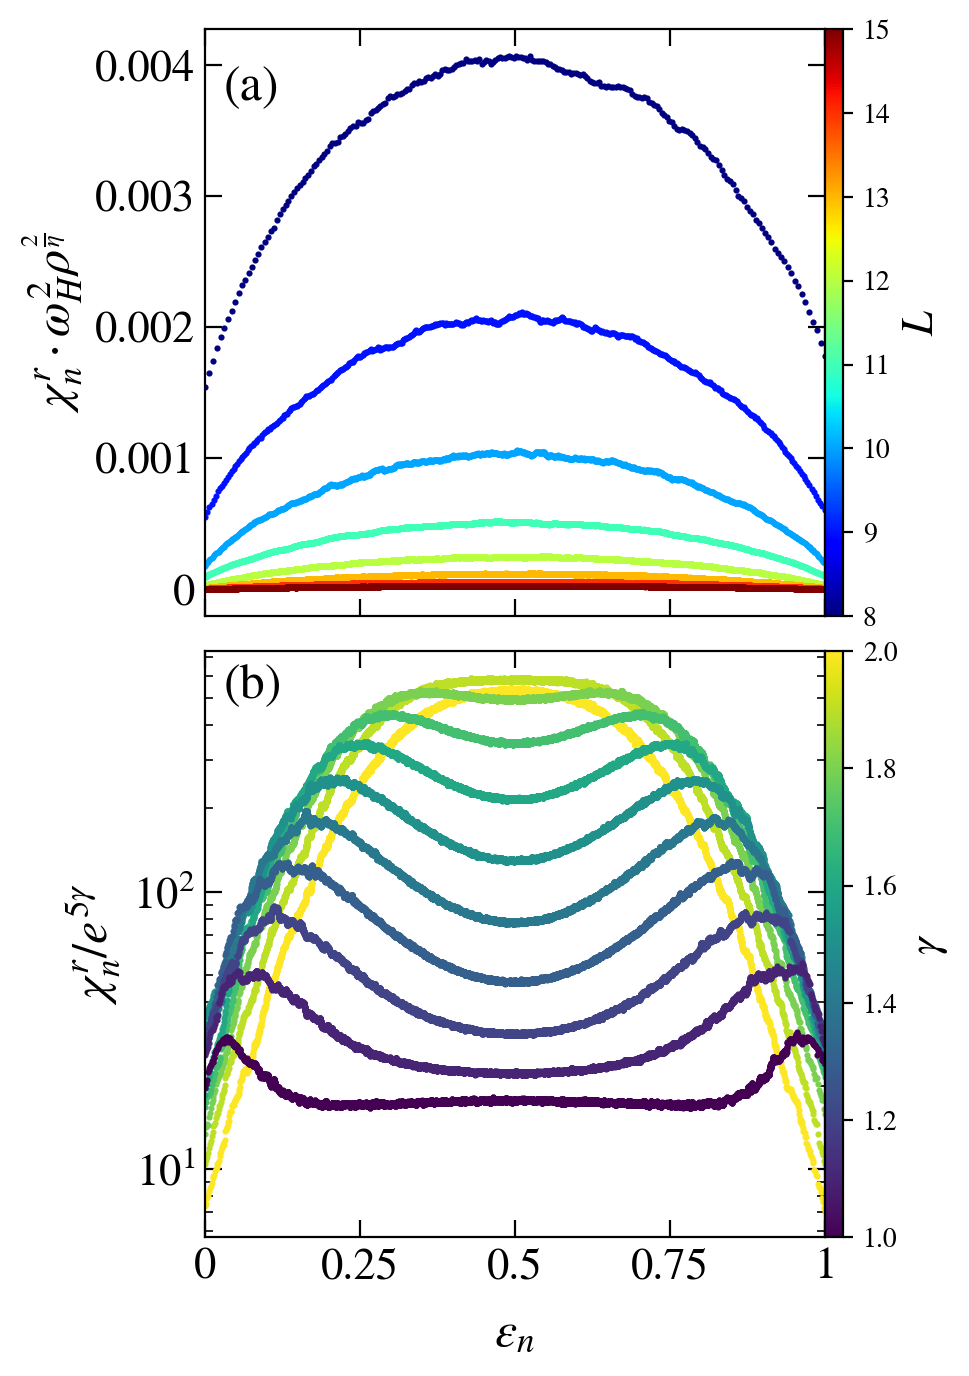

In [275]:
L = 15
w = 2
J = 1
g = 1.5
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2

window = 50

gamma_vals = np.arange(0.5, 2.5, 0.1)
gamma_plot = np.round(np.arange(1.0, 2.01, 0.1), 2)
print(gamma_plot)


dim = 2**L
fig, axis = plt.subplots( nrows=2, ncols=1, figsize=(4,8), dpi = 200, sharex=True)

s_m_a = matplotlib.cm.ScalarMappable(cmap='jet', norm= matplotlib.colors.Normalize(vmin=min(sizes), vmax=max(sizes) ))
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm= matplotlib.colors.Normalize(vmin=min(gamma_plot), vmax=max(gamma_plot) ))
# s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm= matplotlib.colors.Normalize(vmin=0.5, vmax=max(_eps_) ))
s_m.set_array([])

alfa_c = []
alfa_c2 = []
agp_c = []
gx = 0.5
for jj, L in enumerate(sizes):
    window = 100 if L > 13 else (50 if L > 10 else 20)
    dim = 2**L
    col = s_m_a.to_rgba(L)
    name = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            R = np.array(file.get('realisations'))
            E = np.array(file.get('average energies'))[window//2:-window//2]
            wHx = np.array(file.get('wH'))[-2]
            wHx_typ = np.array(file.get('wH_typ'))[-2]
            
            susc = np.array(file.get('susc_r')) / R
            susc = susc * wHx_typ**2 * (1/wHx)**(2 - gx) if gx > 1 else susc * (L) / dim * wHx_typ
            susc = tools.remove_fluctuations(susc, bucket_size=window)[window//2:-window//2]
            
            axis[0].scatter((E - E[0]) / (E[-1]-E[0]), susc, color=col, s=1.5, rasterized=True)
    else:
        print(name)
L=15
window = 50
for jj, gx in enumerate(gamma_plot[::-1]):
    dim = 2**L
    col2 = s_m.to_rgba(gx)
    name = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            R = np.array(file.get('realisations'))
            E = np.array(file.get('average energies'))[window//2:-window//2]
            
            susc = np.array(file.get('susc_r')) / R
            # susc = susc * wHx**2 * dim**(2 - gx)
            susc = tools.remove_fluctuations(susc, bucket_size=window)[window//2:-window//2]
            axis[1].scatter((E - E[0]) / (E[-1]-E[0]), susc / np.exp(5 * gx), color=col2, s=1.5, rasterized=True)
    else:
        print(name)         
            
fig_help.set_plot_elements(axis[0], ylabel=r"${\chi}^{r}_n\cdot\omega_H^2\rho^\frac{2}{\eta}$", xlabel=r"$\epsilon_n$", font_size=16, set_legend=False, xscale='linear', yscale='linear')
fig_help.set_plot_elements(axis[1], ylabel=r"${\chi}^{r}_n/e^{5\gamma}$", xlabel=r"$\epsilon_n$", font_size=16, set_legend=False, xscale='linear', yscale='log')
axis[0].set_xlim(0,1)

axis[0].xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%(np.round(x, order_of_magnitude(x))) ))
axis[0].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%(np.round(x, order_of_magnitude(x))) ))

cbar_ax = axis[0].inset_axes([1., 0.0, 0.03, 1])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m_a, cax=cbar_ax, aspect=1, orientation = 'vertical')
cbar.set_label(r"$L$", fontsize=16)
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')
# divider = make_axes_locatable(axis[1])
# cax = divider.new_vertical(size = '3%', pad = 0.05)
# fig.add_axes(cax)
# cbar = fig.colorbar(s_m, cax = cax, orientation = 'horizontal')
# cax.xaxis.set_ticks_position('top')
# cax.xaxis.set_label_position('top')
# cbar.set_label(r"$\epsilon$", fontsize=16)

cbar_ax = axis[1].inset_axes([1., 0.0, 0.03, 1])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1, orientation = 'vertical')
cbar.set_label(r"$\gamma$", fontsize=16)
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')

axis[0].annotate(r"(a)", fontsize=18, xy=(0.03, 0.88), xycoords='axes fraction')
axis[1].annotate(r"(b)", fontsize=18, xy=(0.03, 0.92), xycoords='axes fraction')

# fig.savefig("plots_AGP/Fig3.pdf", bbox_inches = 'tight', pad_inches=0.02)
fig.subplots_adjust(wspace = 0.06, hspace=0.06)

## BETA FUNCION AT FINITE TEMPERATURE

J= 1   gx= 0.8   eta= 0.6553593892070976   c= -9.234702305234979
J= 1   gx= 0.9   eta= 1.0450778485302183   c= -3.4639383328285045
J= 1   gx= 1.0   eta= 1.1434348610453022   c= -2.735451376628708
J= 1   gx= 1.1   eta= 1.7845637949561277   c= -0.15875097943998842
J= 1   gx= 1.2   eta= 2.8032272850823308   c= 0.8198165314531796
J= 1   gx= 1.3   eta= 4.154577965093261   c= 0.8967821498348951
J= 1   gx= 1.4   eta= 7.148099446736594   c= 0.9242573625457733
J= 1   gx= 1.5   eta= 18.151077641053025   c= 0.8915765906624251
J= 1   gx= 1.6   eta= 200819053.06656587   c= 0.612286362219595
J= 1   gx= 1.7   eta= 1577293456.1568654   c= -0.2520272366029372
J= 1   gx= 1.8   eta= 560196059.4077916   c= -1.0164179728148302
J= 1   gx= 1.9   eta= 555442223.9534011   c= -1.7297725950260154
J= 1   gx= 0.8   eta= 0.6359198306120623   c= -9.610992296820271
J= 1   gx= 0.9   eta= 1.040901661907119   c= -3.3694077219080936
J= 1   gx= 1.0   eta= 1.0579094119003751   c= -3.157729369232818
J= 1   gx= 1.1   eta= 1.

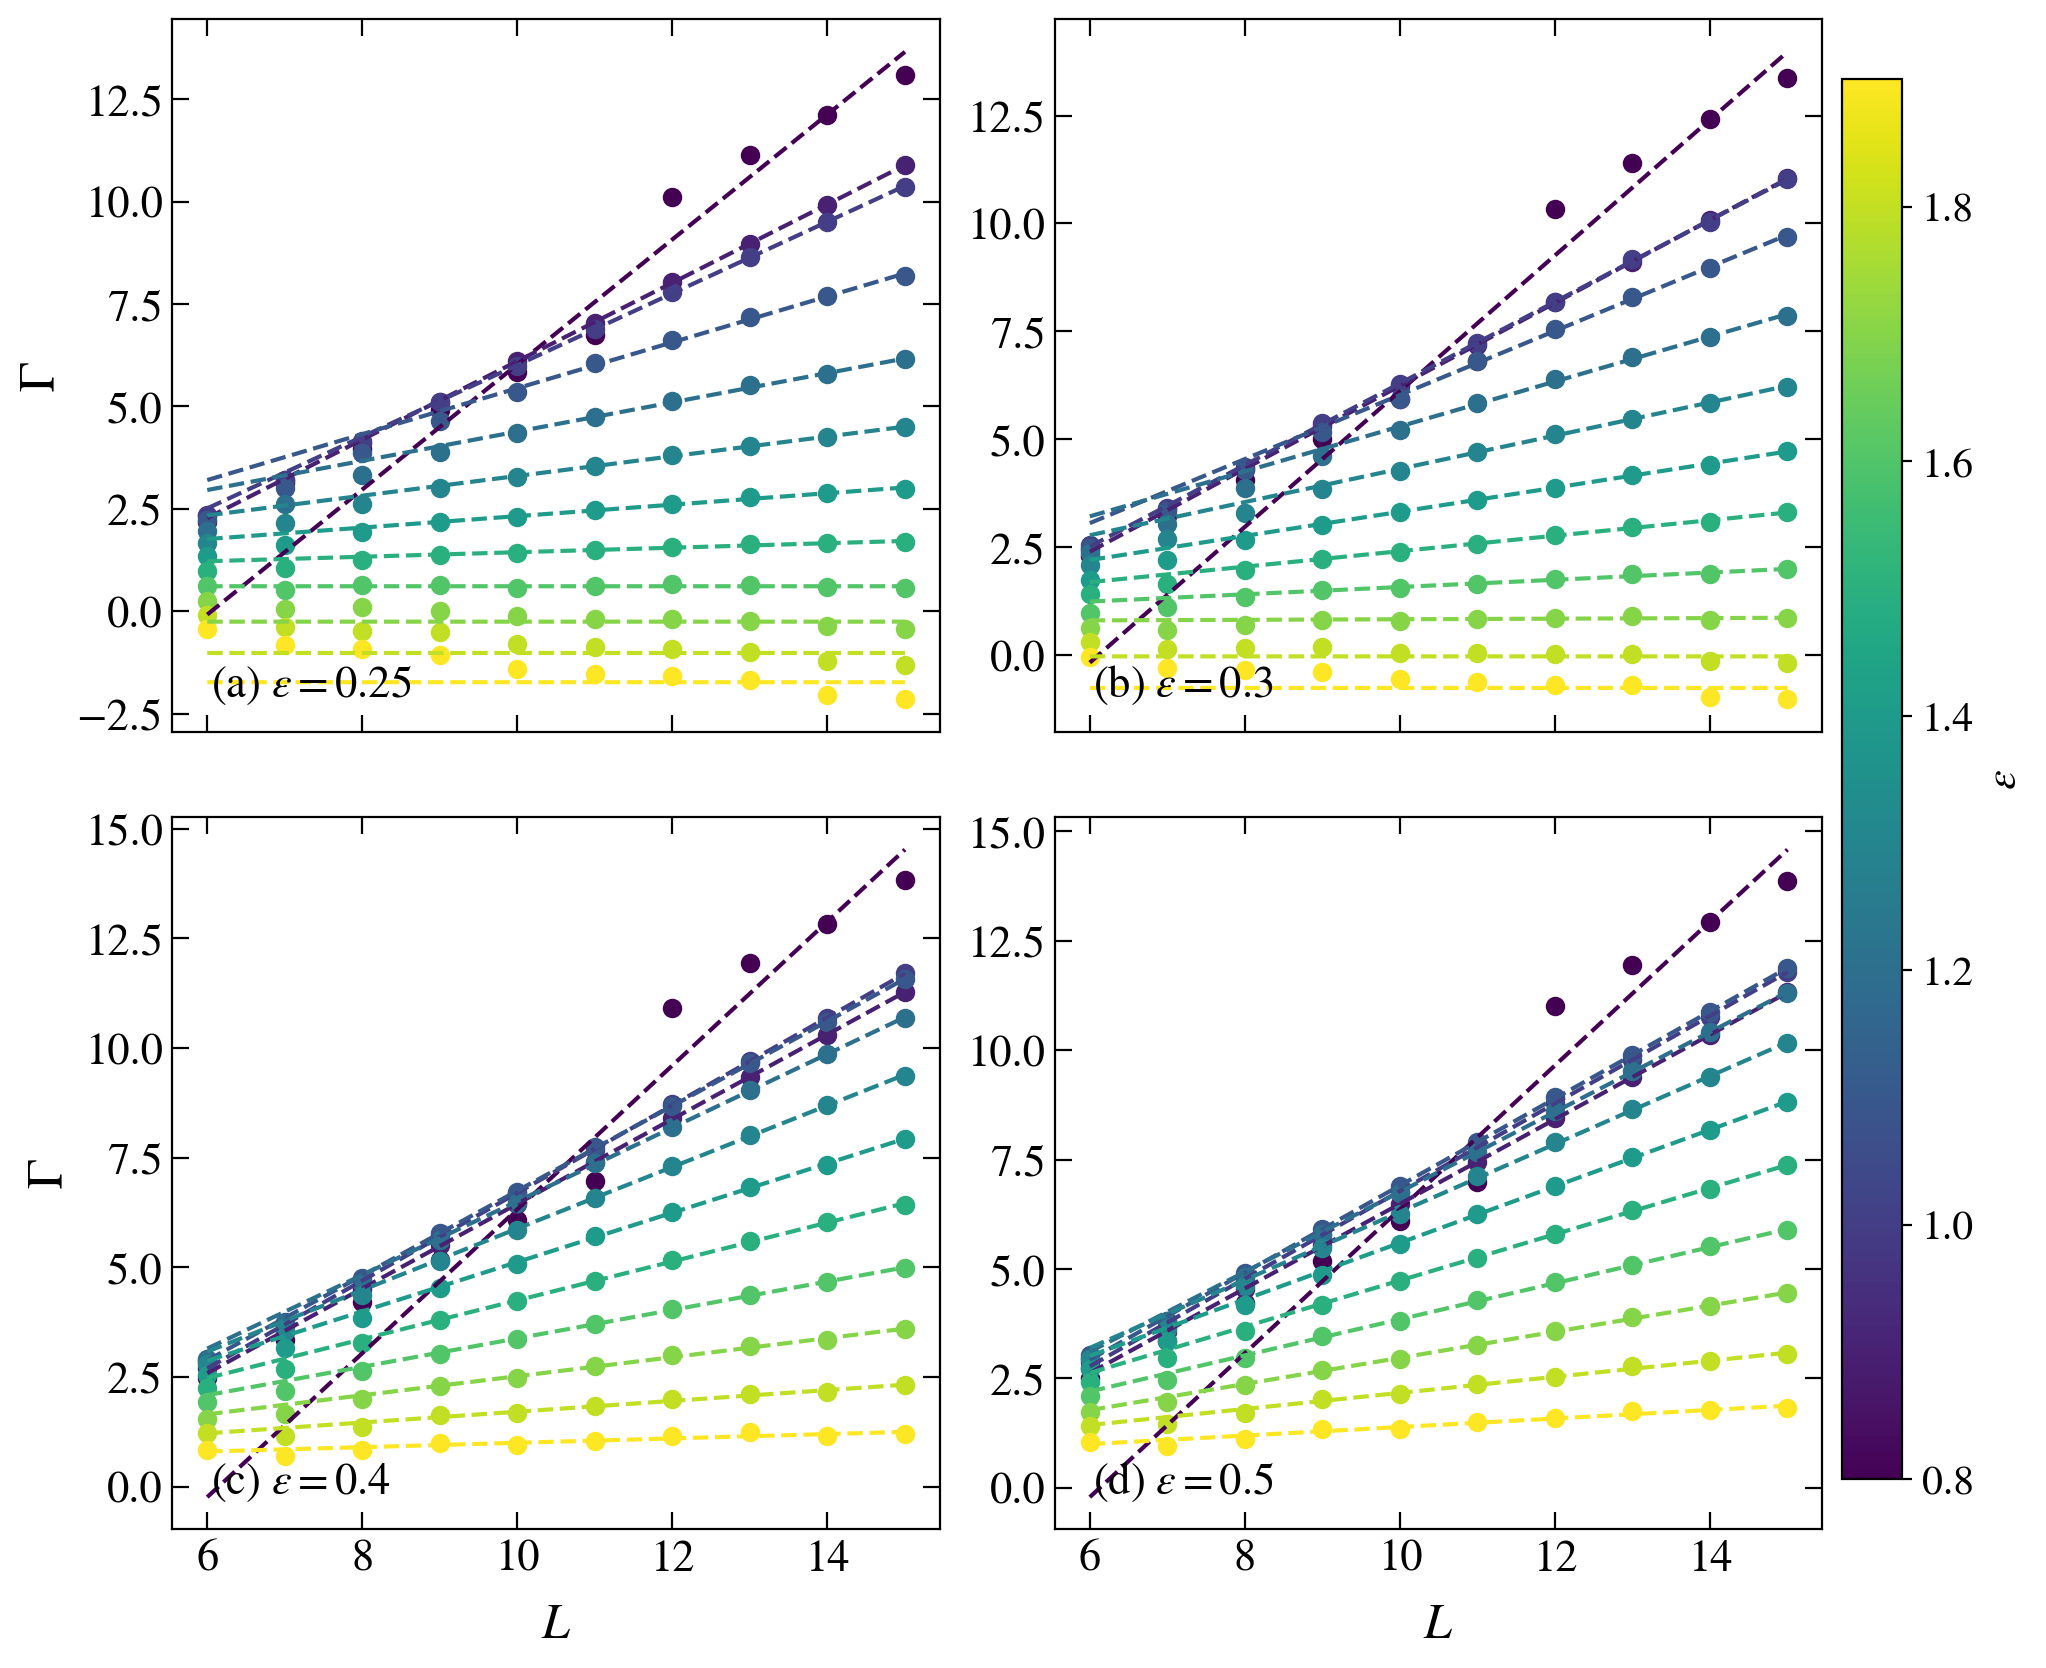

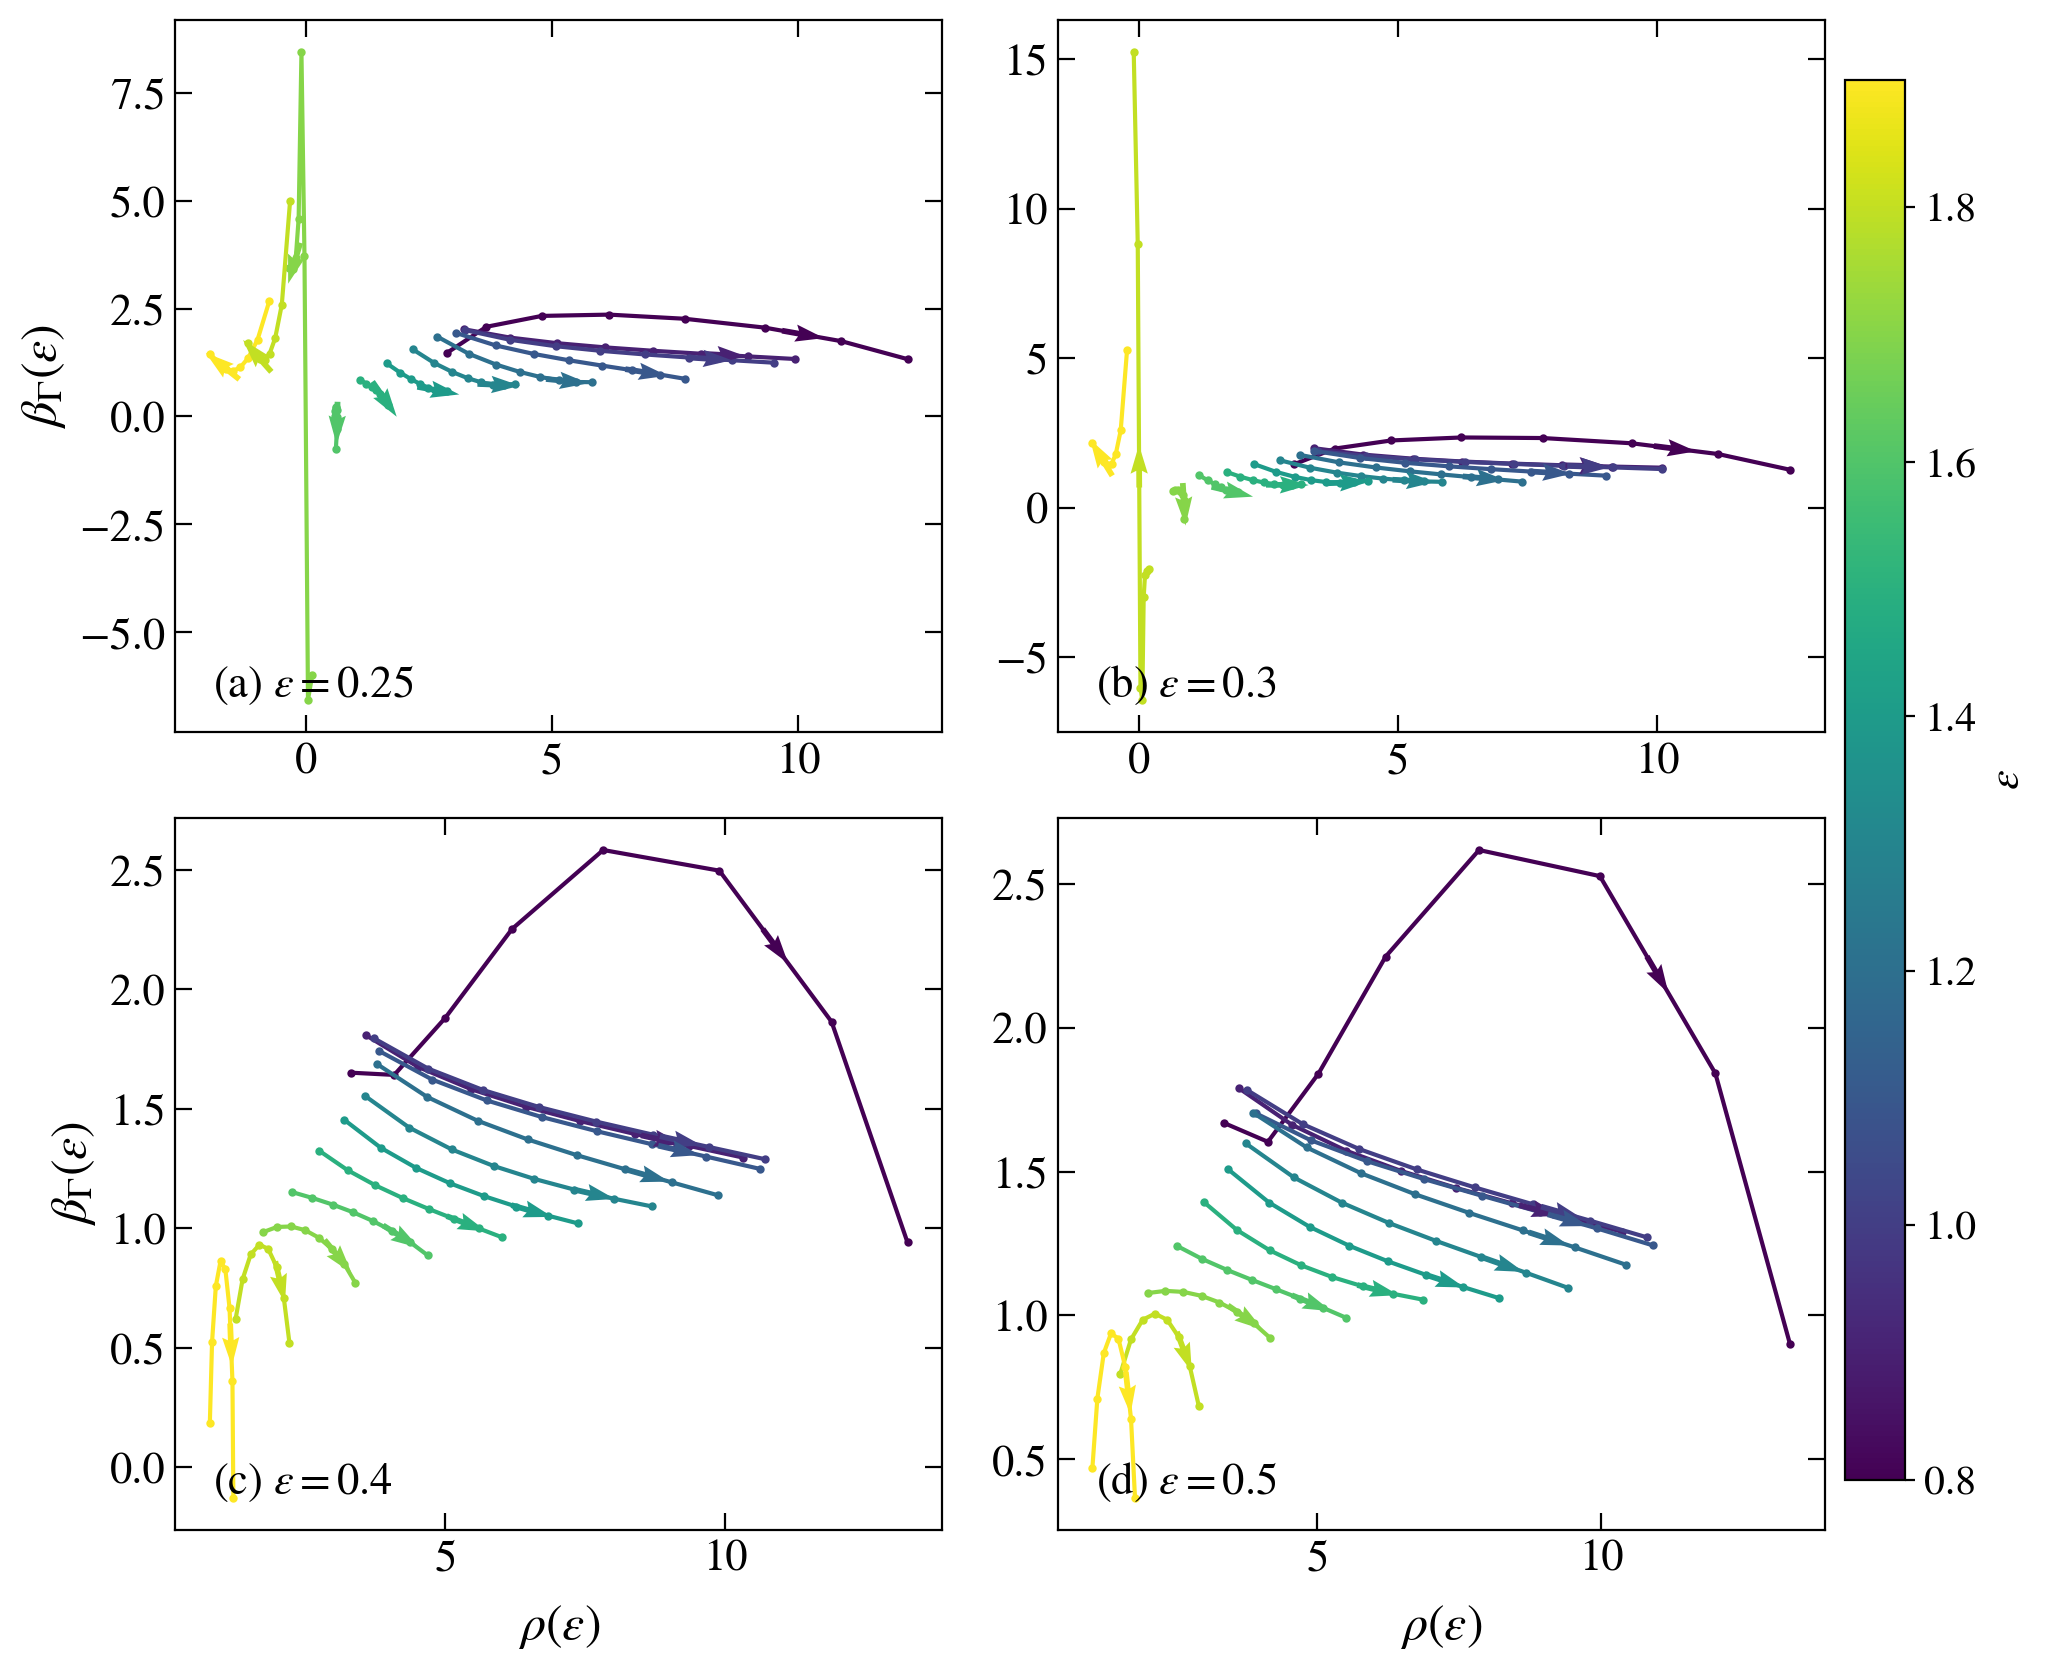

In [57]:
markers_ls2 = ['o','s','v', 'X', '+', 'X', '^', '*', '+']
markers2 = itertools.cycle(markers_ls2)
colors_ls_cyc = itertools.cycle(colors_ls)
L = 20
w = 2
J = 1
g = 1.5
op=0
modello = 'RP'
prefix = base_dir(model=modello, d=DIM) + 'SpectralFunctions/'

sizes = np.arange(8, 16, 1)

DIM = 1
g_crit = 2
interpolate = 1


def lorenz(x, A, G):
    return A / ( (x / G)**2 + 1)

def eta_fit(x, alfac, A):
    return 2 * A / ( 1 - np.log(x) / np.log(alfac))

def matelem_fit(DOS, a0, eta):
    return a0 * DOS**(-1 / eta)

AGP = 1


sizes = np.arange(6, 16, 1)

Eall = np.arange(0.05, 0.95, 0.02)
E = np.arange(0.05, 0.51, 0.02)



fig1, axis = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 200, sharex = True)
axis = np.array(axis).flatten()

fig2, axis2 = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 200)
axis2 = np.array(axis2).flatten()

omegax = np.zeros( (20 * (L)) )

labs = ["(a)", "(b)", "(c)", "(d)"]
_gamma_ = np.arange(0.8, 1.91, 0.1)
_etas_ = [0.25, 0.3, 0.4, 0.5]

# create a ScalarMappable and initialize a data structure
s_m = matplotlib.cm.ScalarMappable(cmap='viridis', norm=matplotlib.colors.Normalize(vmin=min(_gamma_),vmax=max(_gamma_) ))
s_m.set_array([])


for iie, eps in enumerate(_etas_):
    all_gammas = []
    for ii_a, gx in enumerate(_gamma_):
        def thouless_fit(L, c, eta):
            return c - L / eta if gx > g_crit else c + L / eta

        # if 
        col = s_m.to_rgba(gx)
        colors.append(col)
        
        idx = min(range(len(Eall)), key=lambda i: abs(Eall[i] - eps))
        
        all_spec = []
        all_spec_typ = []
        cut = 0
        
        wH = np.zeros(sizes.shape)
        
        spec_at_wH_G = np.zeros(sizes.shape)
        
        conductance = []
        DOS = np.zeros(sizes.shape)
        for iiL, L in enumerate(sizes):
            dim = 2**L
            name = prefix +  info(L=L, J=J, g=gx, model=modello, ext='.hdf5')
            if exists(name):
                with h5py.File(name, "r") as file:
                    R = np.array(file.get('realisations'))
                    
                    Ex = np.array(file.get('energy_density'))
                    idx2 = min(range(len(Ex)), key=lambda i: abs(Ex[i] - eps))
                    
                    wH = np.array(file.get('wH_density'))[idx2]
                    
                    R = np.array(file.get('realisations'))
                    # print(L, alfa, R)
                    omegax = np.array(file.get('omegas'))
                    omegax = np.sqrt(omegax[1:] * omegax[:-1])
                    spec_fun = np.array(file.get('spec_fun'))[idx]
                    spec_fun_typ = np.array(file.get('spec_fun_typ'))[idx]
            else:
                print(name)
            
            yy0 = spec_fun if AGP else spec_fun_typ
            
            omegax = omegax[~np.isnan(yy0)]
            yy0 = yy0[~np.isnan(yy0)]
            
            xx = omegax#[indices]
            yy = yy0#[indices]
            yy = integrate.cumulative_trapezoid(yy, xx)
            yy = (yy - yy[0]) / (yy[-1] - yy[0])
            G = xx[np.argmin( np.abs(yy - 0.5) )] if gx >= 0.8 else xx[-1]
            conductance.append(np.log2(G / wH))
            
            
        axis[iie].scatter(sizes, conductance, color = col)
        
        col = s_m.to_rgba(gx)

        xx = sizes
        yy = conductance
        
        try:
            ii_cut = -6
            pars, pconv= fit(thouless_fit,
                            xdata = xx[ii_cut:],
                            ydata = yy[ii_cut:])
            eta = pars[1]
            c = pars[0]
            print("J=", J, "  gx=", np.round(gx, 2), "  eta=", eta, "  c=", c)
            
            sizes_dense = np.linspace(min(xx), max(xx), 100)
            
            axis[iie].plot(dense_sizes, thouless_fit(dense_sizes, *pars), color=col, ls='--')
        except RuntimeError:
            print(alfa)
        
        xx = sizes * (2 - gx) / 2# if gx <= g_crit else sizes
        
        f = splrep(xx, yy, k=3 if gx < g_crit + 0.2 else 3, s=2)
        yy = splev(xx, f)
        beta = diff_central(np.log( xx ), np.log( np.abs(yy) ))
        xx_beta = yy[1:-1]
        # envelope_ydata.append(beta[-1])
        # envelope_xdata.append(xx_beta[-1])
        
        axis2[iie].plot(xx_beta, beta, marker='o', markersize=2, lw=1.5, color=col)
        
        # if min(beta) < yax_min: yax_min = min(beta)
        # if max(beta) > yax_max: yax_max = max(beta)
        i1 = xx.size // 2
        u = xx_beta[i1+1] - xx_beta[i1]
        v = beta[i1+1] - beta[i1]
        pos_x = xx_beta[i1] + u/2
        pos_y = beta[i1] + v/2
        norm = np.sqrt(u**2+v**2)

        axis2[iie].quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid", color=col, lw=0)
        
    lab = r"$\Gamma$" if AGP else r"$\Gamma_{\rm typ}$"
    fig_help.set_plot_elements(axis[iie], ylabel=lab if iie%2 == 0 else "", xlabel=r"$L$" if iie>1 else "", font_size=16, set_legend=False, xscale='linear', yscale='linear')
    axis[iie].annotate(labs[iie] + r" $\epsilon=%g$"%eps,     fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')
    
    lab = r"$\beta_\Gamma(\epsilon)$" if AGP else r"$\beta^{\rm typ}_\Gamma(\epsilon)$"
    fig_help.set_plot_elements(axis2[iie], ylabel=lab if iie%2 == 0 else "", xlabel=r"$\rho(\epsilon)$" if iie>1 else "", font_size=16, set_legend=False, xscale='linear', yscale='linear')
    axis2[iie].annotate(labs[iie] + r" $\epsilon=%g$"%eps,     fontsize=16, xy=(0.05, 0.05), xycoords='axes fraction')

for fig in [fig1, fig2]:
    fig.subplots_adjust(right=0.95)
    cbar_ax = fig.add_axes([0.96, 0.15, 0.03, 0.7])
    # fig.colorbar(im, cax=cbar_ax)
    cbar = fig.colorbar(s_m, cax=cbar_ax, aspect=1)
    cbar.set_label(r"$\epsilon$", fontsize=16)
    cbar.ax.tick_params(labelsize=15)

    fig.subplots_adjust(wspace = 0.15, hspace=0.12)

# fig3.savefig("PLOTS_FADING/Fig_eta.pdf", bbox_inches = 'tight', pad_inches=0.02)